In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Auth. - Xeniya Shoiko

## Hackathon 2022, at Microsoft, 11 Times Square, New York, NY



[observablehq](https://observablehq.com/d/69c2c22be6b78058)


In [ ]:
#%load_ext google.colab.data_table
%unload_ext google.colab.data_table

The google.colab.data_table extension is not loaded.


In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

filename_20 = '/content/drive/MyDrive/Hackathon_MS/2020_US_Region_Mobility_Report.csv'
filename_21 = '/content/drive/MyDrive/Hackathon_MS/2021_US_Region_Mobility_Report.csv'
filename_22 = '/content/drive/MyDrive/Hackathon_MS/2022_US_Region_Mobility_Report.csv'

# shape file
# states = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Final Posh/cb_2018_us_state_500k/cb_2018_us_state_500k.shp')


about the Google visits
[data](https://support.google.com/covid19-mobility/answer/9825414?hl=en&ref_topic=9822927)


ruchi798
[cases_count graph](https://www.kaggle.com/code/ruchi798/a-tale-of-two-cities-analyzing-trends?scriptVersionId=101431407&cellId=6)

In [ ]:
df20 = pd.read_csv(filename_20)
df21 = pd.read_csv(filename_21)
df22 = pd.read_csv(filename_22)

In [ ]:
(df20.date).min(), (df20.date).max(), (df21.date).min(), (df21.date).max(), (df22.date).min(), (df22.date).max()

('2020-02-15',
 '2020-12-31',
 '2021-01-01',
 '2021-12-31',
 '2022-01-01',
 '2022-07-18')

In [ ]:
df20 = df20.drop(['metro_area', 'country_region', 'country_region_code', 'place_id', 'census_fips_code', 'iso_3166_2_code', 'sub_region_2'], axis=1)
df21 = df21.drop(['metro_area', 'country_region', 'country_region_code', 'place_id', 'census_fips_code', 'iso_3166_2_code', 'sub_region_2'], axis=1)
df22 = df22.drop(['metro_area', 'country_region', 'country_region_code', 'place_id', 'census_fips_code', 'iso_3166_2_code', 'sub_region_2'], axis=1)

# df22.head(1)

In [ ]:
df20["date"] = pd.to_datetime(df20["date"])
df21["date"] = pd.to_datetime(df21["date"])
df22["date"] = pd.to_datetime(df22["date"])

df20['Month'] = df20['date'].dt.month
df21['Month'] = df21['date'].dt.month
df22['Month'] = df22['date'].dt.month

df_group20 = df20.groupby(["Month", "sub_region_1"])["retail_and_recreation_percent_change_from_baseline",
                                 "grocery_and_pharmacy_percent_change_from_baseline",
                                 "parks_percent_change_from_baseline",
                                 "transit_stations_percent_change_from_baseline",
                                 "workplaces_percent_change_from_baseline",
                                 "residential_percent_change_from_baseline"].sum().round(1).reset_index()


df_group21 = df21.groupby(["Month", "sub_region_1"])["retail_and_recreation_percent_change_from_baseline",
                                 "grocery_and_pharmacy_percent_change_from_baseline",
                                 "parks_percent_change_from_baseline",
                                 "transit_stations_percent_change_from_baseline",
                                 "workplaces_percent_change_from_baseline",
                                 "residential_percent_change_from_baseline"].sum().round(1).reset_index()

df_group22 = df22.groupby(["Month", "sub_region_1"])["retail_and_recreation_percent_change_from_baseline",
                                 "grocery_and_pharmacy_percent_change_from_baseline",
                                 "parks_percent_change_from_baseline",
                                 "transit_stations_percent_change_from_baseline",
                                 "workplaces_percent_change_from_baseline",
                                 "residential_percent_change_from_baseline"].sum().round(1).reset_index()
# df_group22.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [ ]:
# df20.info()

In [ ]:
# df_group20.head()

In [ ]:
df_group20.rename({'sub_region_1': 'State'}, axis=1, inplace=True)
df_group20 = df_group20.dropna(subset = ['State'])
df_group20['State'] = df_group20['State'].str.upper()

df_group21.rename({'sub_region_1': 'State'}, axis=1, inplace=True)
df_group21 = df_group21.dropna(subset = ['State'])
df_group21['State'] = df_group21['State'].str.upper()

df_group22.rename({'sub_region_1': 'State'}, axis=1, inplace=True)
df_group22 = df_group22.dropna(subset = ['State'])
df_group22['State'] = df_group22['State'].str.upper()


# df_group22.head(1)

# two_letter_state_full_name = pd.read_csv('/content/drive/MyDrive/Hackathon_MS/two_letter_states.csv') # no need


In [ ]:
% pip install geopandas --quiet # instalation of geopandas: https://stackoverflow.com/questions/63433405/colab-error-modulenotfounderror-no-module-named-geopandas

     |████████████████████████████████| 1.0 MB 4.3 MB/s 
     |████████████████████████████████| 16.7 MB 32.3 MB/s 
     |████████████████████████████████| 6.3 MB 42.2 MB/s 


In [ ]:
import geopandas as gpd
gpd.__version__ # 0.10.2

'0.10.2'

In [ ]:
states = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Final Posh/cb_2018_us_state_500k/cb_2018_us_state_500k.shp') # can't load up there
#states = states.to_crs("EPSG:3395") #3395 THIS MAKES IT FLAT; GUAM IS FAR RIGHT
states = states.to_crs("EPSG:2163") #2163 THIS MAKES IT CURLY; GUAM IS ON THE LEFT. #  re-project usa_main to equal-area conic projection "EPSG:2163"


In [ ]:
states.rename({'STUSPS': 'State_abr', 'NAME':'State'}, axis=1, inplace=True)
states['State'] = states['State'].str.upper()

states.head()
# states.info()

STATEFP   STATENS     AFFGEOID GEOID State_abr           State LSAD  \
0      28  01779790  0400000US28    28        MS     MISSISSIPPI   00   
1      37  01027616  0400000US37    37        NC  NORTH CAROLINA   00   
2      40  01102857  0400000US40    40        OK        OKLAHOMA   00   
3      51  01779803  0400000US51    51        VA        VIRGINIA   00   
4      54  01779805  0400000US54    54        WV   WEST VIRGINIA   00   

          ALAND       AWATER  \
0  121533519481   3926919758   
1  125923656064  13466071395   
2  177662925723   3374587997   
3  102257717110   8528531774   
4   62266474513    489028543   

                                            geometry  
0  MULTIPOLYGON (((1109990.968 -1565553.473, 1111...  
1  MULTIPOLYGON (((2154835.730 -692236.318, 21554...  
2  POLYGON ((-268956.153 -936541.911, -268644.290...  
3  MULTIPOLYGON (((2098181.788 -490386.322, 20982...  
4  POLYGON ((1506493.502 -601384.449, 1506500.488...

In [ ]:
merged_inner_w_geo20 = pd.merge(left=df_group20, right=states, how='left', on='State')
#type(merged_inner_w_geo20) #must be geopandas.geodataframe.GeoDataFrame for ploting
merged_inner_w_geo21 = pd.merge(left=df_group21, right=states, how='left', on='State')
merged_inner_w_geo22 = pd.merge(left=df_group22, right=states, how='left', on='State')

merged_inner_w_geo22.head(1)

Month    State  retail_and_recreation_percent_change_from_baseline  \
0      1  ALABAMA                                           -14427.0    

   grocery_and_pharmacy_percent_change_from_baseline  \
0                                              114.0   

   parks_percent_change_from_baseline  \
0                             -7992.0   

   transit_stations_percent_change_from_baseline  \
0                                        -5560.0   

   workplaces_percent_change_from_baseline  \
0                                 -30559.0   

   residential_percent_change_from_baseline STATEFP   STATENS     AFFGEOID  \
0                                    8749.0      01  01779775  0400000US01   

  GEOID State_abr LSAD         ALAND      AWATER  \
0    01        AL   00  131174048583  4593327154   

                                            geometry  
0  MULTIPOLYGON (((1149241.382 -1527641.924, 1149...

In [ ]:
# merged_inner_w_geo22.info()

In [ ]:
my_geoseries20 = gpd.GeoDataFrame(
    merged_inner_w_geo20,
    geometry='geometry',
    crs="EPSG:4326") # do not turn into 2163! not working with world(2163)
# my_geoseries = my_geoseries.set_crs("EPSG:4326")

my_geoseries21 = gpd.GeoDataFrame(
    merged_inner_w_geo21,
    geometry='geometry',
    crs="EPSG:4326")
my_geoseries22 = gpd.GeoDataFrame(
    merged_inner_w_geo22,
    geometry='geometry',
    crs="EPSG:4326")

# my_geoseries20.head(1)

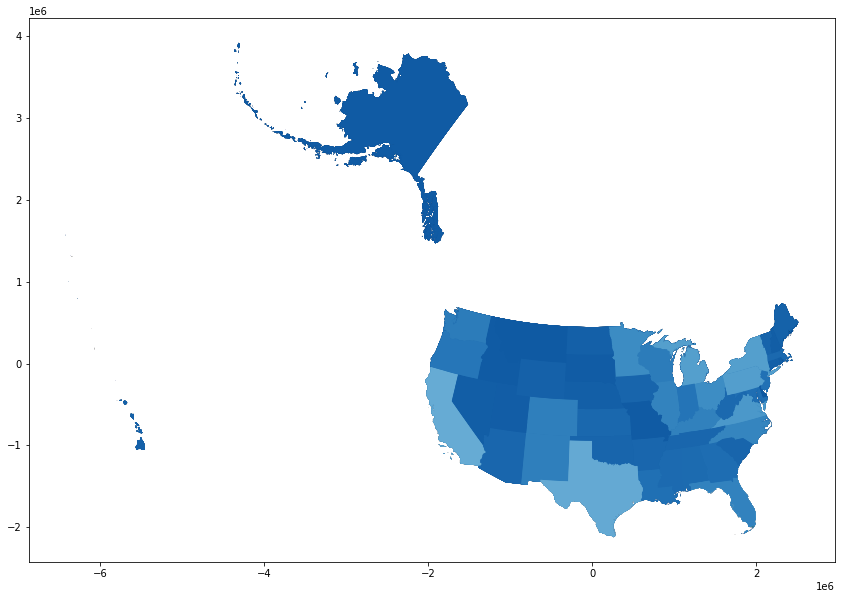

In [ ]:
base20 = my_geoseries20.plot(color='gray', figsize=(20,10))
ax = my_geoseries20.plot(ax=base20, column='retail_and_recreation_percent_change_from_baseline', marker='.', cmap='Blues') # works 'GnBu','GnBu'


# ValueError: supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r',
# 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r',
# 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy',
# 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r',
# 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r',
#  'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r',
#  'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r',
#  'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno',
# 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocea...
#

In [ ]:
# df20 = my_geoseries20.copy() # works too
# min_retail20 = min(df20["retail_and_recreation_percent_change_from_baseline"])
# max_retail20 = max(df20["retail_and_recreation_percent_change_from_baseline"])
# min_retail20, max_retail20

def min_max(df):
  df2 = df.copy()
  min_retail = min(df2["retail_and_recreation_percent_change_from_baseline"])
  max_retail = max(df2["retail_and_recreation_percent_change_from_baseline"])
  return (min_retail, max_retail)

min_retail20, max_retail20 = min_max(my_geoseries20)
min_retail20, max_retail20

(-105273.0, 18242.0)

In [ ]:
min_retail21, max_retail21 = min_max(my_geoseries21)
min_retail22, max_retail22 = min_max(my_geoseries22)

min_retail22, max_retail22

(-49738.0, 25266.0)

Text(-0.05, 0.5, 'Mobility map of the U.S. 2020')

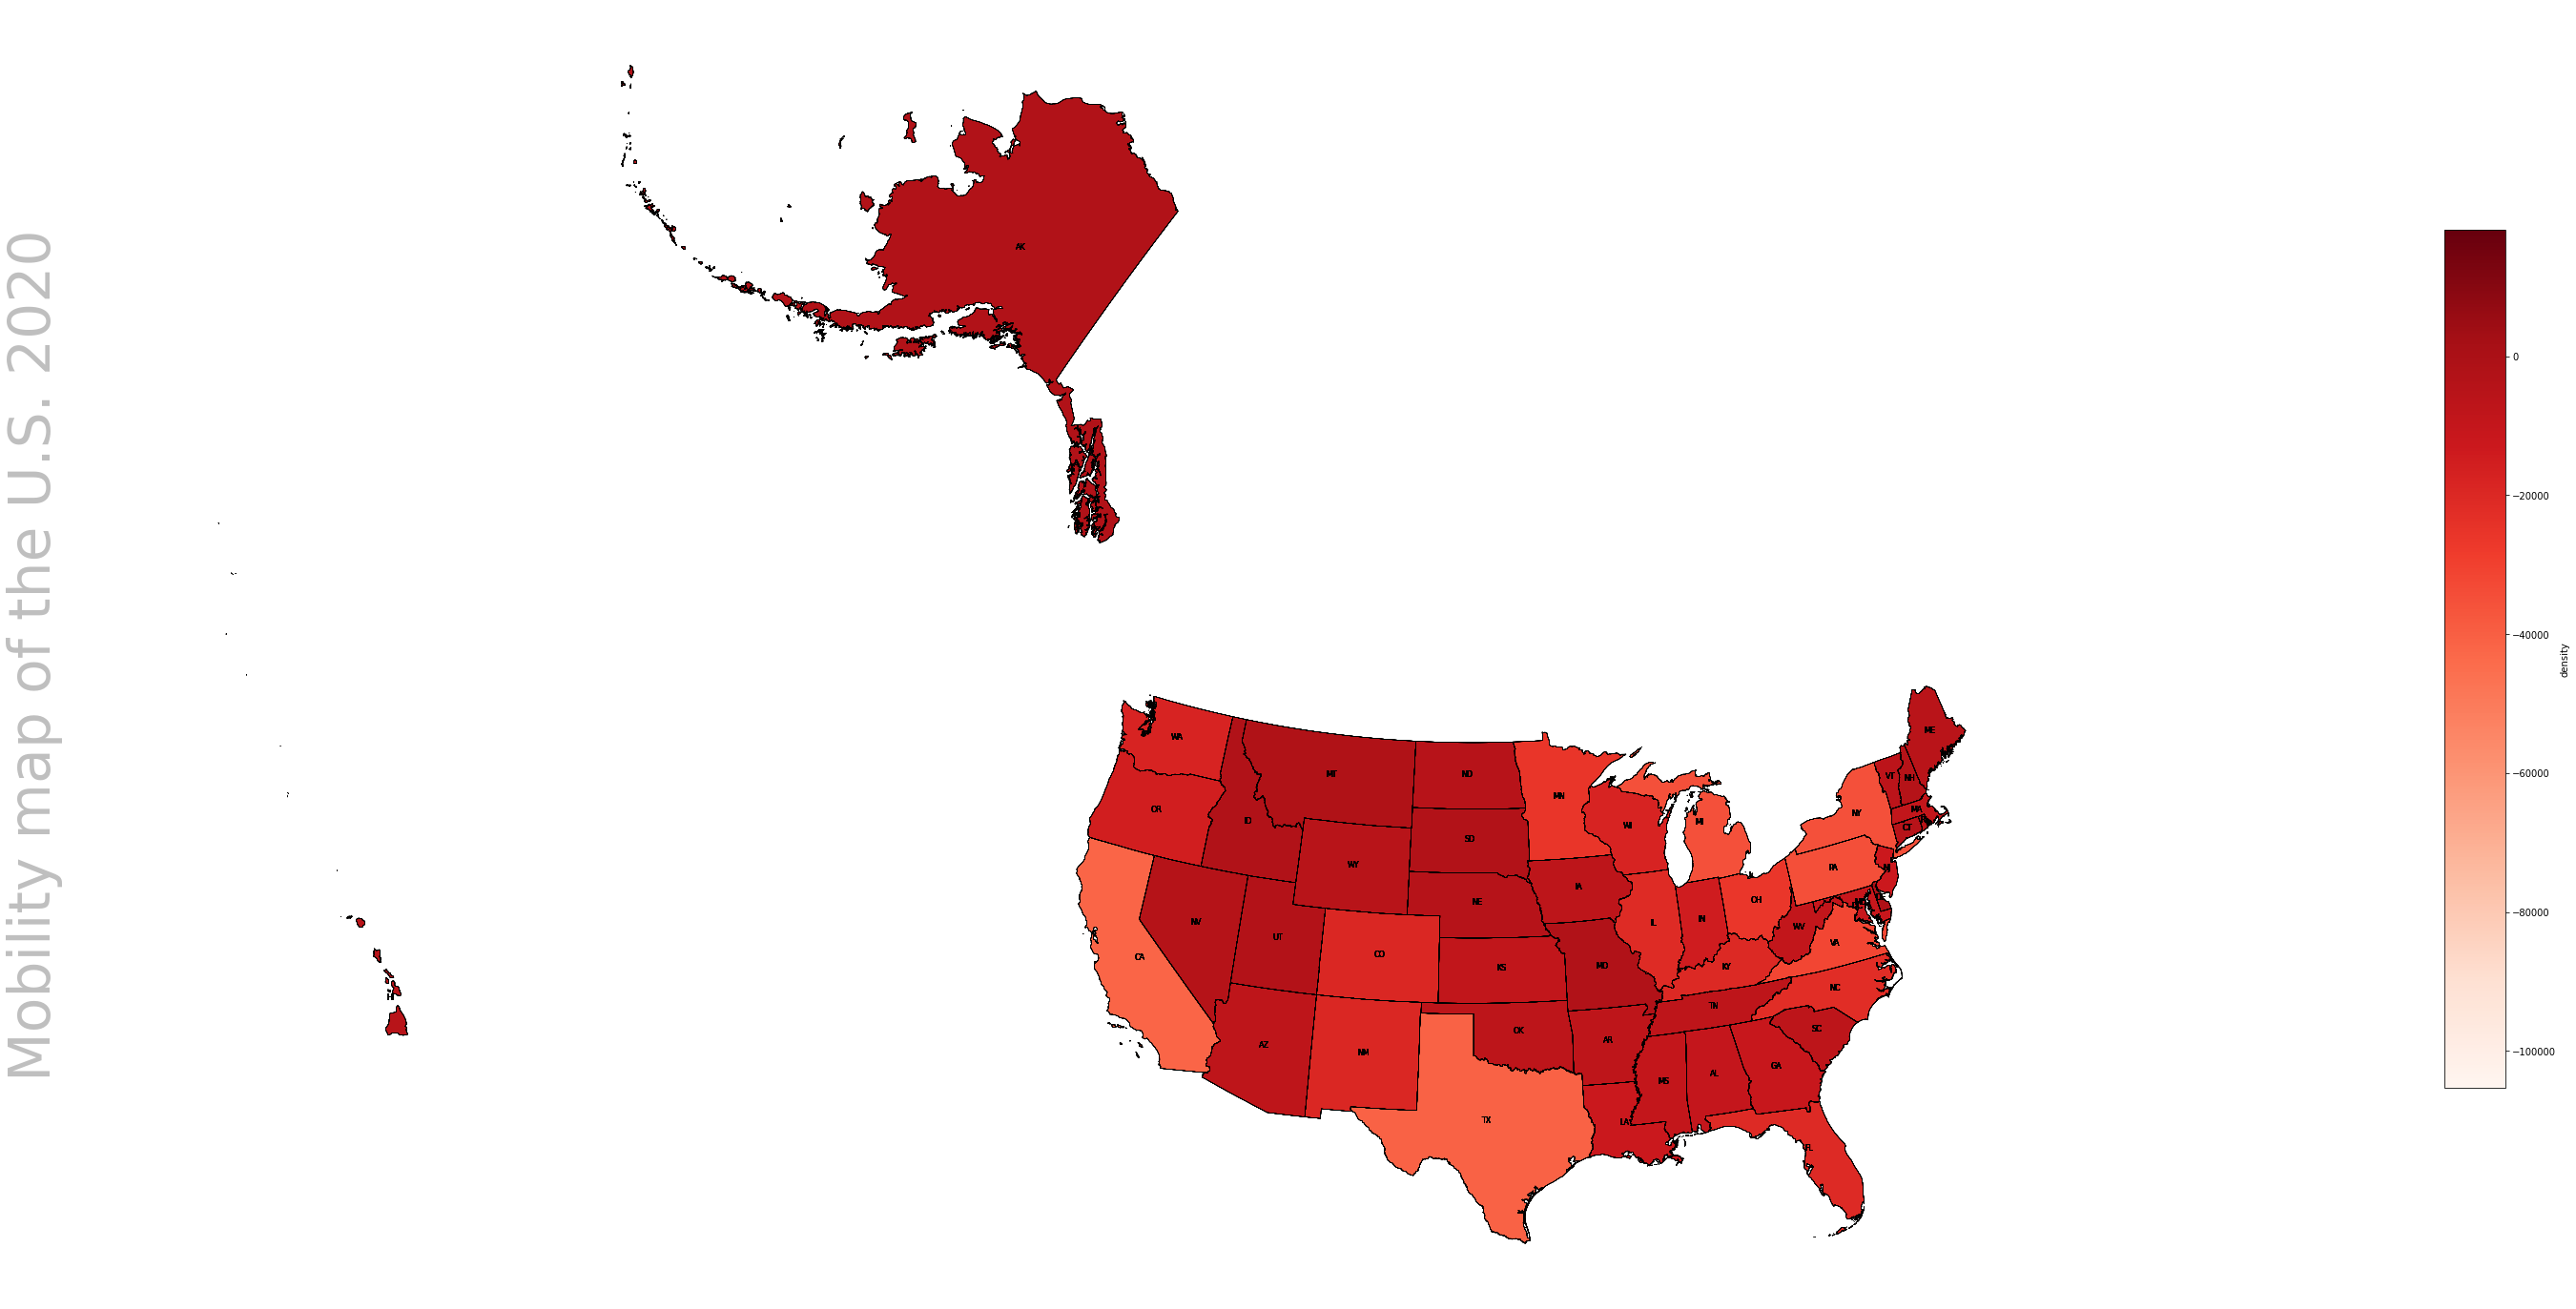

In [ ]:
fig = plt.figure(1, figsize=(45,25))
ax = fig.add_subplot()
##manipulate colorbar/legend (empty one)
# use this simple colormap
my_colormap = plt.cm.Reds # Pastel2 #works

fig = ax.get_figure()
cax = fig.add_axes([0.95, .25, 0.02, 0.5]) #[left,bottom,width,height][0.9, .25, 0.02, 0.5])
sm = plt.cm.ScalarMappable(
    cmap=my_colormap,
    norm=plt.Normalize(vmin=min_retail20,vmax=max_retail20)
    )

##clear the array of the scalar mappable
sm._A = []
cb = fig.colorbar(sm, cax=cax)
cb.set_label('density')
# manipulate the axis setttings
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

my_geoseries20.apply(lambda x: ax.annotate(s=x.State_abr,# + "\n" + str(math.floor(x.ALAND / 2589988.1103)) + " sq mi",
                                      xy=x.geometry.centroid.coords[0],
                                      ha='center',
                                      fontsize=8),
                    axis=1);

my_geoseries20.boundary.plot(ax=ax, color='Black', linewidth=.4)
my_geoseries20.plot(ax=ax, column='retail_and_recreation_percent_change_from_baseline', cmap='Reds', figsize=(12, 12));
ax.text(-0.05, 0.5, 'Mobility map of the U.S. 2020', transform=ax.transAxes,
        fontsize=60, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

In [ ]:
# works:
# retail20 = my_geoseries20.drop(['State',
#                             'grocery_and_pharmacy_percent_change_from_baseline',
#                             'parks_percent_change_from_baseline',
#                             'transit_stations_percent_change_from_baseline',
#                             'workplaces_percent_change_from_baseline',
#                             'residential_percent_change_from_baseline',
#                             'STATENS',
#                             'AFFGEOID',
#                             'STATEFP',
#                             'LSAD',
#                             'GEOID',
#                             'ALAND',
#                             'AWATER'], axis=1)

def retail_only(df):
  """
  delete all except 'retail_and_recreation_percent_change_from_baseline'
  """
  retail = df.drop(['State',
                              'grocery_and_pharmacy_percent_change_from_baseline',
                              'parks_percent_change_from_baseline',
                              'transit_stations_percent_change_from_baseline',
                              'workplaces_percent_change_from_baseline',
                              'residential_percent_change_from_baseline',
                              'STATENS',
                              'AFFGEOID',
                              'STATEFP',
                              'LSAD',
                              'GEOID',
                              'ALAND',
                              'AWATER'], axis=1)
  return retail

retail20 = retail_only(my_geoseries20)
retail21 = retail_only(my_geoseries21)
retail22 = retail_only(my_geoseries22)
retail20.head()

Month  retail_and_recreation_percent_change_from_baseline State_abr  \
0      2                                             4344.0         AL   
1      2                                              518.0         AK   
2      2                                             1185.0         AZ   
3      2                                             5407.0         AR   
4      2                                             5276.0         CA   

                                            geometry  
0  MULTIPOLYGON (((1149241.382 -1527641.924, 1149...  
1  MULTIPOLYGON (((-4288629.978 3426273.416, -428...  
2  POLYGON ((-1389116.907 -1265584.638, -1388917....  
3  POLYGON ((482008.677 -928930.330, 482025.129 -...  
4  MULTIPOLYGON (((-1717362.709 -1090134.236, -17...

In [ ]:
# df.sort_values(by=['col1'])
# retail_jan = retail[retail['Month'] == 1] #.sort_values(by=["Month"])
# dataframe[dataframe['Percentage'] > 70]

def monthly(df, month_int):
  df2 = df[df['Month'] == month_int]
  return df2

retail_1_20 = monthly(retail20, 1)
retail_2_20 = monthly(retail20, 2)
retail_3_20 = monthly(retail20, 3)
retail_4_20 = monthly(retail20, 4)
retail_5_20 = monthly(retail20, 5)
retail_6_20 = monthly(retail20, 6)
retail_7_20 = monthly(retail20, 7)
retail_8_20 = monthly(retail20, 8)
retail_9_20 = monthly(retail20, 9)
retail_10_20 = monthly(retail20, 10)
retail_11_20 = monthly(retail20, 11)
retail_12_20 = monthly(retail20, 12)

retail_1_21 = monthly(retail20, 1)
retail_2_21 = monthly(retail20, 2)
retail_3_21 = monthly(retail20, 3)
retail_4_21 = monthly(retail20, 4)
retail_5_21 = monthly(retail20, 5)
retail_6_21 = monthly(retail20, 6)
retail_7_21 = monthly(retail20, 7)
retail_8_21 = monthly(retail20, 8)
retail_9_21 = monthly(retail20, 9)
retail_10_21 = monthly(retail20, 10)
retail_11_21 = monthly(retail20, 11)
retail_12_21 = monthly(retail20, 12)

retail_1_22 = monthly(retail22, 1)
retail_2_22 = monthly(retail22, 2)
retail_3_22 = monthly(retail22, 3)
retail_4_22 = monthly(retail22, 4)
retail_5_22 = monthly(retail22, 5)
retail_6_22 = monthly(retail22, 6)
retail_7_22 = monthly(retail22, 7)

retail_1_20.info() # has no data
retail_2_20.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 0 entries
Data columns (total 4 columns):
 #   Column                                              Non-Null Count  Dtype   
---  ------                                              --------------  -----   
 0   Month                                               0 non-null      int64   
 1   retail_and_recreation_percent_change_from_baseline  0 non-null      float64 
 2   State_abr                                           0 non-null      object  
 3   geometry                                            0 non-null      geometry
dtypes: float64(1), geometry(1), int64(1), object(1)
memory usage: 0.0+ bytes
<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column                                              Non-Null Count  Dtype   
---  ------                                              --------------  -----   
 0   Month                                              

In [ ]:
# AK sanity check Feb 2020
retail_2_20.sort_values(by=["State_abr"]).head()

Month  retail_and_recreation_percent_change_from_baseline State_abr  \
1      2                                              518.0         AK   
0      2                                             4344.0         AL   
3      2                                             5407.0         AR   
2      2                                             1185.0         AZ   
4      2                                             5276.0         CA   

                                            geometry  
1  MULTIPOLYGON (((-4288629.978 3426273.416, -428...  
0  MULTIPOLYGON (((1149241.382 -1527641.924, 1149...  
3  POLYGON ((482008.677 -928930.330, 482025.129 -...  
2  POLYGON ((-1389116.907 -1265584.638, -1388917....  
4  MULTIPOLYGON (((-1717362.709 -1090134.236, -17...

In [ ]:
# AK sanity check MAR 2020
retail_3_20.sort_values(by=["State_abr"]).head()


Month  retail_and_recreation_percent_change_from_baseline State_abr  \
52      3                                            -2807.0         AK   
51      3                                           -12455.0         AL   
54      3                                            -8184.0         AR   
53      3                                            -5417.0         AZ   
55      3                                           -30168.0         CA   

                                             geometry  
52  MULTIPOLYGON (((-4288629.978 3426273.416, -428...  
51  MULTIPOLYGON (((1149241.382 -1527641.924, 1149...  
54  POLYGON ((482008.677 -928930.330, 482025.129 -...  
53  POLYGON ((-1389116.907 -1265584.638, -1388917....  
55  MULTIPOLYGON (((-1717362.709 -1090134.236, -17...

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:405: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


Text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., JAN 2022')

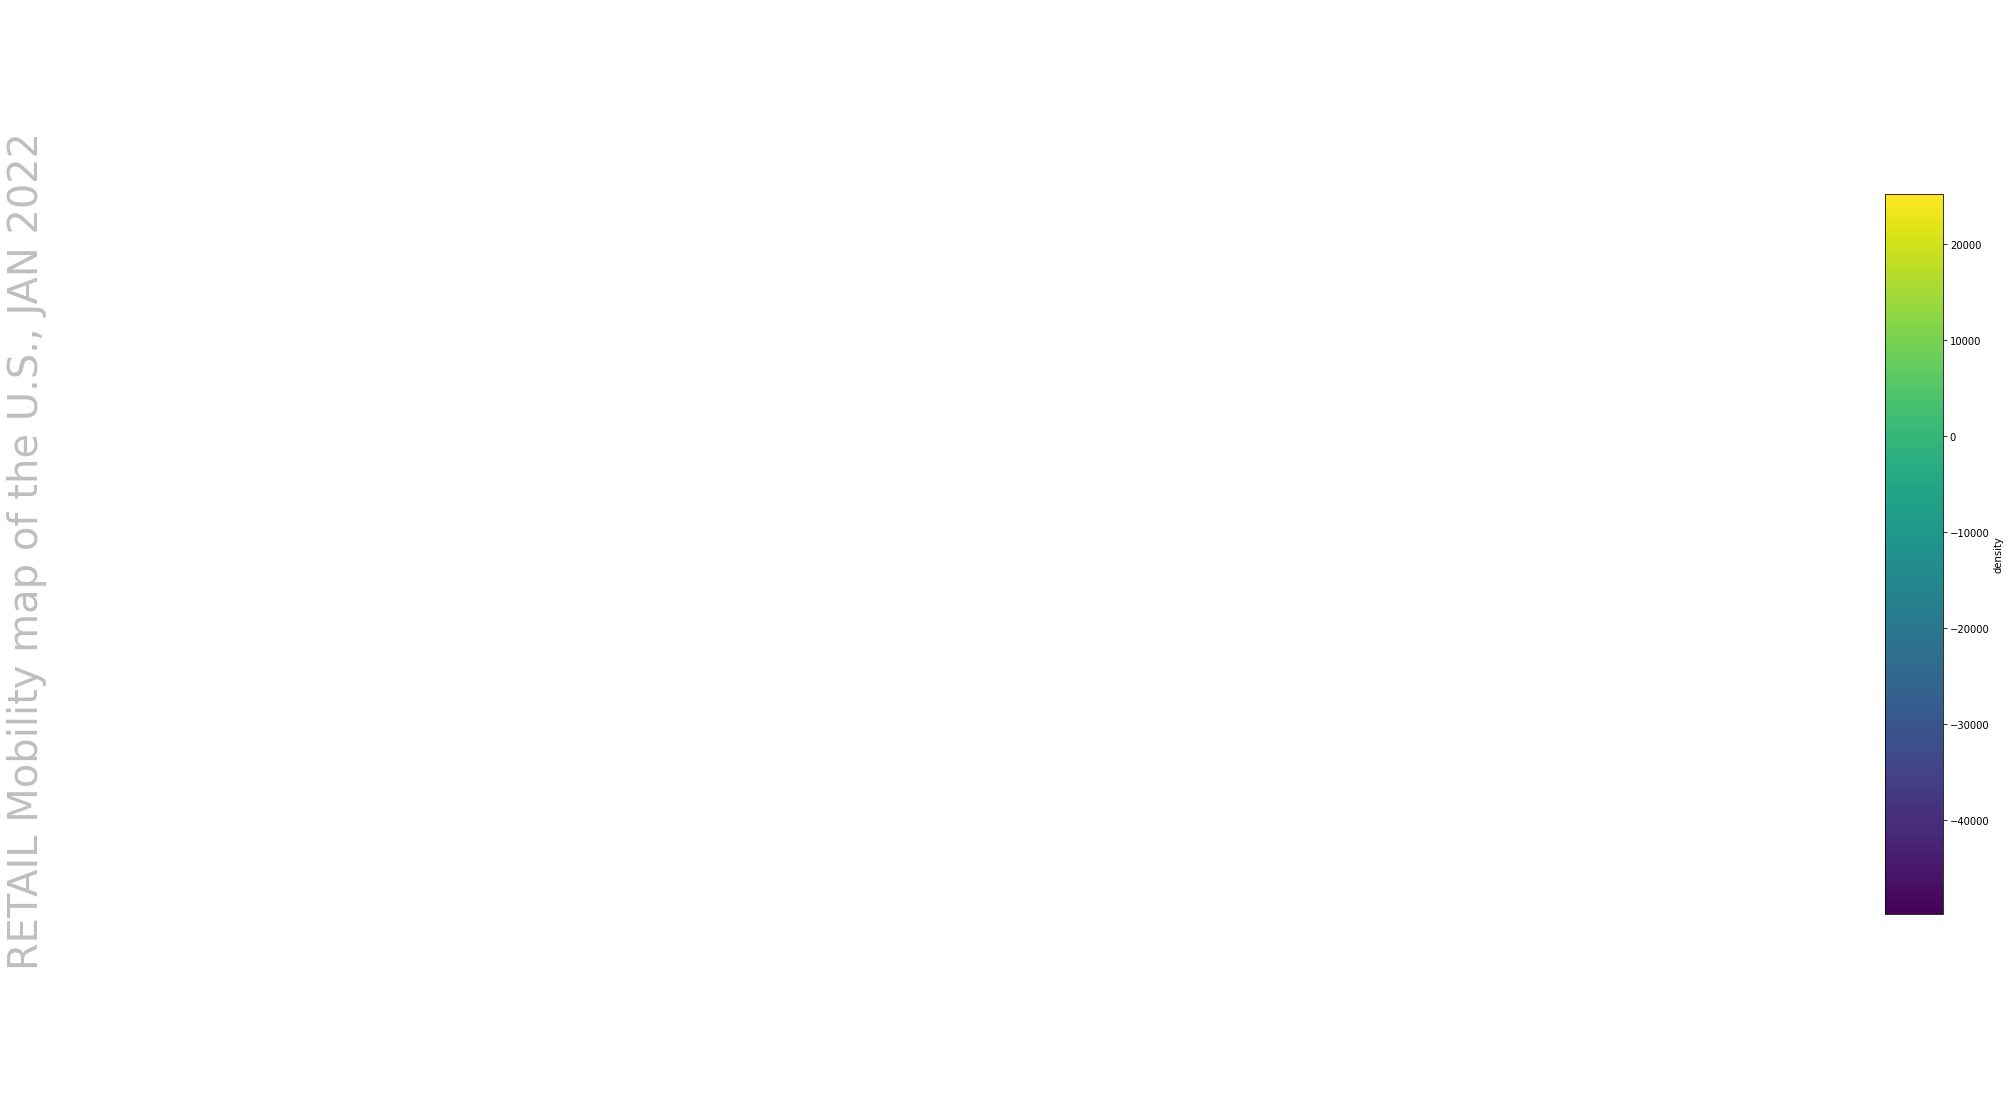

In [ ]:
fig = plt.figure(1, figsize=(40,20))
ax = fig.add_subplot()
##manipulate colorbar/legend (empty one)
# use this simple colormap
my_colormap = plt.cm.viridis #Reds # Pastel2 #works

fig = ax.get_figure()
cax = fig.add_axes([0.95, .25, 0.02, 0.5]) #[left,bottom,width,height][0.9, .25, 0.02, 0.5])
sm = plt.cm.ScalarMappable(
    cmap=my_colormap,
    norm=plt.Normalize(vmin=min_retail22,vmax=max_retail22)
    )

##clear the array of the scalar mappable
sm._A = []
cb = fig.colorbar(sm, cax=cax)
cb.set_label('density')
# manipulate the axis setttings
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

retail_1_20.apply(lambda x: ax.annotate(s=x.State_abr,# + "\n" + str(math.floor(x.ALAND / 2589988.1103)) + " sq mi",
                                      xy=x.geometry.centroid.coords[0],
                                      ha='center',
                                      fontsize=10),
                axis=1);

retail_1_20.boundary.plot(ax=ax, color='Black', linewidth=.4)
retail_1_20.plot(ax=ax, column='retail_and_recreation_percent_change_from_baseline', cmap='viridis', figsize=(12, 12));
ax.text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., JAN 2022', transform=ax.transAxes,
        fontsize=40, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

Text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., FEB 2020')

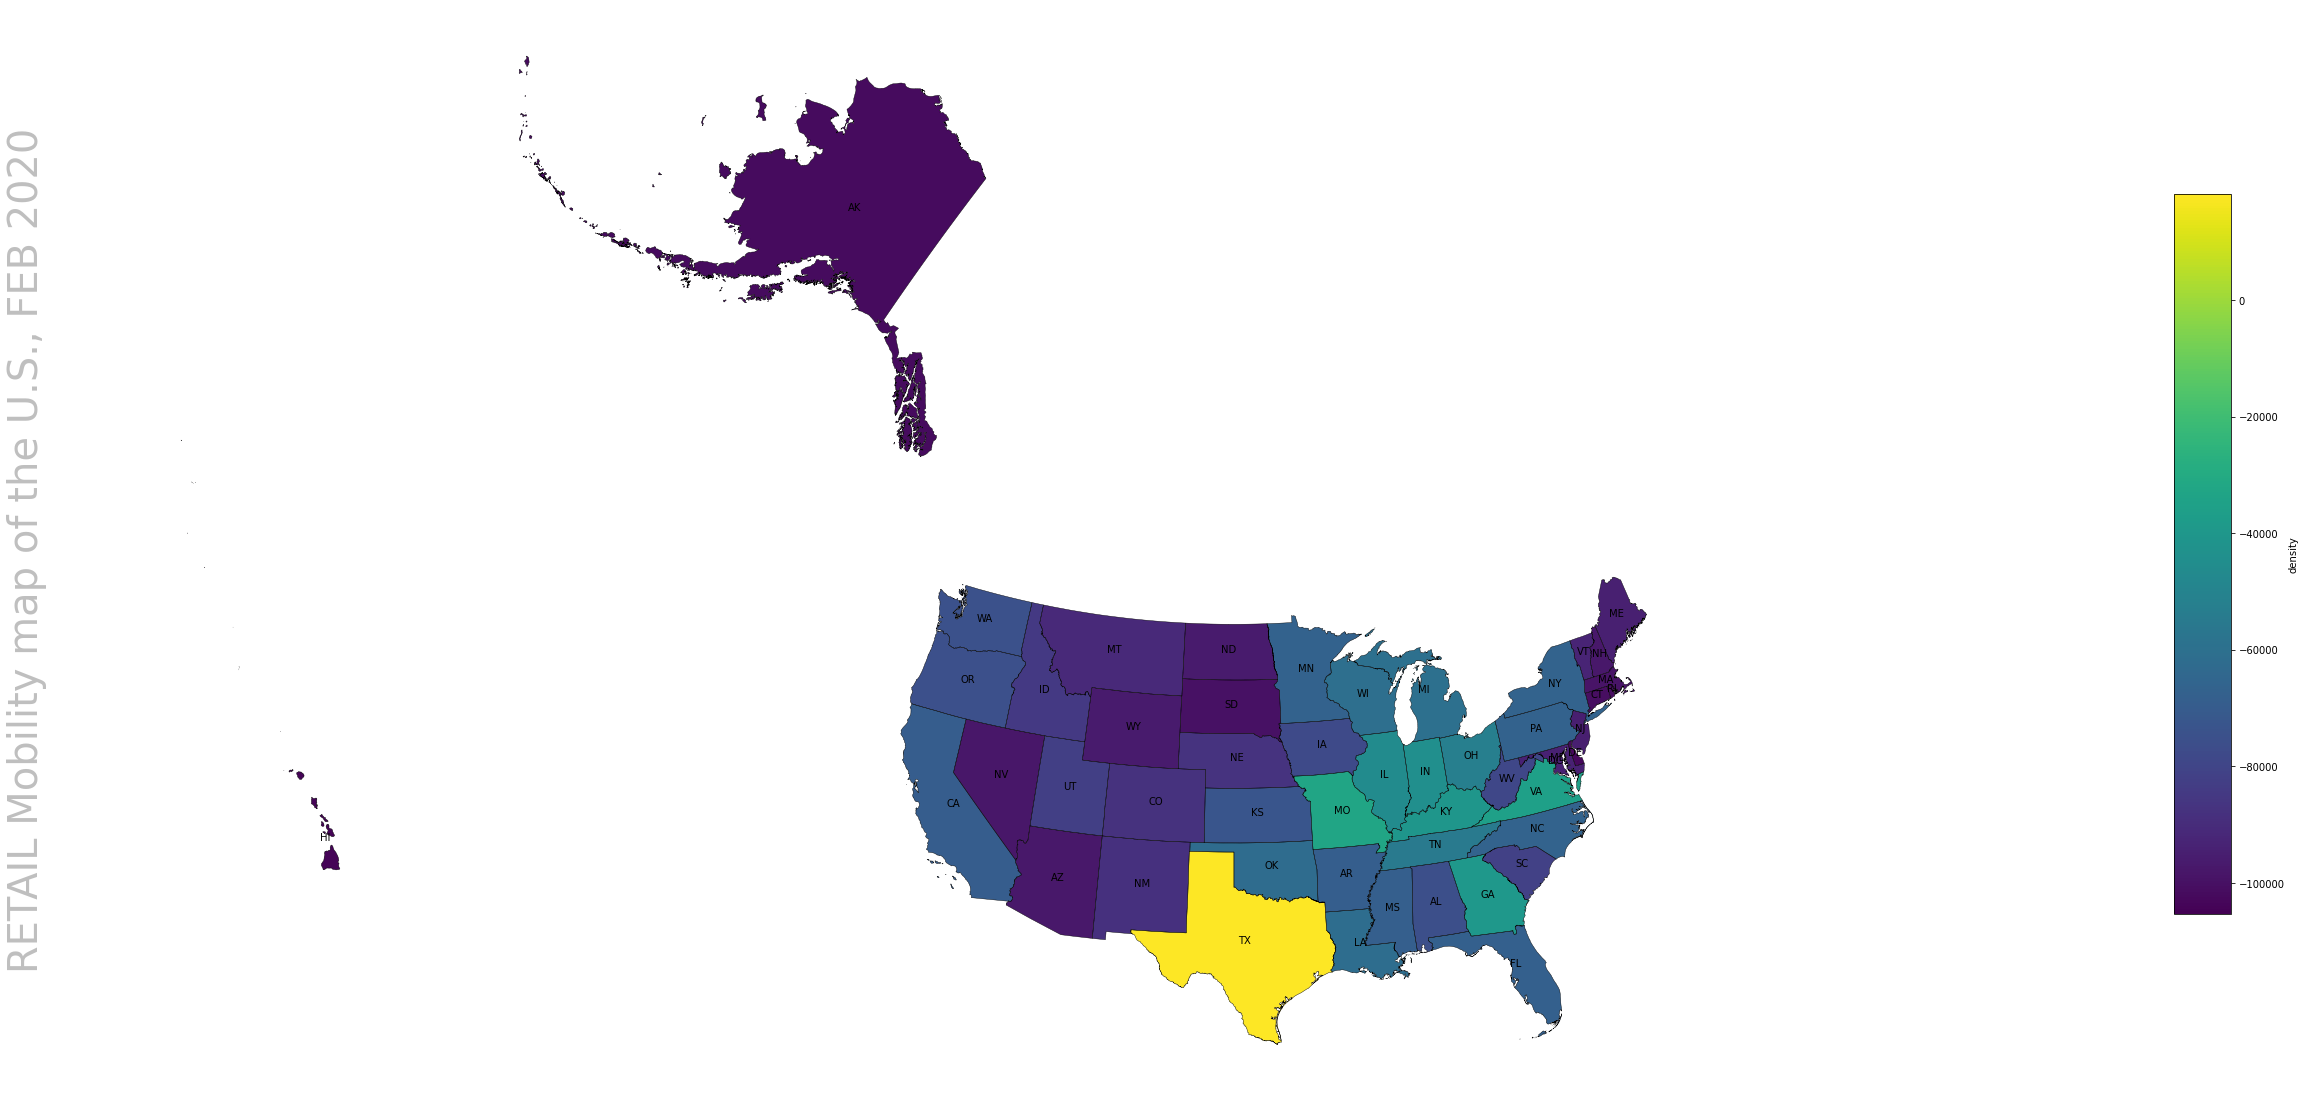

In [ ]:
fig = plt.figure(1, figsize=(40,20))
ax = fig.add_subplot()
##manipulate colorbar/legend (empty one)
# use this simple colormap
my_colormap = plt.cm.viridis #Reds # Pastel2 #works

fig = ax.get_figure()
cax = fig.add_axes([0.95, .25, 0.02, 0.5]) #[left,bottom,width,height][0.9, .25, 0.02, 0.5])
sm = plt.cm.ScalarMappable(
    cmap=my_colormap,
    norm=plt.Normalize(vmin=min_retail20,vmax=max_retail20)
    )

##clear the array of the scalar mappable
sm._A = []
cb = fig.colorbar(sm, cax=cax)
cb.set_label('density')
# manipulate the axis setttings
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

retail_2_20.apply(lambda x: ax.annotate(s=x.State_abr,# + "\n" + str(math.floor(x.ALAND / 2589988.1103)) + " sq mi",
                                      xy=x.geometry.centroid.coords[0],
                                      ha='center',
                                      fontsize=10),
                axis=1);

retail_2_20.boundary.plot(ax=ax, color='Black', linewidth=.4)
retail_2_20.plot(ax=ax, column='retail_and_recreation_percent_change_from_baseline', cmap='viridis', figsize=(12, 12));
ax.text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., FEB 2020', transform=ax.transAxes,
        fontsize=40, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

Text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., MAR 2020')

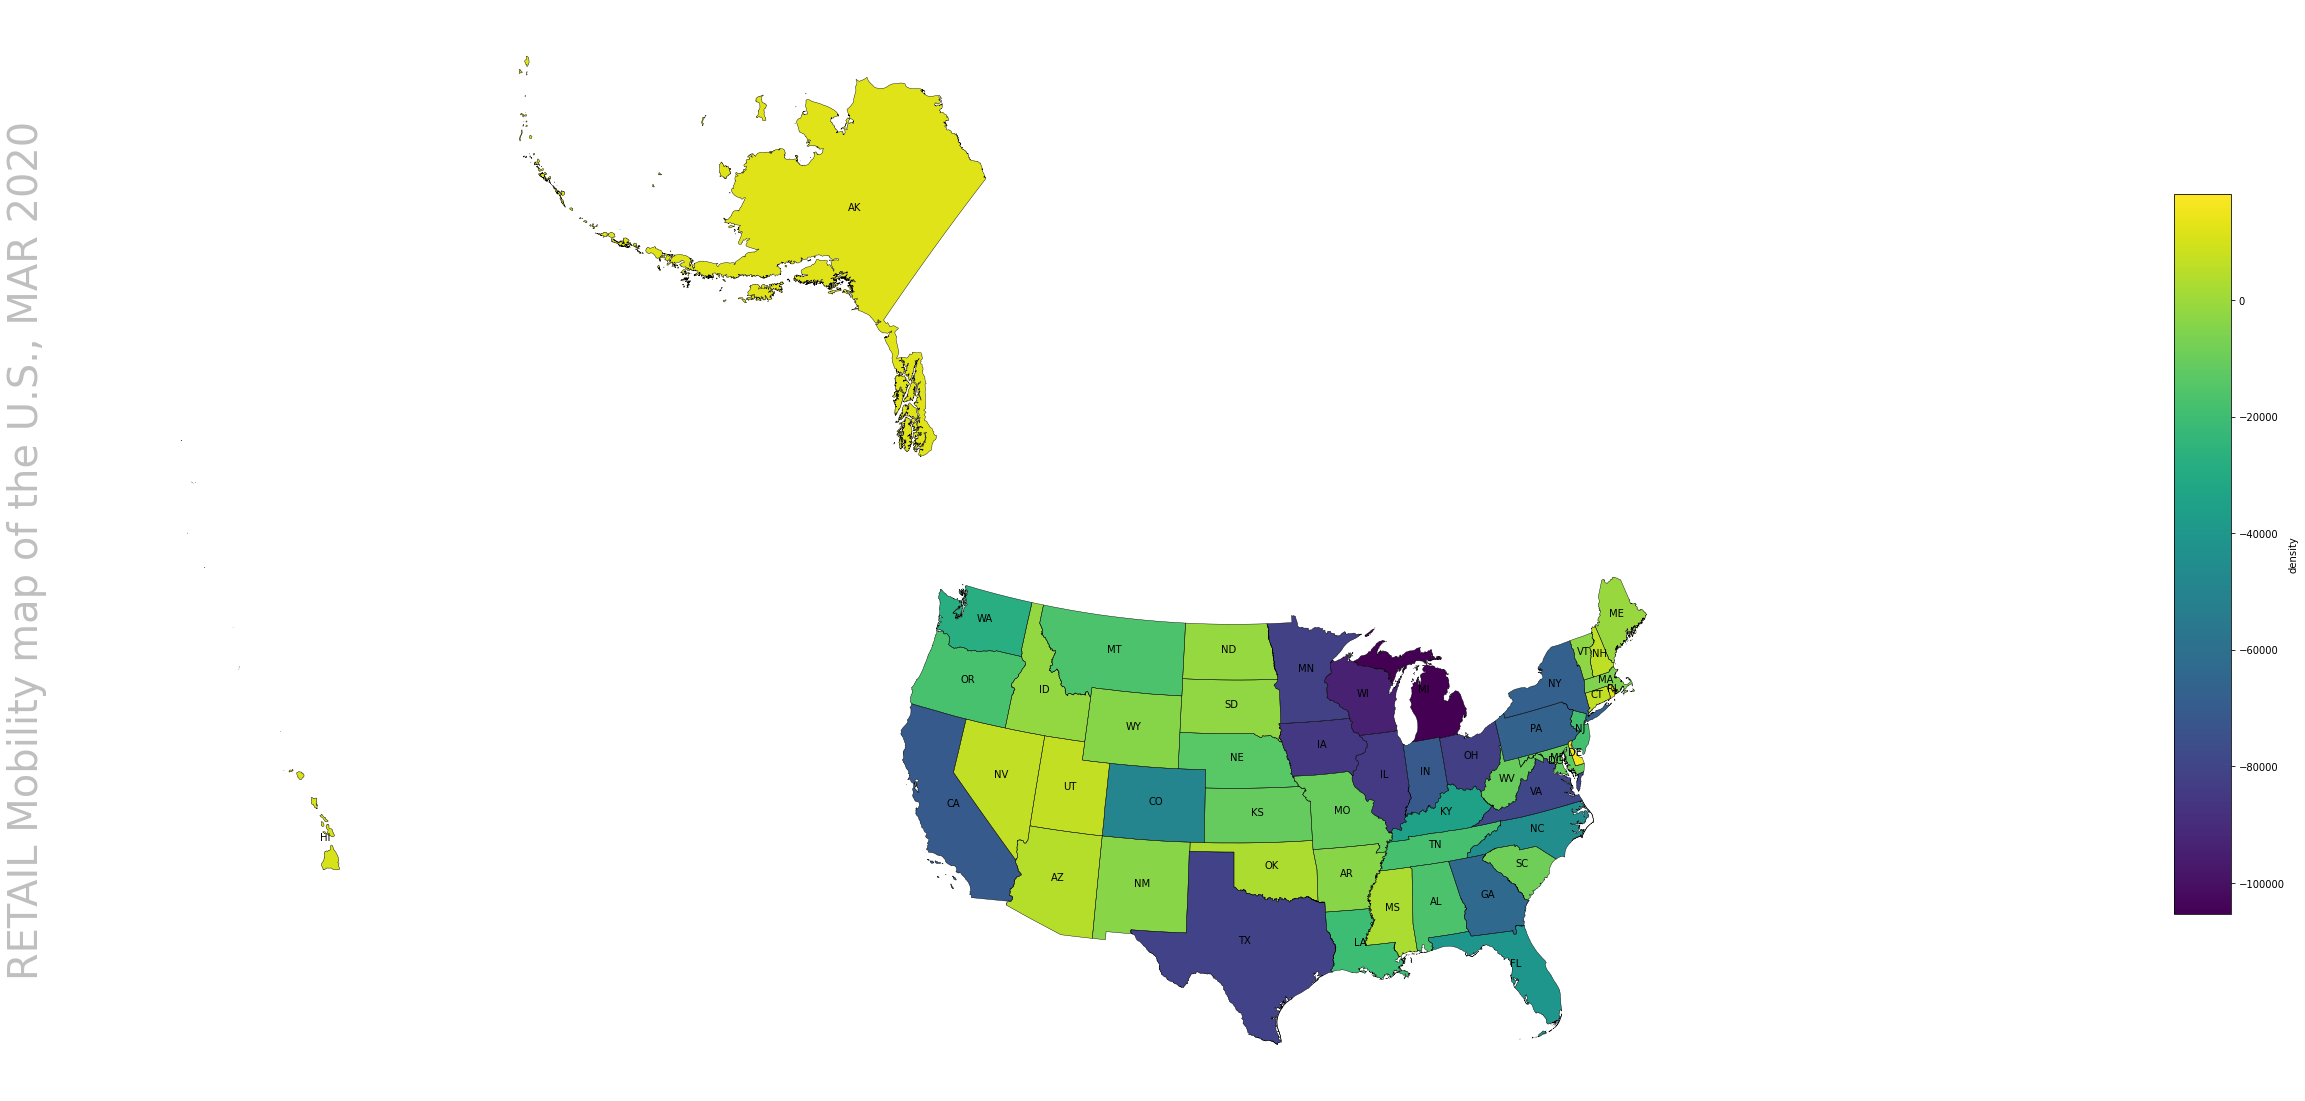

In [ ]:
fig = plt.figure(1, figsize=(40,20))
ax = fig.add_subplot()
##manipulate colorbar/legend (empty one)
# use this simple colormap
my_colormap = plt.cm.viridis #Reds # Pastel2 #works

fig = ax.get_figure()
cax = fig.add_axes([0.95, .25, 0.02, 0.5]) #[left,bottom,width,height][0.9, .25, 0.02, 0.5])
sm = plt.cm.ScalarMappable(
    cmap=my_colormap,
    norm=plt.Normalize(vmin=min_retail20,vmax=max_retail20)
    )

##clear the array of the scalar mappable
sm._A = []
cb = fig.colorbar(sm, cax=cax)
cb.set_label('density')
# manipulate the axis setttings
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

retail_3_20.apply(lambda x: ax.annotate(s=x.State_abr,# + "\n" + str(math.floor(x.ALAND / 2589988.1103)) + " sq mi",
                                      xy=x.geometry.centroid.coords[0],
                                      ha='center',
                                      fontsize=10),
                axis=1);

retail_3_20.boundary.plot(ax=ax, color='Black', linewidth=.4)
retail_3_20.plot(ax=ax, column='retail_and_recreation_percent_change_from_baseline', cmap='viridis', figsize=(12, 12));
ax.text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., MAR 2020', transform=ax.transAxes,
        fontsize=40, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')


["TOILET PAPER" AND "march, 2020"](https://romesentinel.com/stories/in-america-a-few-days-in-march-2020-echo-two-years-later,130948)

Text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., APR 2020')

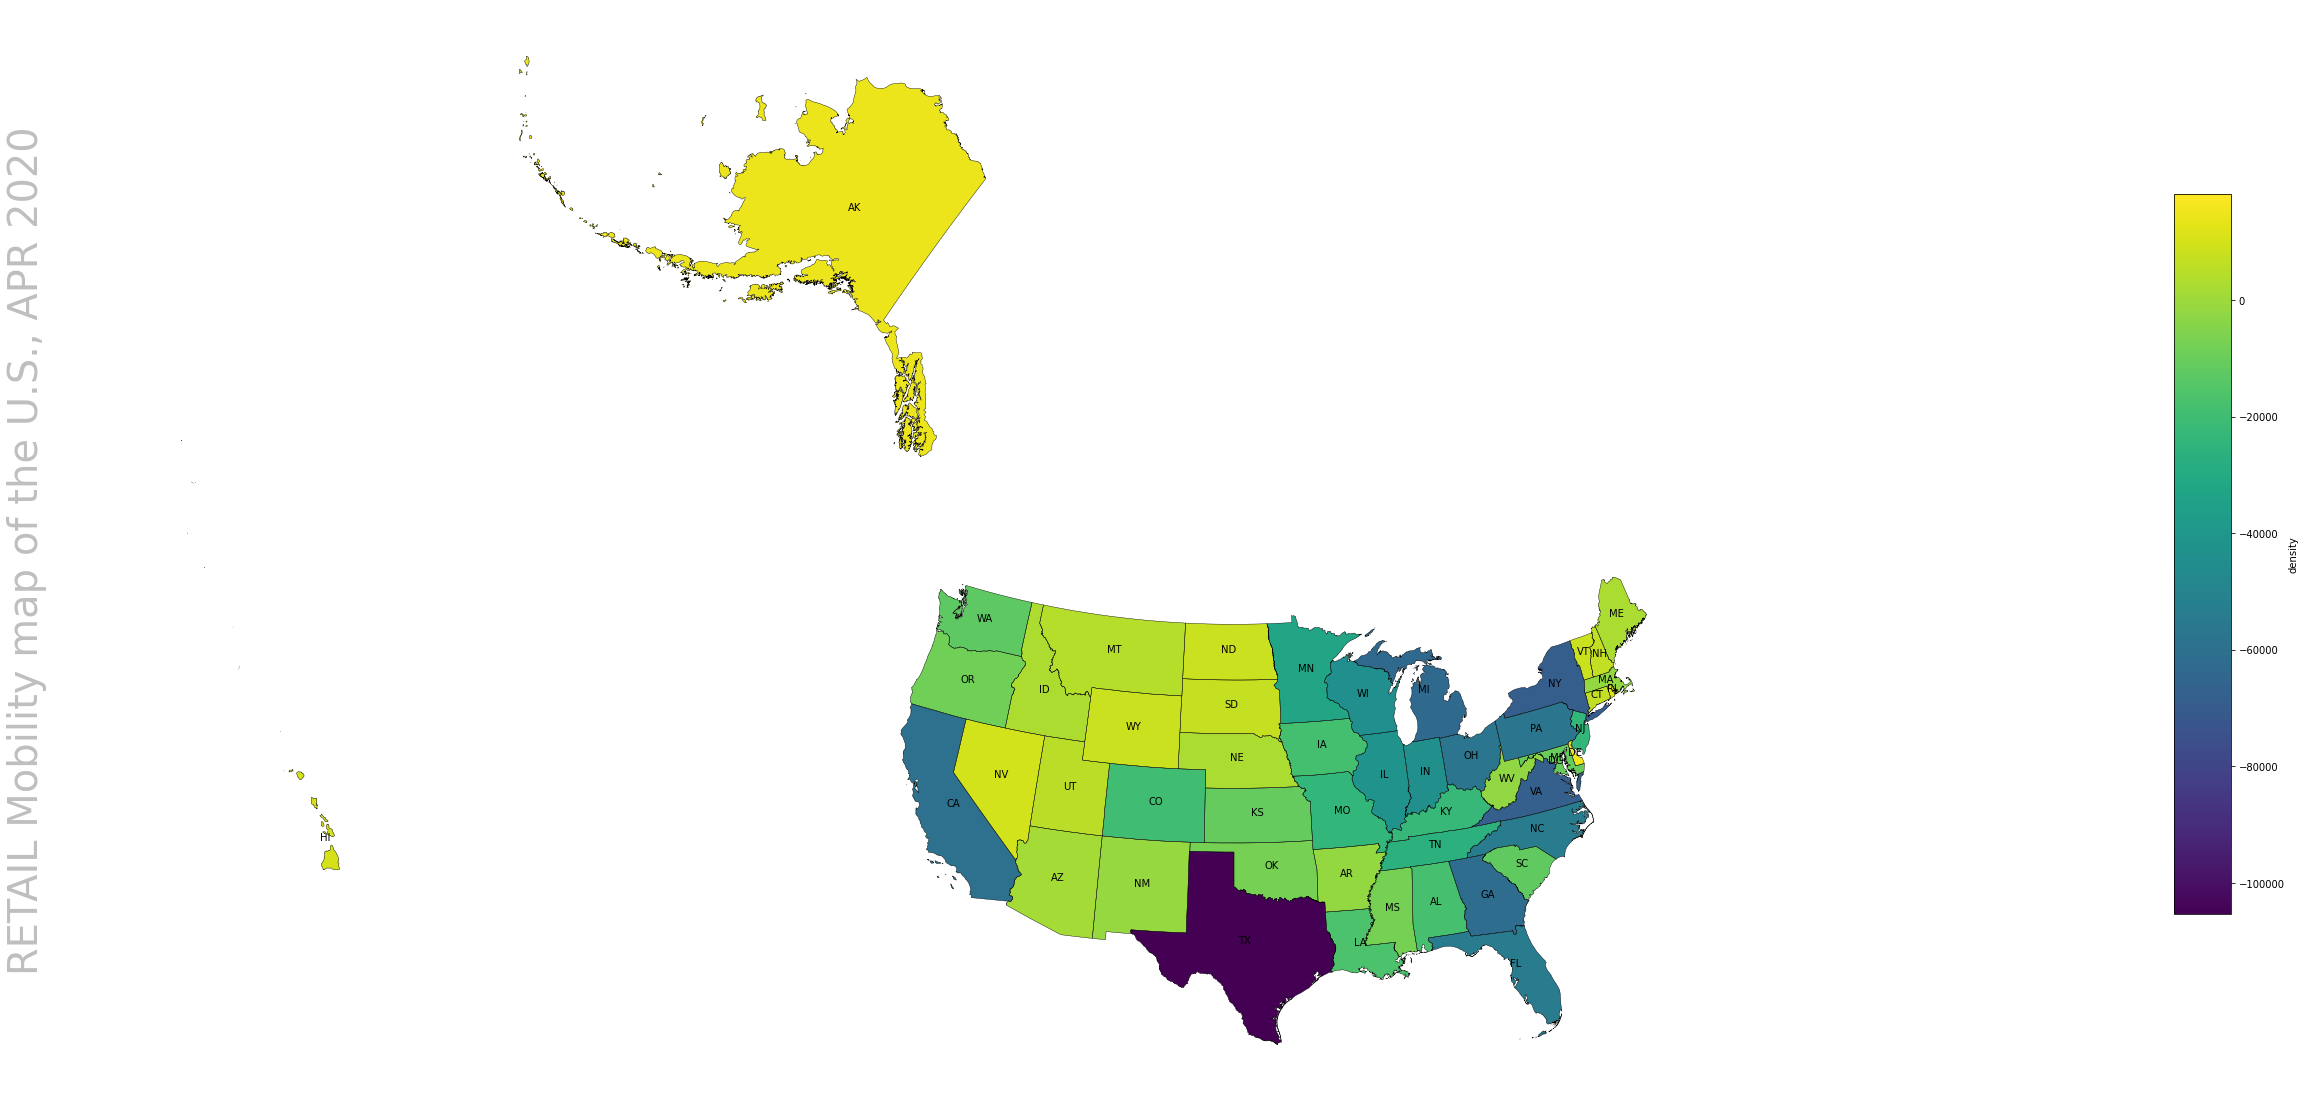

In [ ]:
fig = plt.figure(1, figsize=(40,20))
ax = fig.add_subplot()
##manipulate colorbar/legend (empty one)
# use this simple colormap
my_colormap = plt.cm.viridis #Reds # Pastel2 #works

fig = ax.get_figure()
cax = fig.add_axes([0.95, .25, 0.02, 0.5]) #[left,bottom,width,height][0.9, .25, 0.02, 0.5])
sm = plt.cm.ScalarMappable(
    cmap=my_colormap,
    norm=plt.Normalize(vmin=min_retail20,vmax=max_retail20)
    )

##clear the array of the scalar mappable
sm._A = []
cb = fig.colorbar(sm, cax=cax)
cb.set_label('density')
# manipulate the axis setttings
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

retail_4_20.apply(lambda x: ax.annotate(s=x.State_abr,# + "\n" + str(math.floor(x.ALAND / 2589988.1103)) + " sq mi",
                                      xy=x.geometry.centroid.coords[0],
                                      ha='center',
                                      fontsize=10),
                axis=1);

retail_4_20.boundary.plot(ax=ax, color='Black', linewidth=.4)
retail_4_20.plot(ax=ax, column='retail_and_recreation_percent_change_from_baseline', cmap='viridis', figsize=(12, 12));
ax.text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., APR 2020', transform=ax.transAxes,
        fontsize=40, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

[MY OWN EXPERIENCE IN RETAIL OF APR 2020](https://www.dropbox.com/s/zcldg3qof4vlpqv/results_kat_2020.pdf?dl=0)

Text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., MAY 2020')

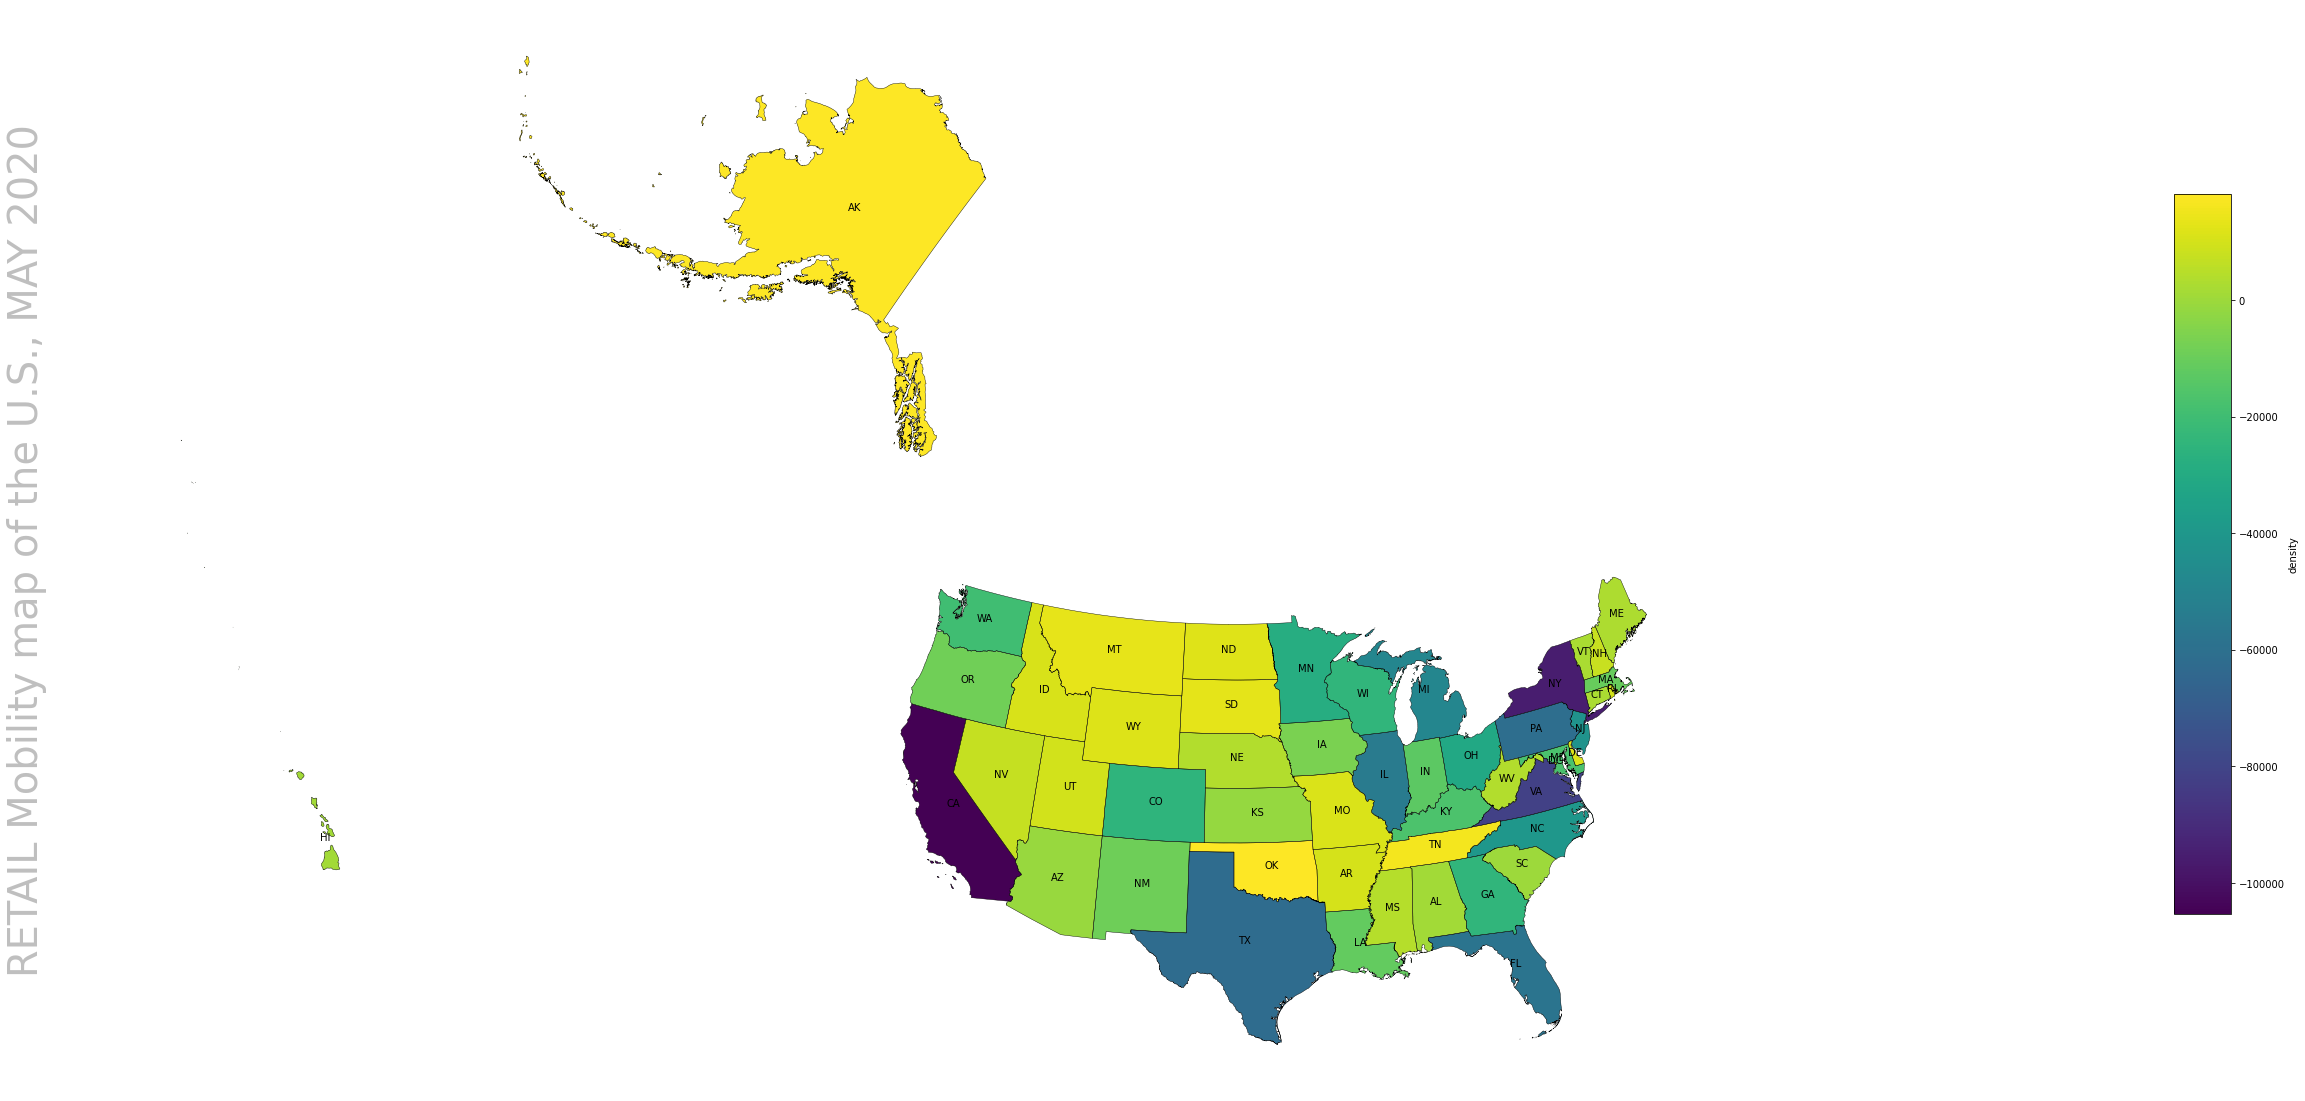

In [ ]:
fig = plt.figure(1, figsize=(40,20))
ax = fig.add_subplot()
##manipulate colorbar/legend (empty one)
# use this simple colormap
my_colormap = plt.cm.viridis #Reds # Pastel2 #works

fig = ax.get_figure()
cax = fig.add_axes([0.95, .25, 0.02, 0.5]) #[left,bottom,width,height][0.9, .25, 0.02, 0.5])
sm = plt.cm.ScalarMappable(
    cmap=my_colormap,
    norm=plt.Normalize(vmin=min_retail20,vmax=max_retail20)
    )

##clear the array of the scalar mappable
sm._A = []
cb = fig.colorbar(sm, cax=cax)
cb.set_label('density')
# manipulate the axis setttings
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

retail_5_20.apply(lambda x: ax.annotate(s=x.State_abr,# + "\n" + str(math.floor(x.ALAND / 2589988.1103)) + " sq mi",
                                      xy=x.geometry.centroid.coords[0],
                                      ha='center',
                                      fontsize=10),
                axis=1);

retail_5_20.boundary.plot(ax=ax, color='Black', linewidth=.4)
retail_5_20.plot(ax=ax, column='retail_and_recreation_percent_change_from_baseline', cmap='viridis', figsize=(12, 12));
ax.text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., MAY 2020', transform=ax.transAxes,
        fontsize=40, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

Text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., JUN 2020')

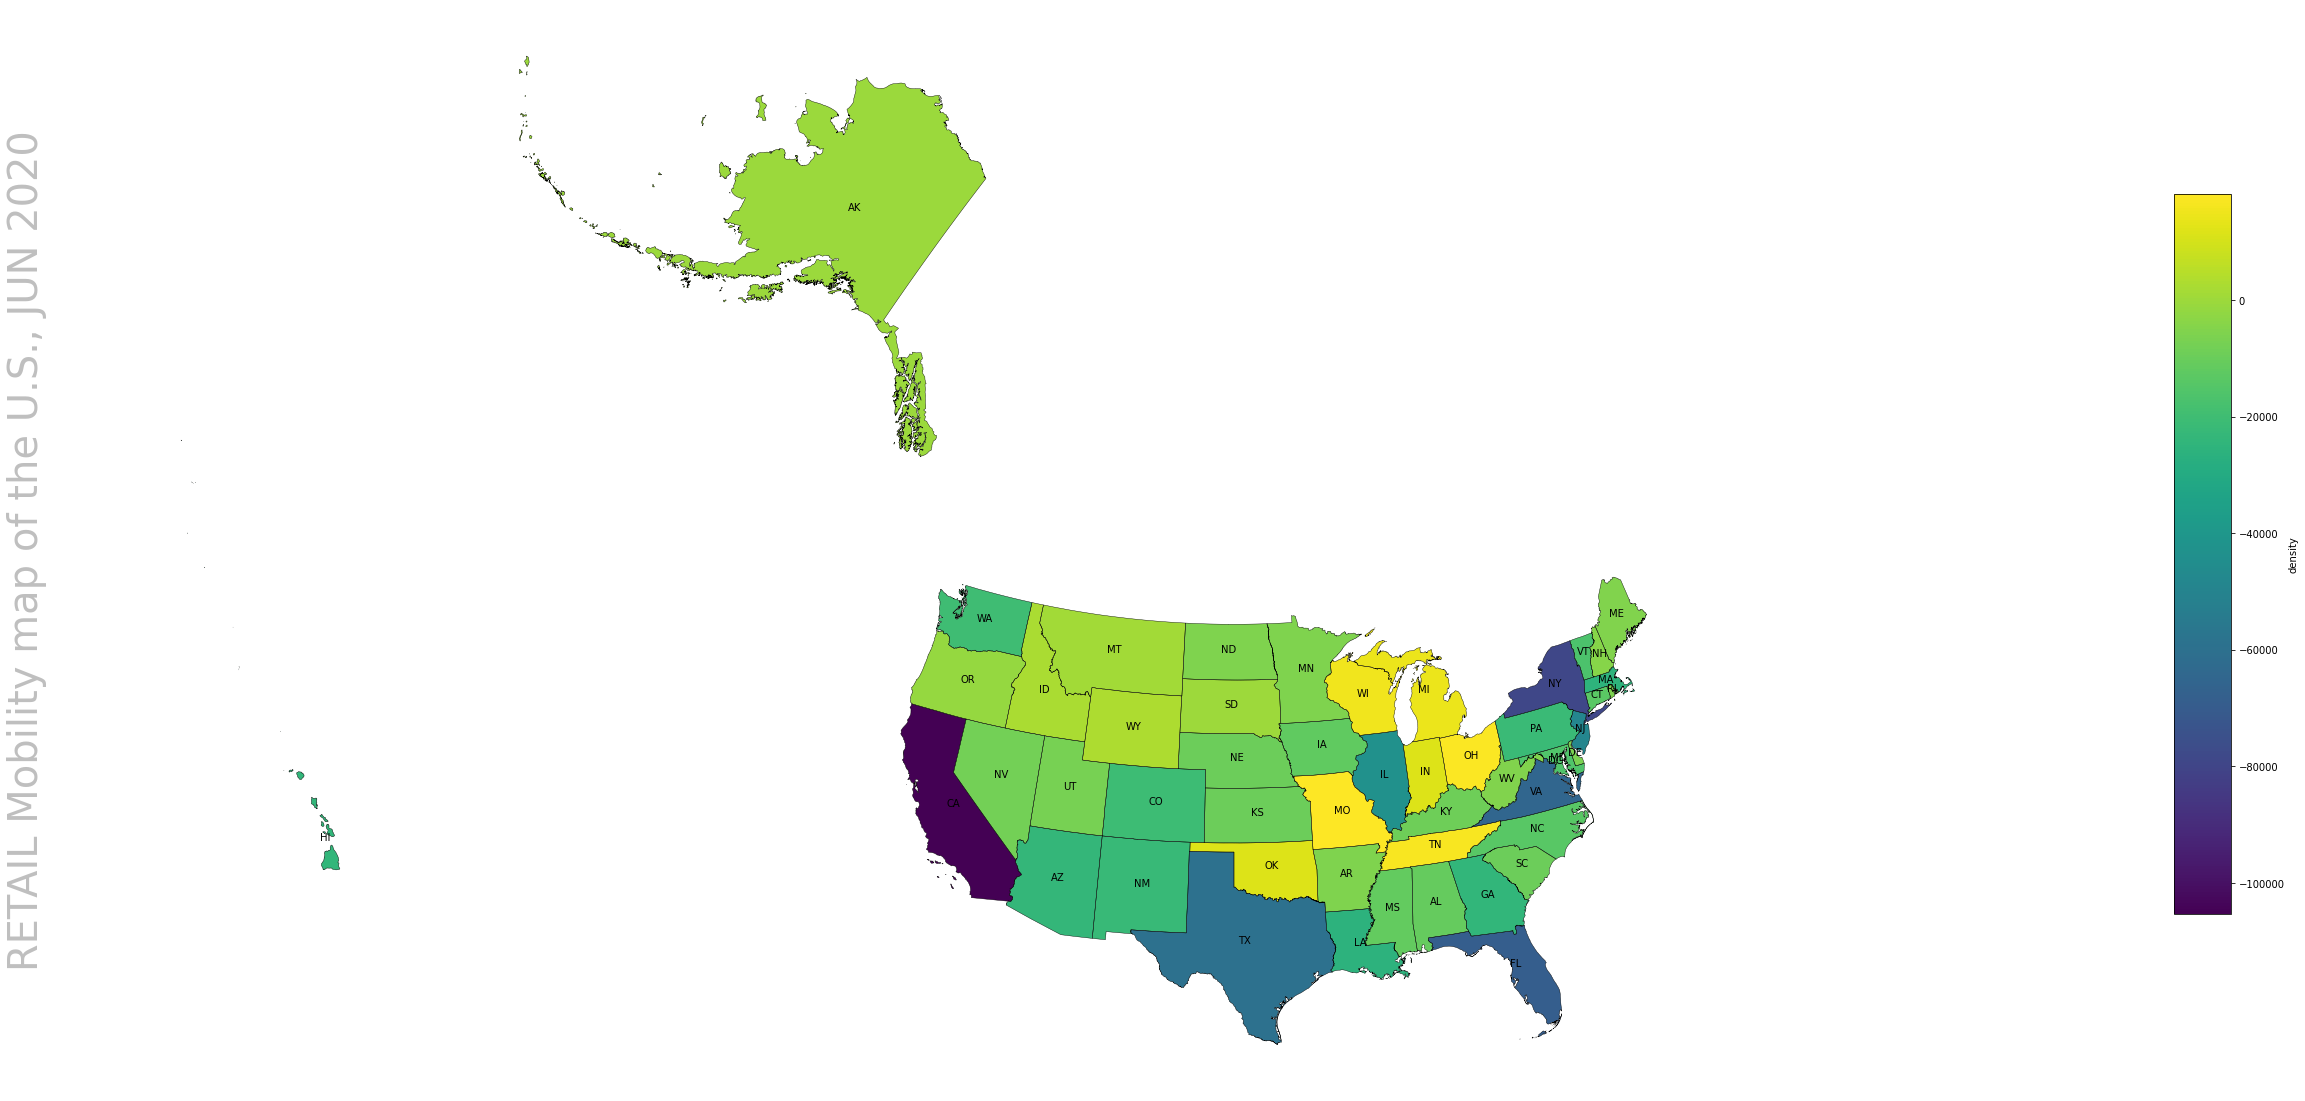

In [ ]:
fig = plt.figure(1, figsize=(40,20))
ax = fig.add_subplot()
##manipulate colorbar/legend (empty one)
# use this simple colormap
my_colormap = plt.cm.viridis #Reds # Pastel2 #works

fig = ax.get_figure()
cax = fig.add_axes([0.95, .25, 0.02, 0.5]) #[left,bottom,width,height][0.9, .25, 0.02, 0.5])
sm = plt.cm.ScalarMappable(
    cmap=my_colormap,
    norm=plt.Normalize(vmin=min_retail20,vmax=max_retail20)
    )

##clear the array of the scalar mappable
sm._A = []
cb = fig.colorbar(sm, cax=cax)
cb.set_label('density')
# manipulate the axis setttings
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

retail_6_20.apply(lambda x: ax.annotate(s=x.State_abr,# + "\n" + str(math.floor(x.ALAND / 2589988.1103)) + " sq mi",
                                      xy=x.geometry.centroid.coords[0],
                                      ha='center',
                                      fontsize=10),
                axis=1);

retail_6_20.boundary.plot(ax=ax, color='Black', linewidth=.4)
retail_6_20.plot(ax=ax, column='retail_and_recreation_percent_change_from_baseline', cmap='viridis', figsize=(12, 12));
ax.text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., JUN 2020', transform=ax.transAxes,
        fontsize=40, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

Text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., JUL 2020')

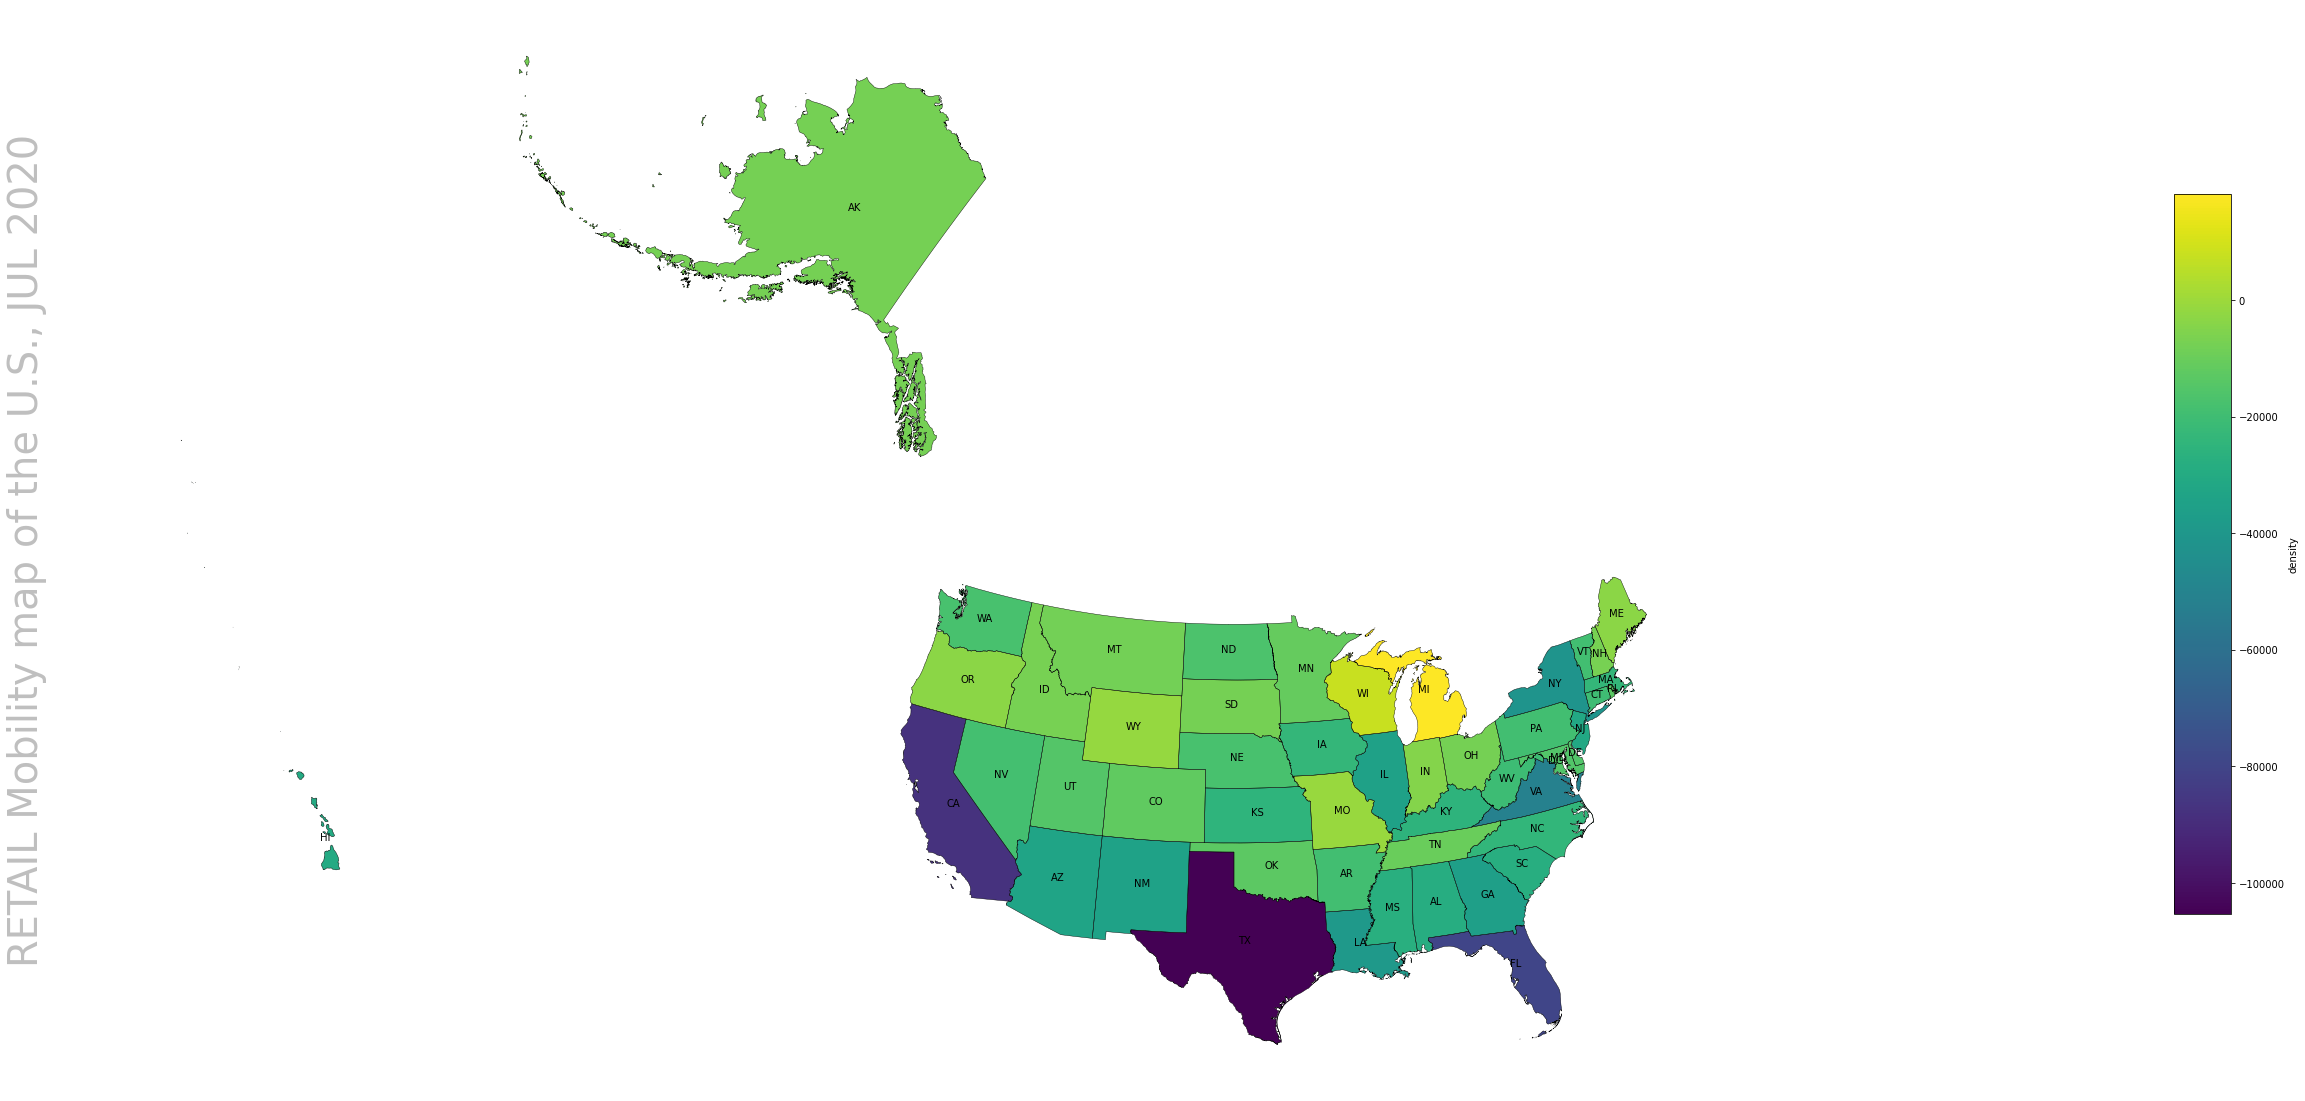

In [ ]:
fig = plt.figure(1, figsize=(40,20))
ax = fig.add_subplot()
##manipulate colorbar/legend (empty one)
# use this simple colormap
my_colormap = plt.cm.viridis #Reds # Pastel2 #works

fig = ax.get_figure()
cax = fig.add_axes([0.95, .25, 0.02, 0.5]) #[left,bottom,width,height][0.9, .25, 0.02, 0.5])
sm = plt.cm.ScalarMappable(
    cmap=my_colormap,
    norm=plt.Normalize(vmin=min_retail20,vmax=max_retail20)
    )

##clear the array of the scalar mappable
sm._A = []
cb = fig.colorbar(sm, cax=cax)
cb.set_label('density')
# manipulate the axis setttings
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

retail_7_20.apply(lambda x: ax.annotate(s=x.State_abr,# + "\n" + str(math.floor(x.ALAND / 2589988.1103)) + " sq mi",
                                      xy=x.geometry.centroid.coords[0],
                                      ha='center',
                                      fontsize=10),
                axis=1);

retail_7_20.boundary.plot(ax=ax, color='Black', linewidth=.4)
retail_7_20.plot(ax=ax, column='retail_and_recreation_percent_change_from_baseline', cmap='viridis', figsize=(12, 12));
ax.text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., JUL 2020', transform=ax.transAxes,
        fontsize=40, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

Text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., AUG 2020')

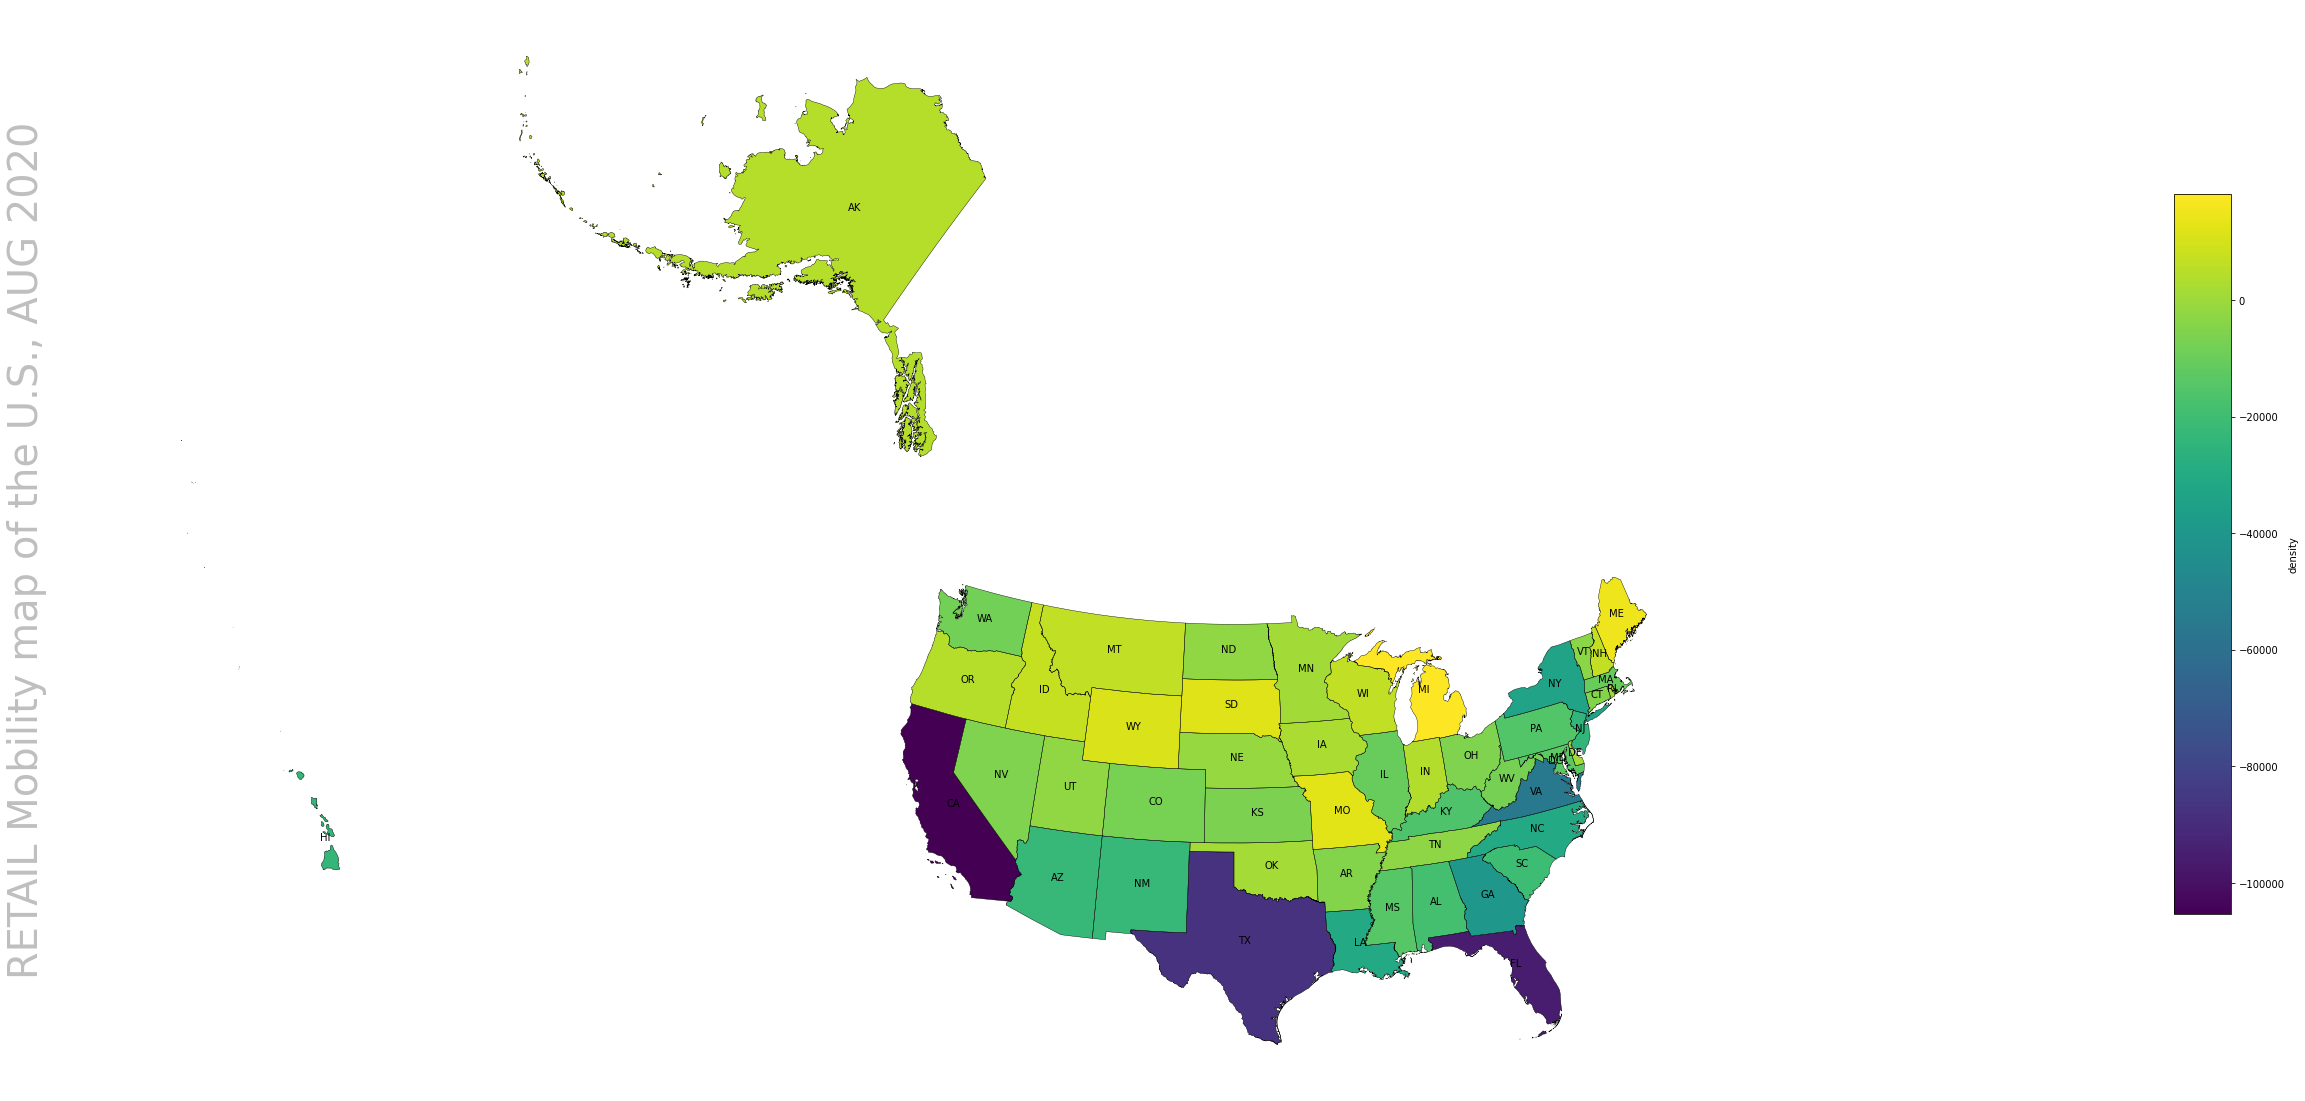

In [ ]:
fig = plt.figure(1, figsize=(40,20))
ax = fig.add_subplot()
##manipulate colorbar/legend (empty one)
# use this simple colormap
my_colormap = plt.cm.viridis #Reds # Pastel2 #works

fig = ax.get_figure()
cax = fig.add_axes([0.95, .25, 0.02, 0.5]) #[left,bottom,width,height][0.9, .25, 0.02, 0.5])
sm = plt.cm.ScalarMappable(
    cmap=my_colormap,
    norm=plt.Normalize(vmin=min_retail20,vmax=max_retail20)
    )

##clear the array of the scalar mappable
sm._A = []
cb = fig.colorbar(sm, cax=cax)
cb.set_label('density')
# manipulate the axis setttings
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

retail_8_20.apply(lambda x: ax.annotate(s=x.State_abr,# + "\n" + str(math.floor(x.ALAND / 2589988.1103)) + " sq mi",
                                      xy=x.geometry.centroid.coords[0],
                                      ha='center',
                                      fontsize=10),
                axis=1);

retail_8_20.boundary.plot(ax=ax, color='Black', linewidth=.4)
retail_8_20.plot(ax=ax, column='retail_and_recreation_percent_change_from_baseline', cmap='viridis', figsize=(12, 12));
ax.text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., AUG 2020', transform=ax.transAxes,
        fontsize=40, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

Text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., SEP 2020')

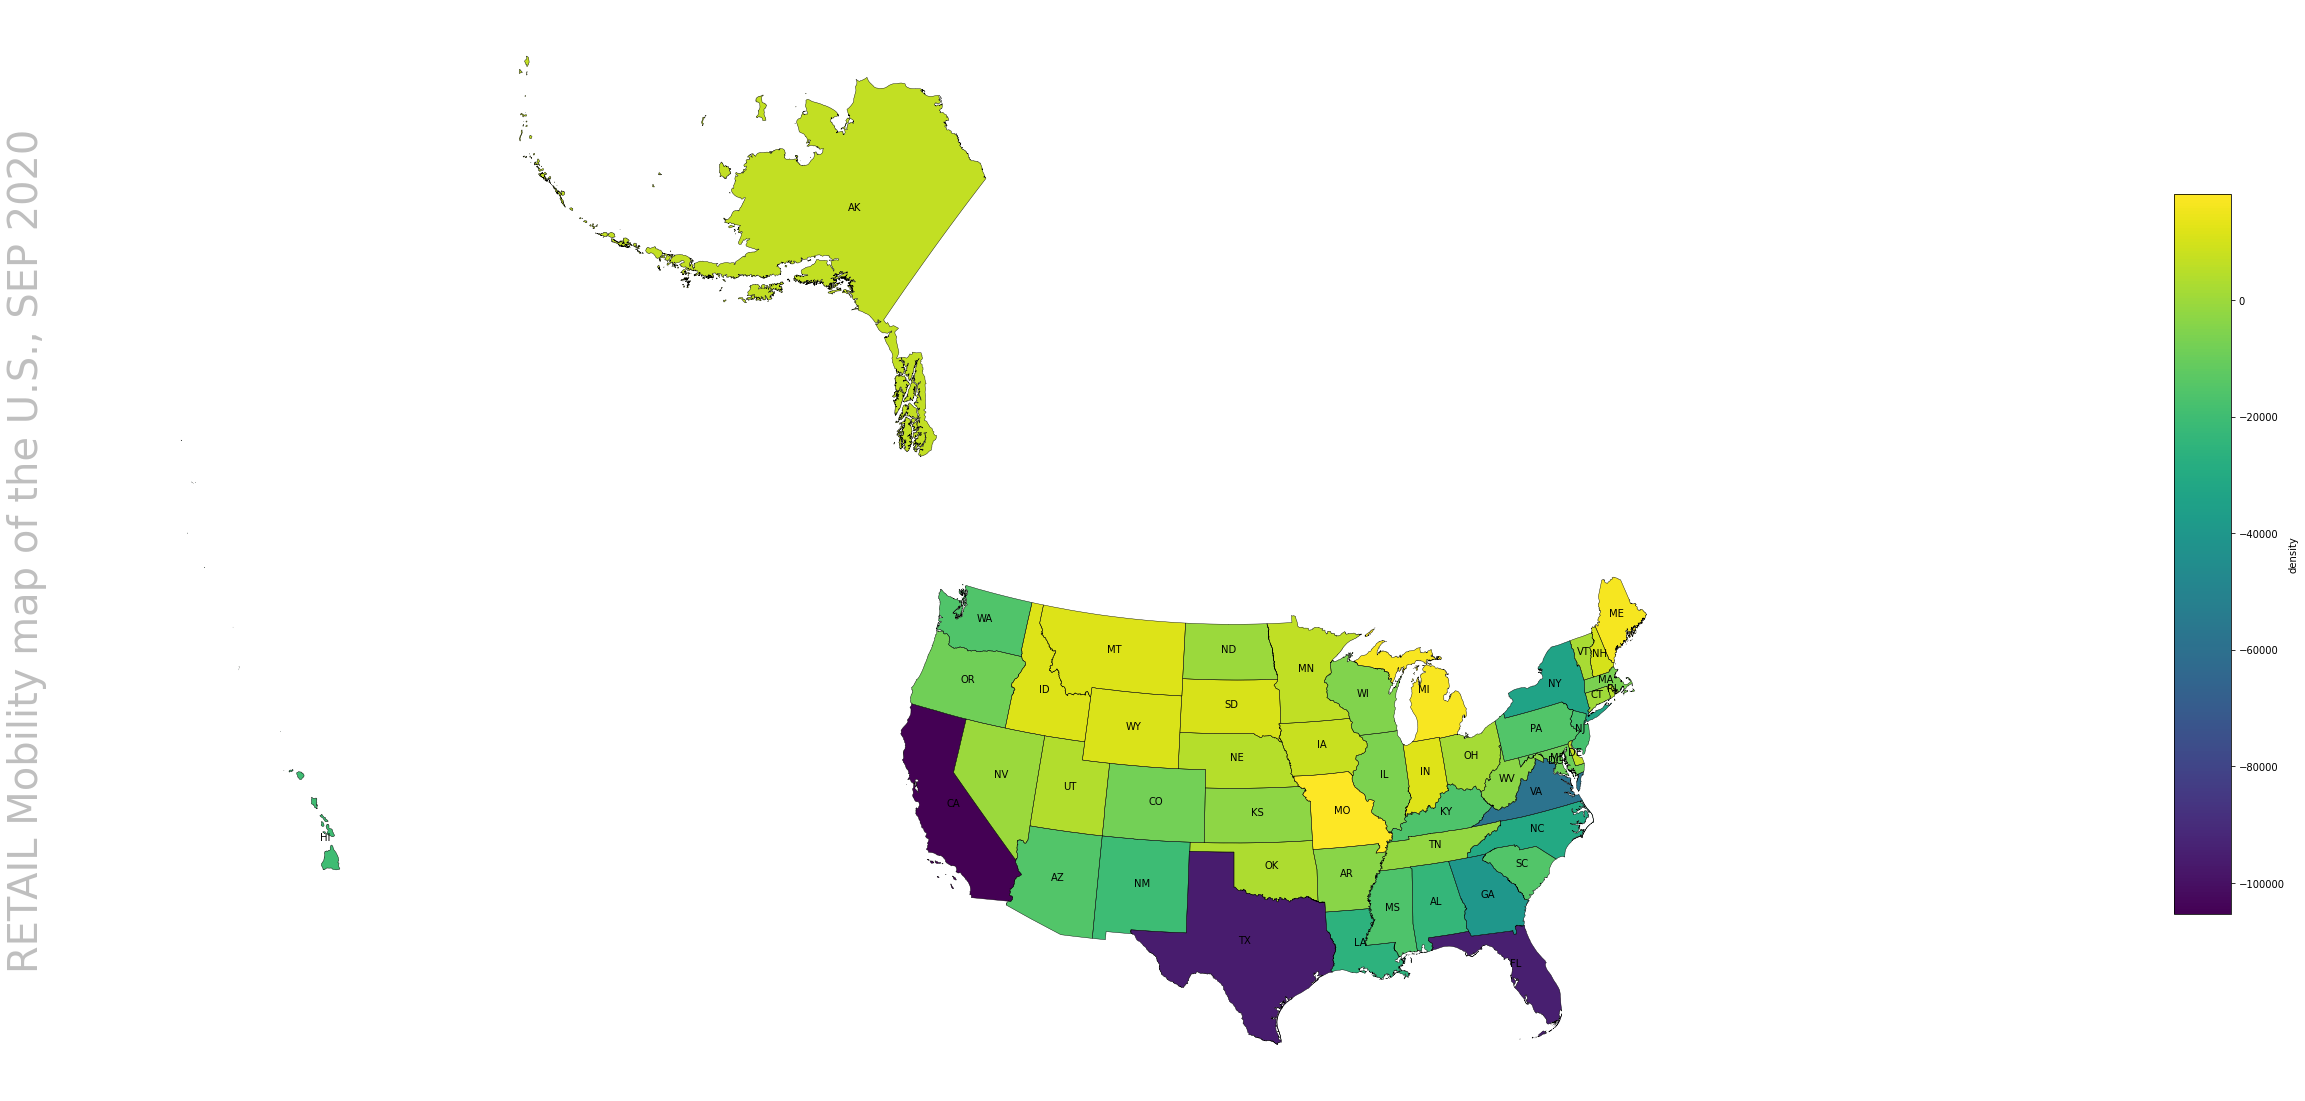

In [ ]:
fig = plt.figure(1, figsize=(40,20))
ax = fig.add_subplot()
##manipulate colorbar/legend (empty one)
# use this simple colormap
my_colormap = plt.cm.viridis #Reds # Pastel2 #works

fig = ax.get_figure()
cax = fig.add_axes([0.95, .25, 0.02, 0.5]) #[left,bottom,width,height][0.9, .25, 0.02, 0.5])
sm = plt.cm.ScalarMappable(
    cmap=my_colormap,
    norm=plt.Normalize(vmin=min_retail20,vmax=max_retail20)
    )

##clear the array of the scalar mappable
sm._A = []
cb = fig.colorbar(sm, cax=cax)
cb.set_label('density')
# manipulate the axis setttings
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

retail_9_20.apply(lambda x: ax.annotate(s=x.State_abr,# + "\n" + str(math.floor(x.ALAND / 2589988.1103)) + " sq mi",
                                      xy=x.geometry.centroid.coords[0],
                                      ha='center',
                                      fontsize=10),
                axis=1);

retail_9_20.boundary.plot(ax=ax, color='Black', linewidth=.4)
retail_9_20.plot(ax=ax, column='retail_and_recreation_percent_change_from_baseline', cmap='viridis', figsize=(12, 12));
ax.text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., SEP 2020', transform=ax.transAxes,
        fontsize=40, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

Text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., OCT 2020')

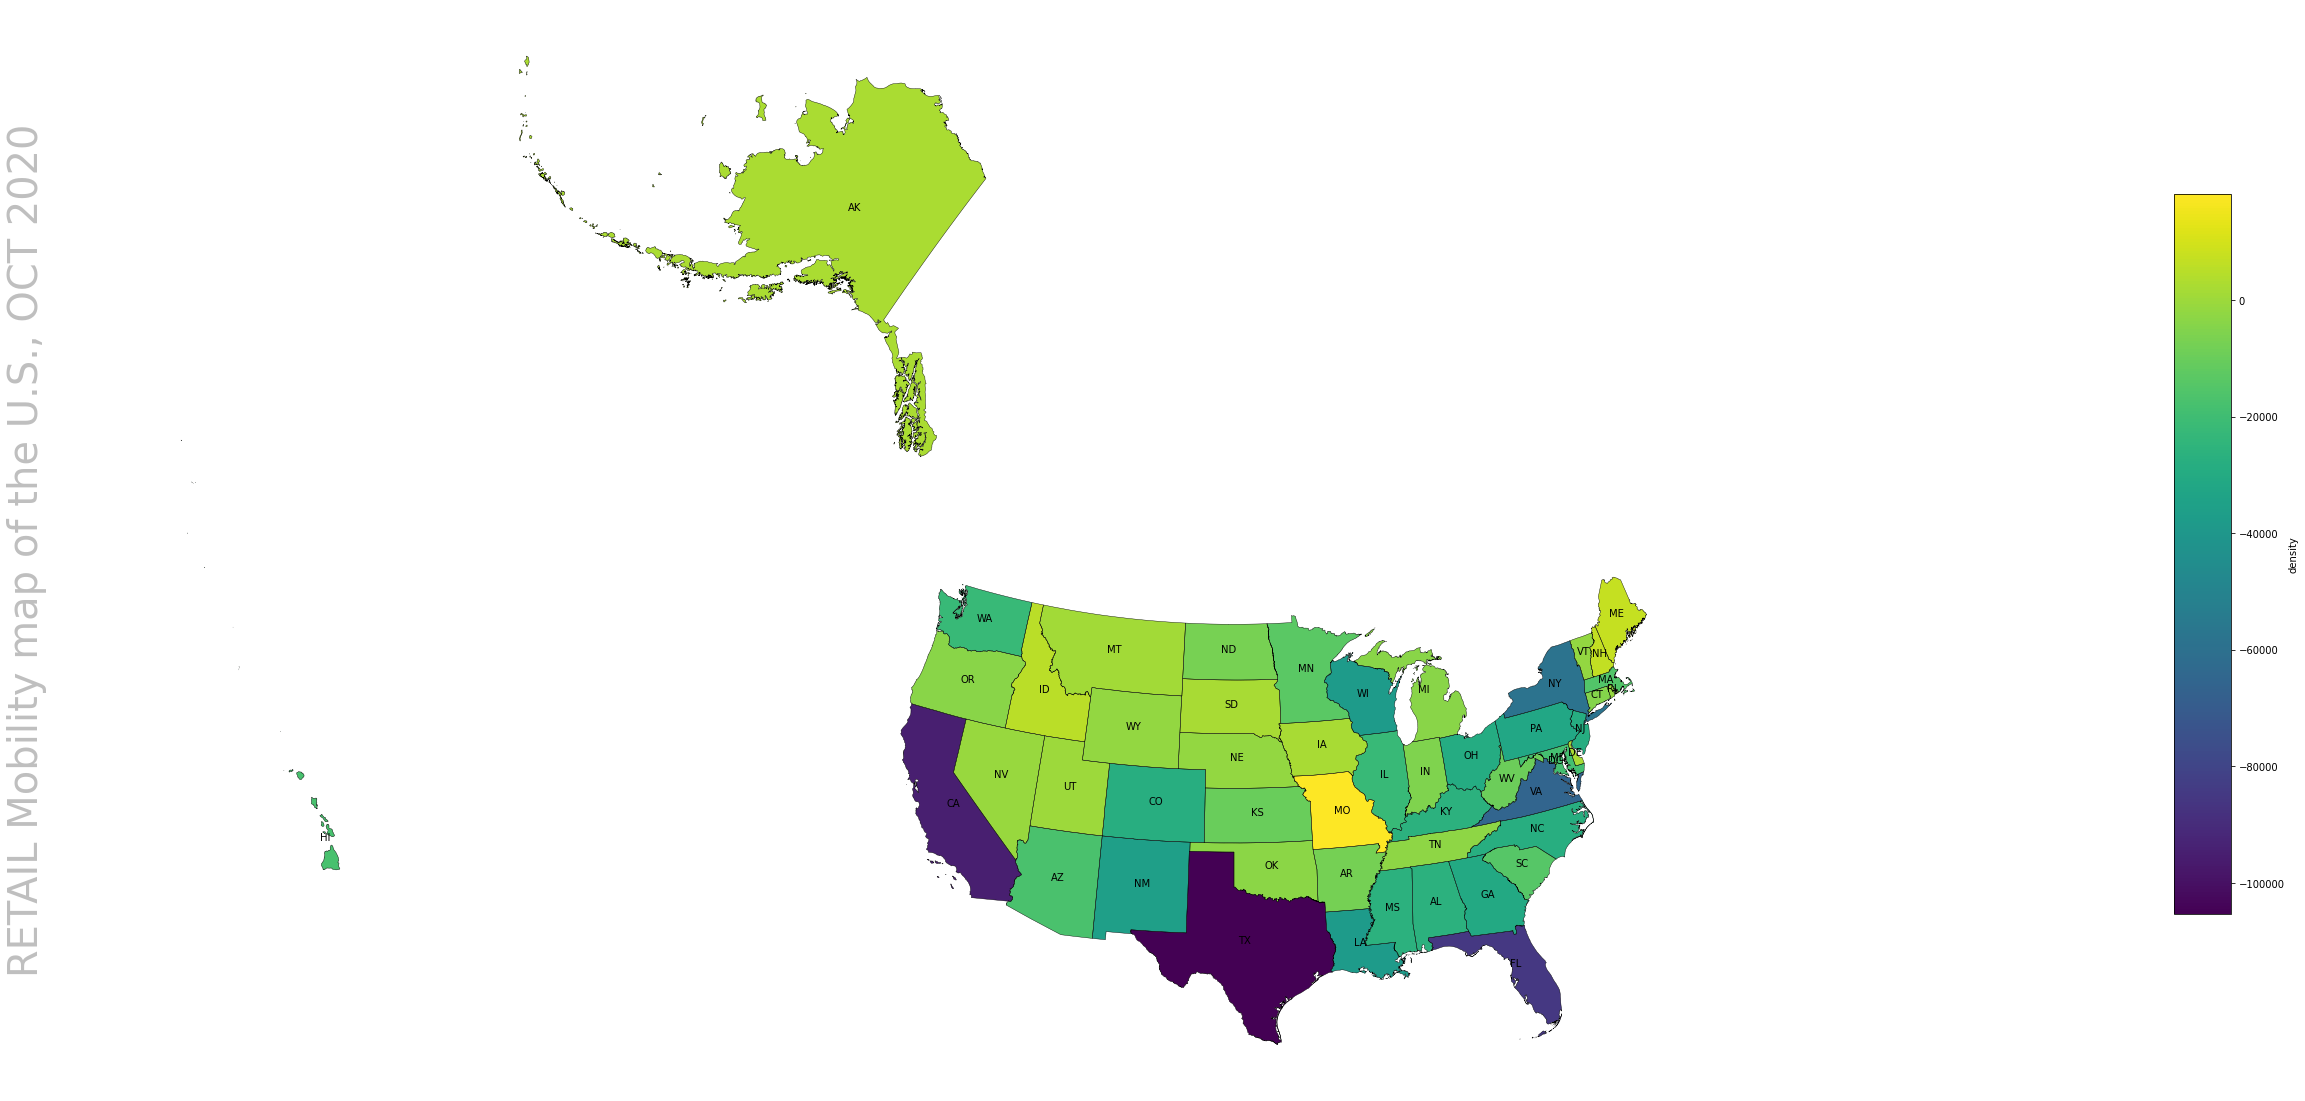

In [ ]:
fig = plt.figure(1, figsize=(40,20))
ax = fig.add_subplot()
##manipulate colorbar/legend (empty one)
# use this simple colormap
my_colormap = plt.cm.viridis #Reds # Pastel2 #works

fig = ax.get_figure()
cax = fig.add_axes([0.95, .25, 0.02, 0.5]) #[left,bottom,width,height][0.9, .25, 0.02, 0.5])
sm = plt.cm.ScalarMappable(
    cmap=my_colormap,
    norm=plt.Normalize(vmin=min_retail20,vmax=max_retail20)
    )

##clear the array of the scalar mappable
sm._A = []
cb = fig.colorbar(sm, cax=cax)
cb.set_label('density')
# manipulate the axis setttings
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

retail_10_20.apply(lambda x: ax.annotate(s=x.State_abr,# + "\n" + str(math.floor(x.ALAND / 2589988.1103)) + " sq mi",
                                      xy=x.geometry.centroid.coords[0],
                                      ha='center',
                                      fontsize=10),
                axis=1);

retail_10_20.boundary.plot(ax=ax, color='Black', linewidth=.4)
retail_10_20.plot(ax=ax, column='retail_and_recreation_percent_change_from_baseline', cmap='viridis', figsize=(12, 12));
ax.text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., OCT 2020', transform=ax.transAxes,
        fontsize=40, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

Text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., NOV 2020')

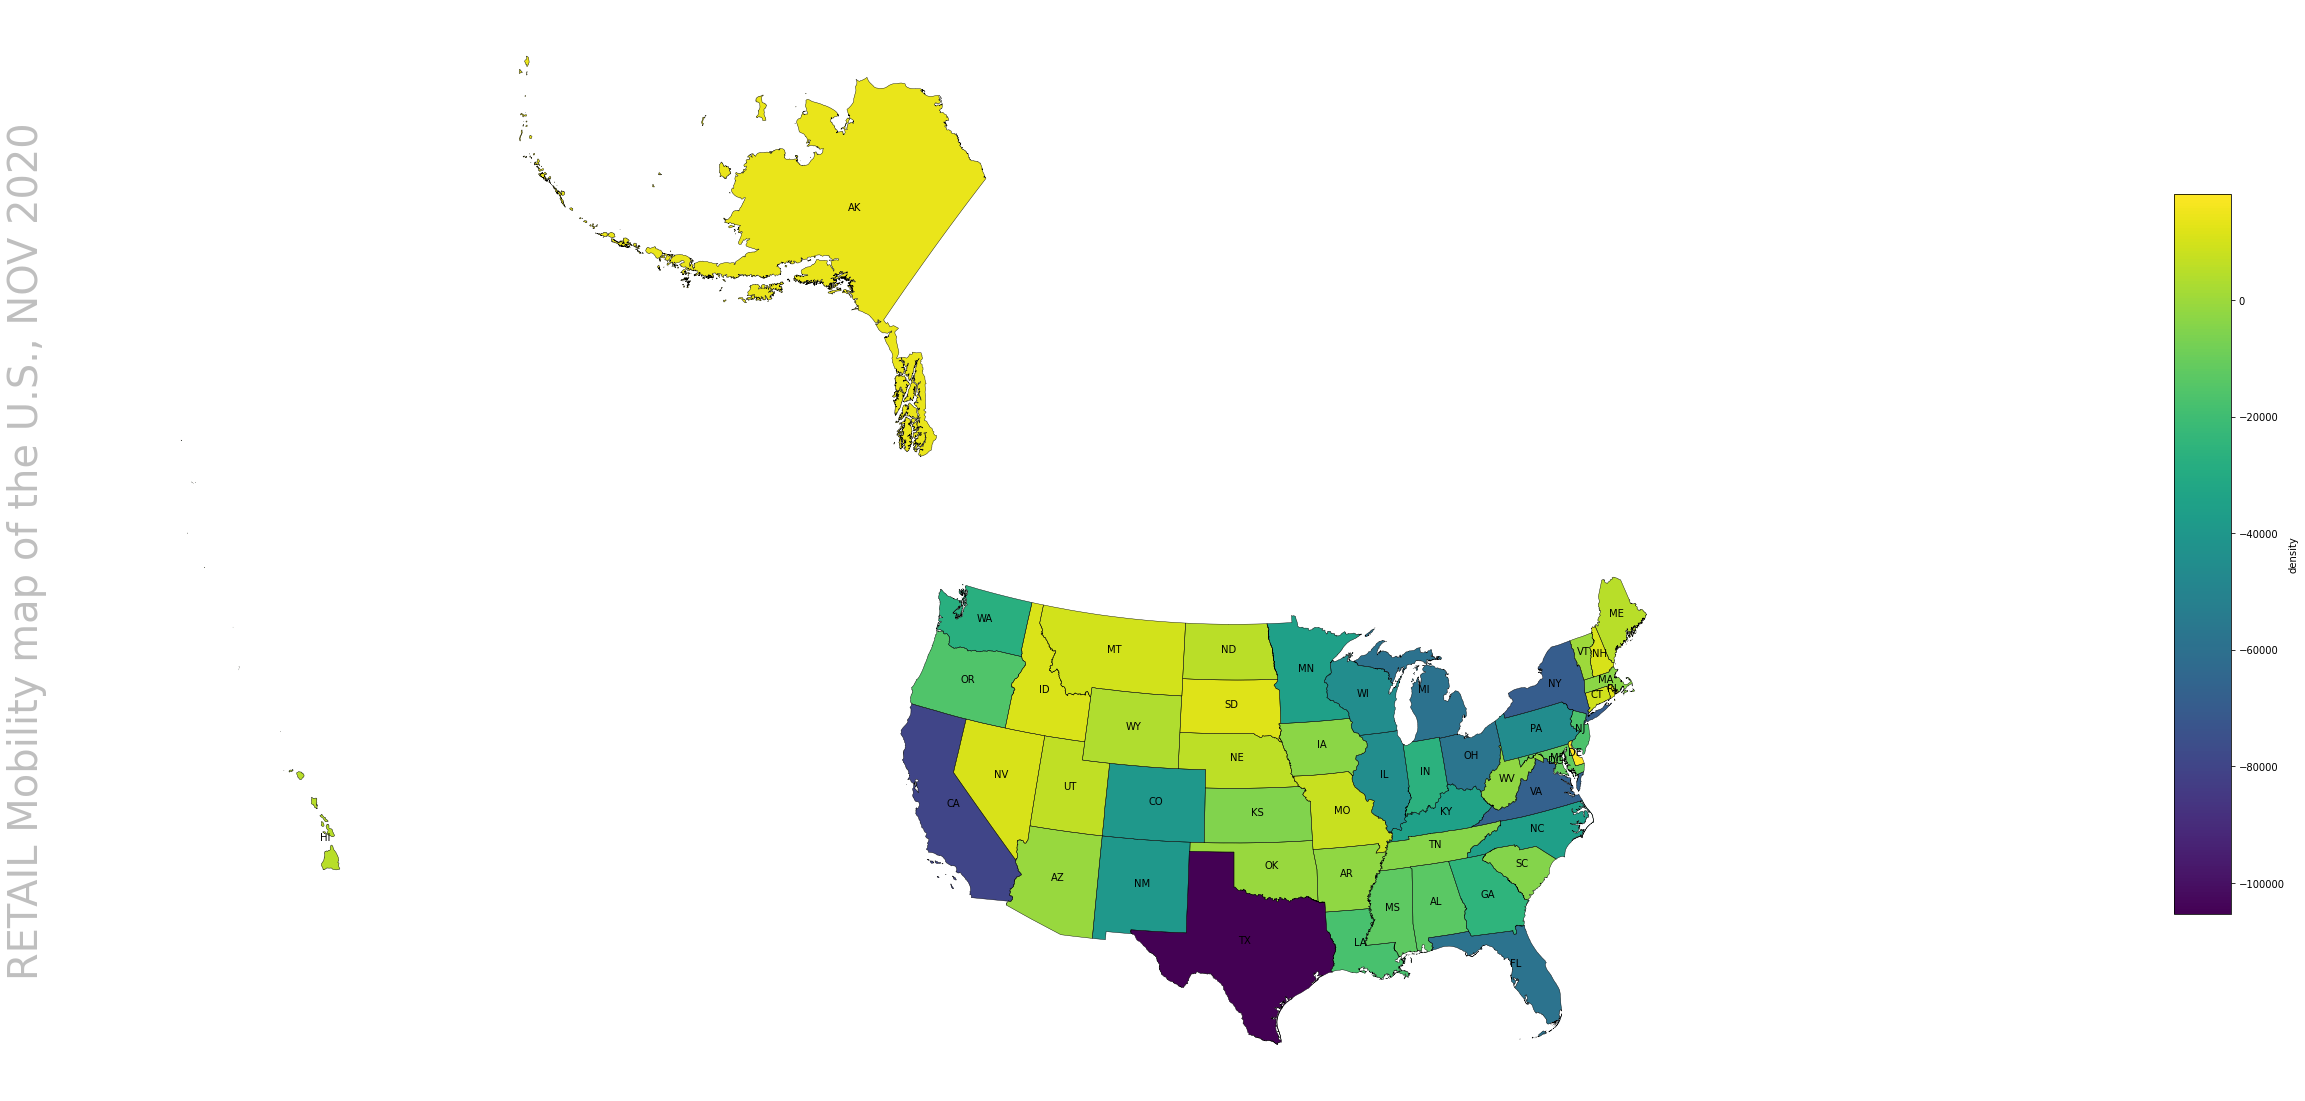

In [ ]:
fig = plt.figure(1, figsize=(40,20))
ax = fig.add_subplot()
##manipulate colorbar/legend (empty one)
# use this simple colormap
my_colormap = plt.cm.viridis #Reds # Pastel2 #works

fig = ax.get_figure()
cax = fig.add_axes([0.95, .25, 0.02, 0.5]) #[left,bottom,width,height][0.9, .25, 0.02, 0.5])
sm = plt.cm.ScalarMappable(
    cmap=my_colormap,
    norm=plt.Normalize(vmin=min_retail20,vmax=max_retail20)
    )

##clear the array of the scalar mappable
sm._A = []
cb = fig.colorbar(sm, cax=cax)
cb.set_label('density')
# manipulate the axis setttings
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

retail_11_20.apply(lambda x: ax.annotate(s=x.State_abr,# + "\n" + str(math.floor(x.ALAND / 2589988.1103)) + " sq mi",
                                      xy=x.geometry.centroid.coords[0],
                                      ha='center',
                                      fontsize=10),
                axis=1);

retail_11_20.boundary.plot(ax=ax, color='Black', linewidth=.4)
retail_11_20.plot(ax=ax, column='retail_and_recreation_percent_change_from_baseline', cmap='viridis', figsize=(12, 12));
ax.text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., NOV 2020', transform=ax.transAxes,
        fontsize=40, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

Text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., DEC 2020')

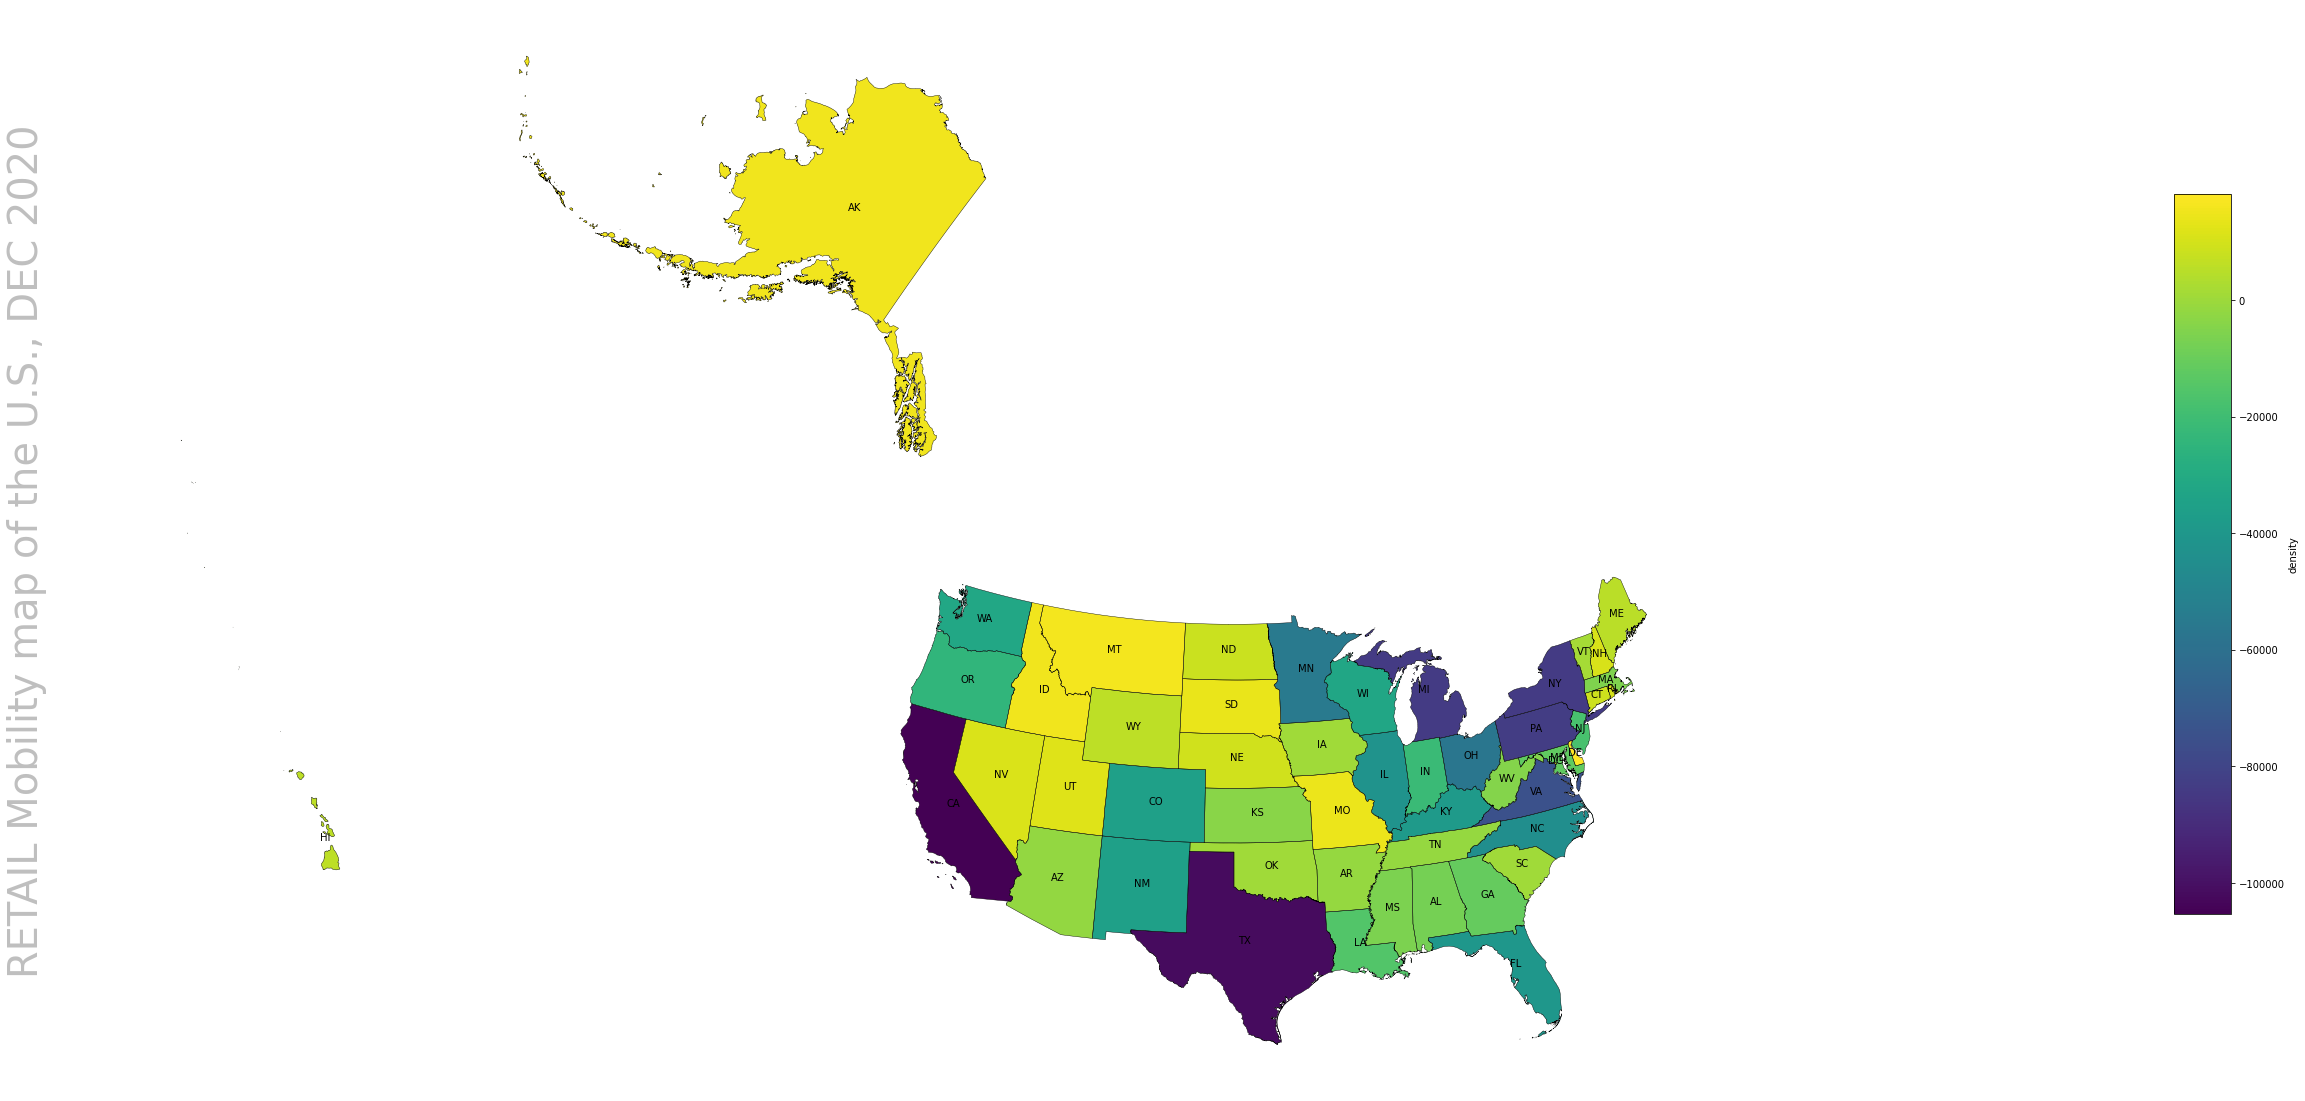

In [ ]:
fig = plt.figure(1, figsize=(40,20))
ax = fig.add_subplot()
##manipulate colorbar/legend (empty one)
# use this simple colormap
my_colormap = plt.cm.viridis #Reds # Pastel2 #works

fig = ax.get_figure()
cax = fig.add_axes([0.95, .25, 0.02, 0.5]) #[left,bottom,width,height][0.9, .25, 0.02, 0.5])
sm = plt.cm.ScalarMappable(
    cmap=my_colormap,
    norm=plt.Normalize(vmin=min_retail20,vmax=max_retail20)
    )

##clear the array of the scalar mappable
sm._A = []
cb = fig.colorbar(sm, cax=cax)
cb.set_label('density')
# manipulate the axis setttings
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

retail_12_20.apply(lambda x: ax.annotate(s=x.State_abr,# + "\n" + str(math.floor(x.ALAND / 2589988.1103)) + " sq mi",
                                      xy=x.geometry.centroid.coords[0],
                                      ha='center',
                                      fontsize=10),
                axis=1);

retail_12_20.boundary.plot(ax=ax, color='Black', linewidth=.4)
retail_12_20.plot(ax=ax, column='retail_and_recreation_percent_change_from_baseline', cmap='viridis', figsize=(12, 12));
ax.text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., DEC 2020', transform=ax.transAxes,
        fontsize=40, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:405: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


Text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., JAN 2021')

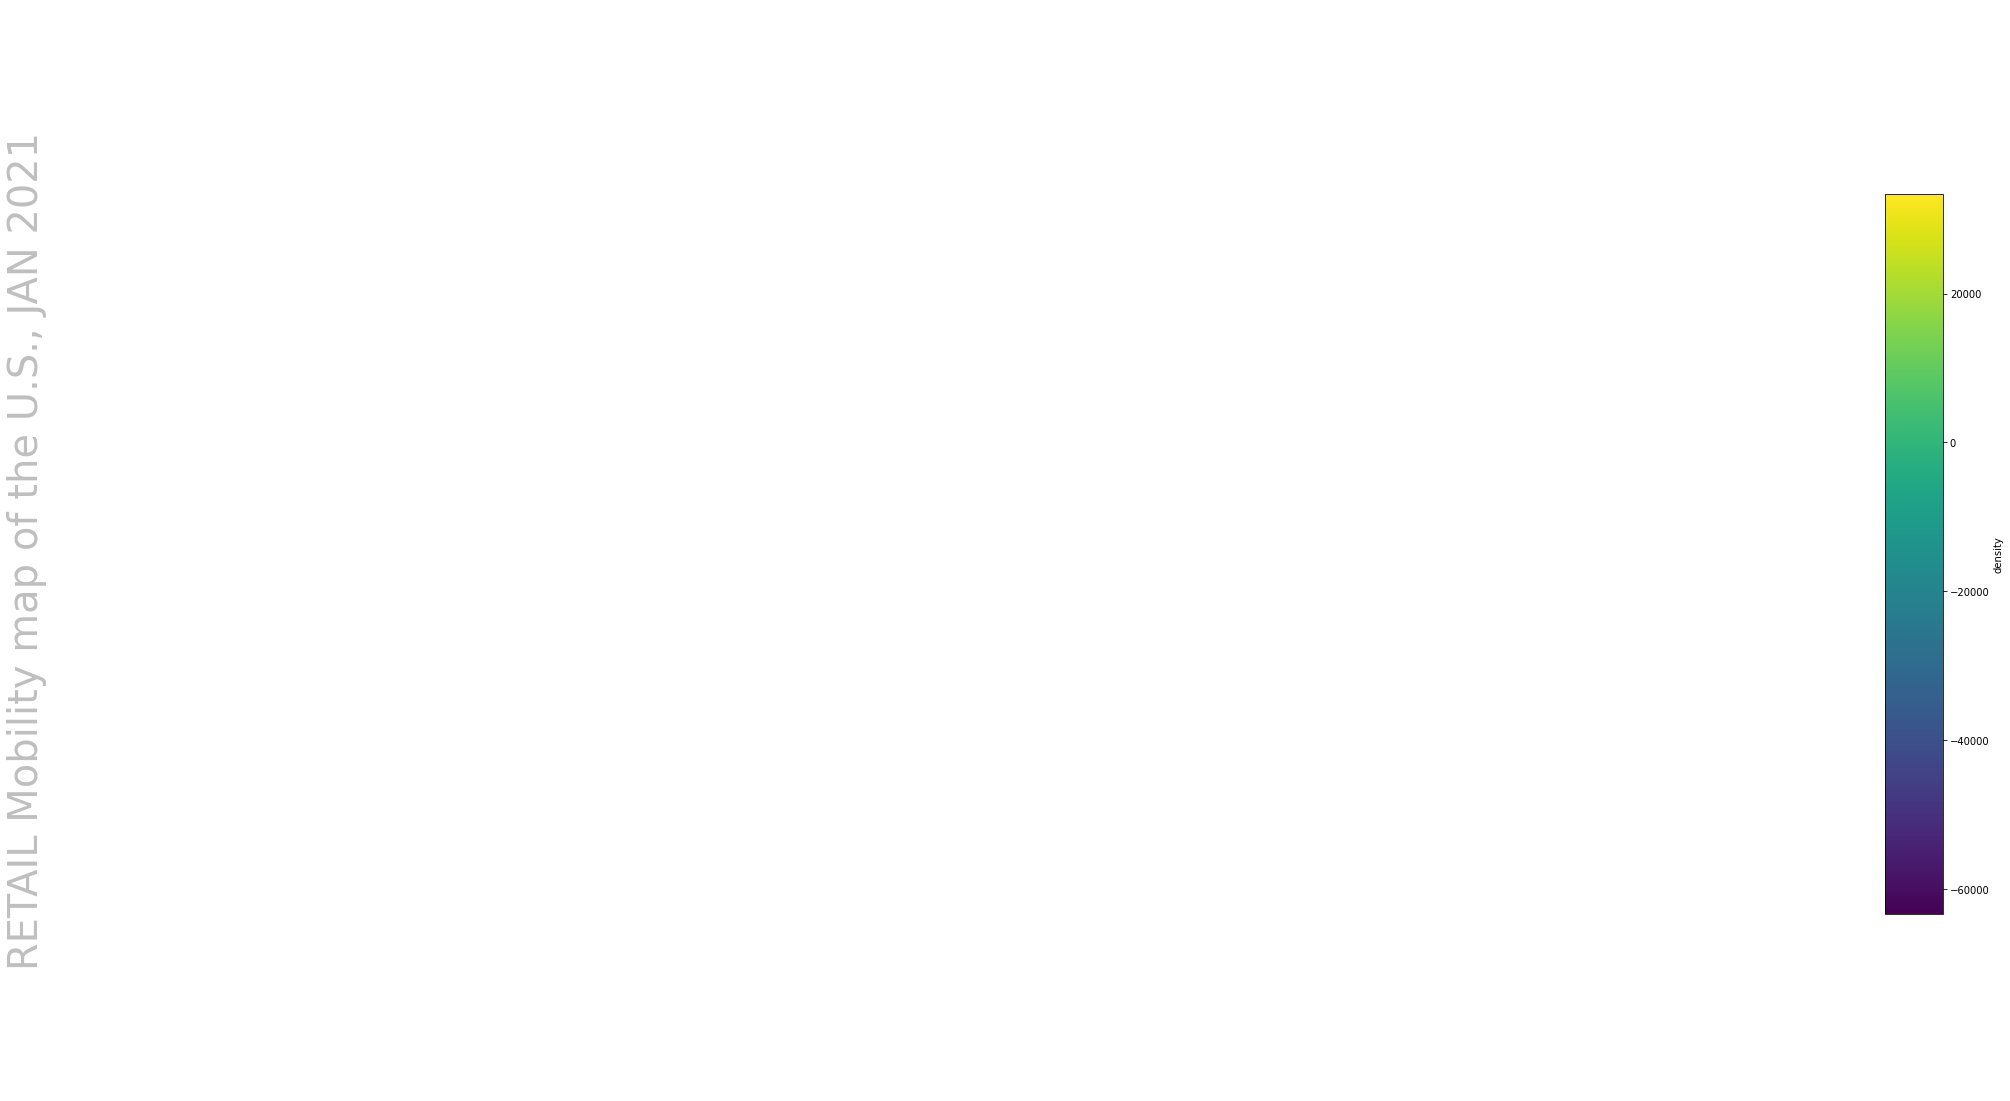

In [ ]:
fig = plt.figure(1, figsize=(40,20))
ax = fig.add_subplot()
##manipulate colorbar/legend (empty one)
# use this simple colormap
my_colormap = plt.cm.viridis #Reds # Pastel2 #works

fig = ax.get_figure()
cax = fig.add_axes([0.95, .25, 0.02, 0.5]) #[left,bottom,width,height][0.9, .25, 0.02, 0.5])
sm = plt.cm.ScalarMappable(
    cmap=my_colormap,
    norm=plt.Normalize(vmin=min_retail21,vmax=max_retail21)
    )

##clear the array of the scalar mappable
sm._A = []
cb = fig.colorbar(sm, cax=cax)
cb.set_label('density')
# manipulate the axis setttings
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

retail_1_21.apply(lambda x: ax.annotate(s=x.State_abr,# + "\n" + str(math.floor(x.ALAND / 2589988.1103)) + " sq mi",
                                      xy=x.geometry.centroid.coords[0],
                                      ha='center',
                                      fontsize=10),
                axis=1);

retail_1_21.boundary.plot(ax=ax, color='Black', linewidth=.4)
retail_1_21.plot(ax=ax, column='retail_and_recreation_percent_change_from_baseline', cmap='viridis', figsize=(12, 12));
ax.text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., JAN 2021', transform=ax.transAxes,
        fontsize=40, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

Text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., FEB 2021')

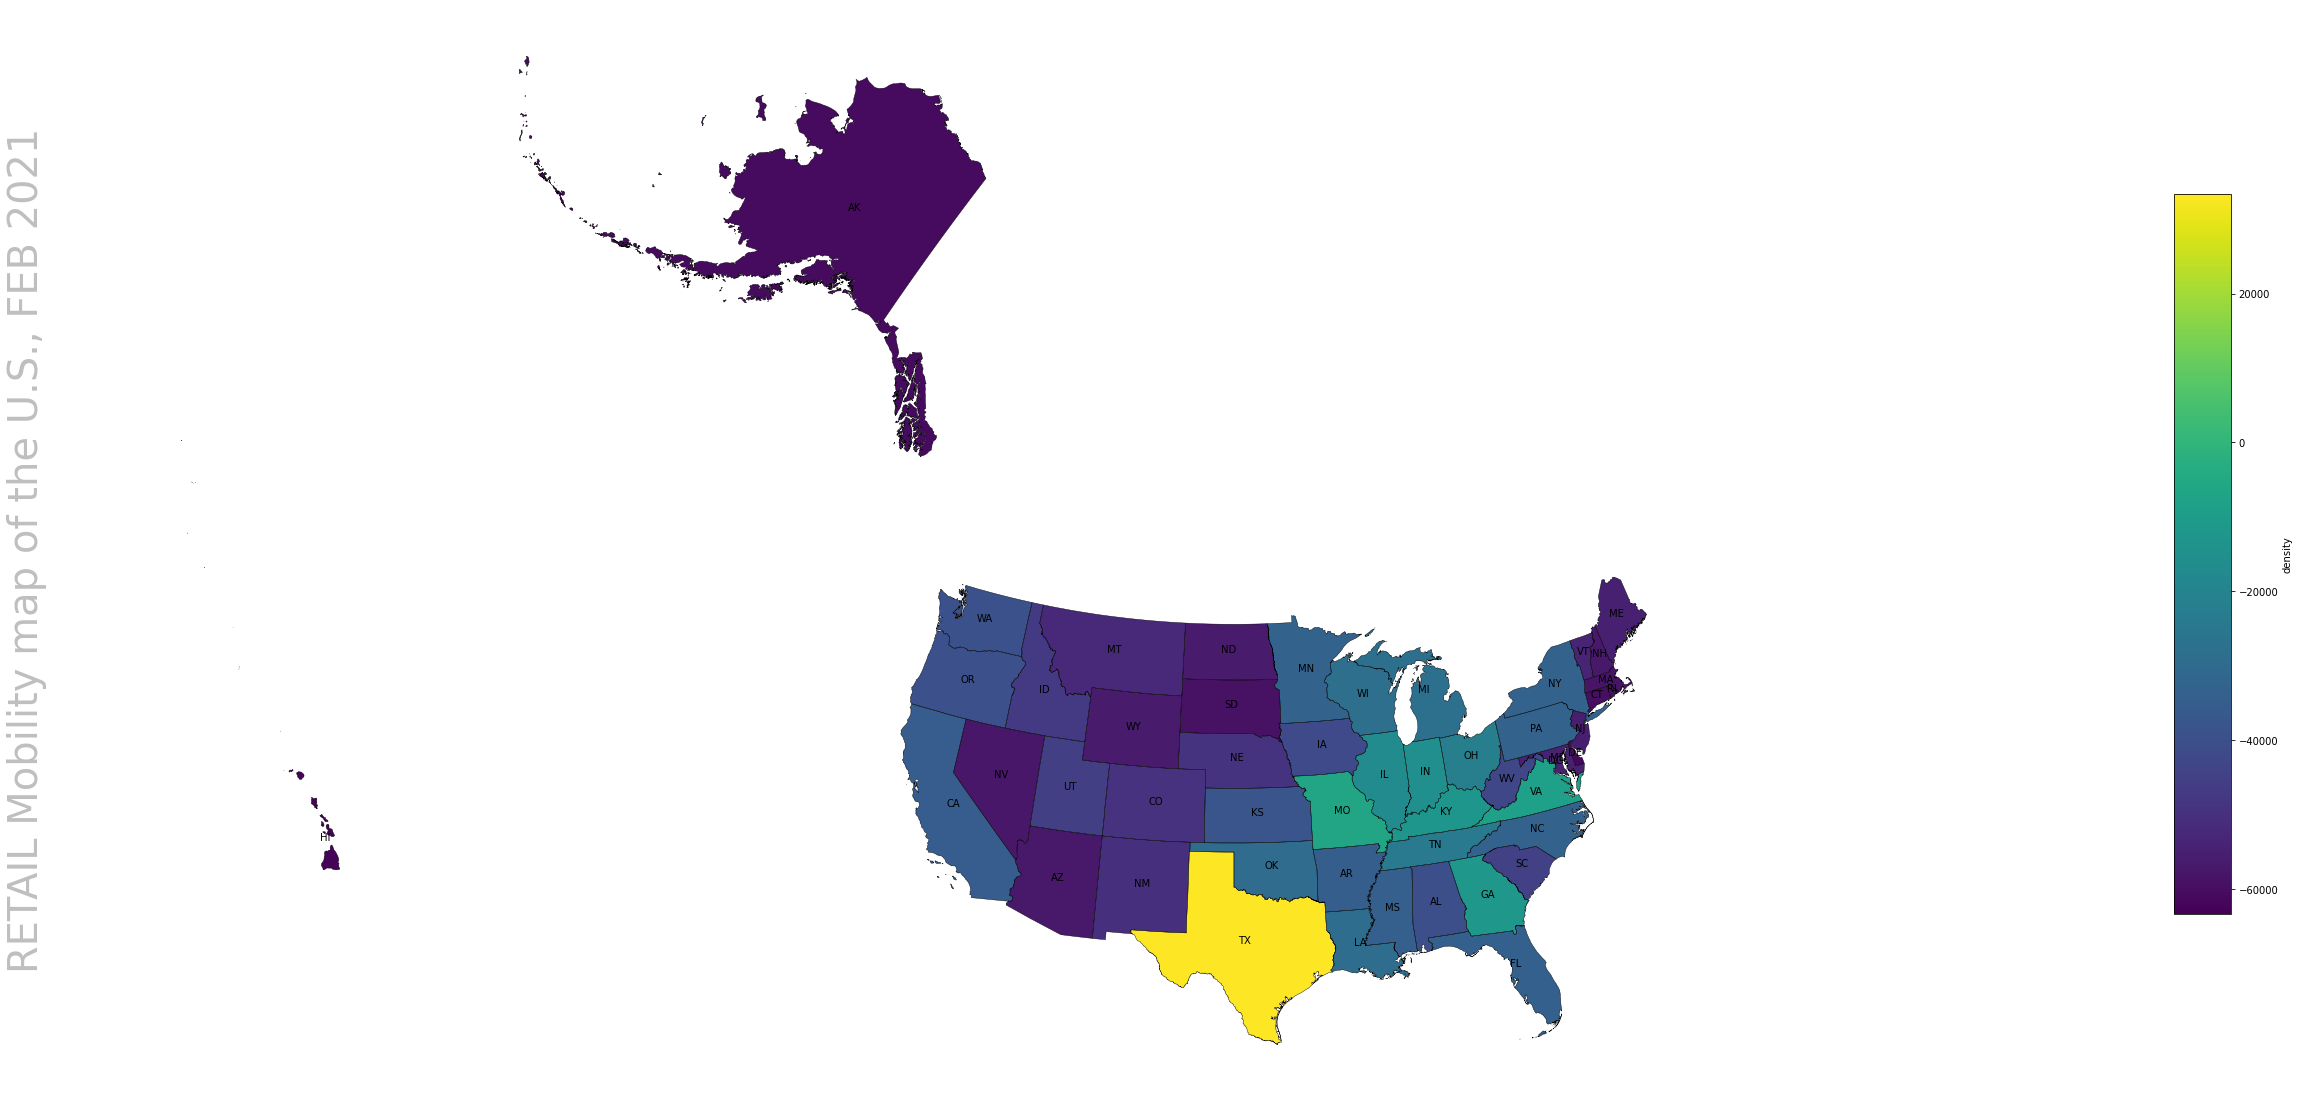

In [ ]:
fig = plt.figure(1, figsize=(40,20))
ax = fig.add_subplot()
##manipulate colorbar/legend (empty one)
# use this simple colormap
my_colormap = plt.cm.viridis #Reds # Pastel2 #works

fig = ax.get_figure()
cax = fig.add_axes([0.95, .25, 0.02, 0.5]) #[left,bottom,width,height][0.9, .25, 0.02, 0.5])
sm = plt.cm.ScalarMappable(
    cmap=my_colormap,
    norm=plt.Normalize(vmin=min_retail21,vmax=max_retail21)
    )

##clear the array of the scalar mappable
sm._A = []
cb = fig.colorbar(sm, cax=cax)
cb.set_label('density')
# manipulate the axis setttings
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

retail_2_21.apply(lambda x: ax.annotate(s=x.State_abr,# + "\n" + str(math.floor(x.ALAND / 2589988.1103)) + " sq mi",
                                      xy=x.geometry.centroid.coords[0],
                                      ha='center',
                                      fontsize=10),
                axis=1);

retail_2_21.boundary.plot(ax=ax, color='Black', linewidth=.4)
retail_2_21.plot(ax=ax, column='retail_and_recreation_percent_change_from_baseline', cmap='viridis', figsize=(12, 12));
ax.text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., FEB 2021', transform=ax.transAxes,
        fontsize=40, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

Text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., MAR 2021')

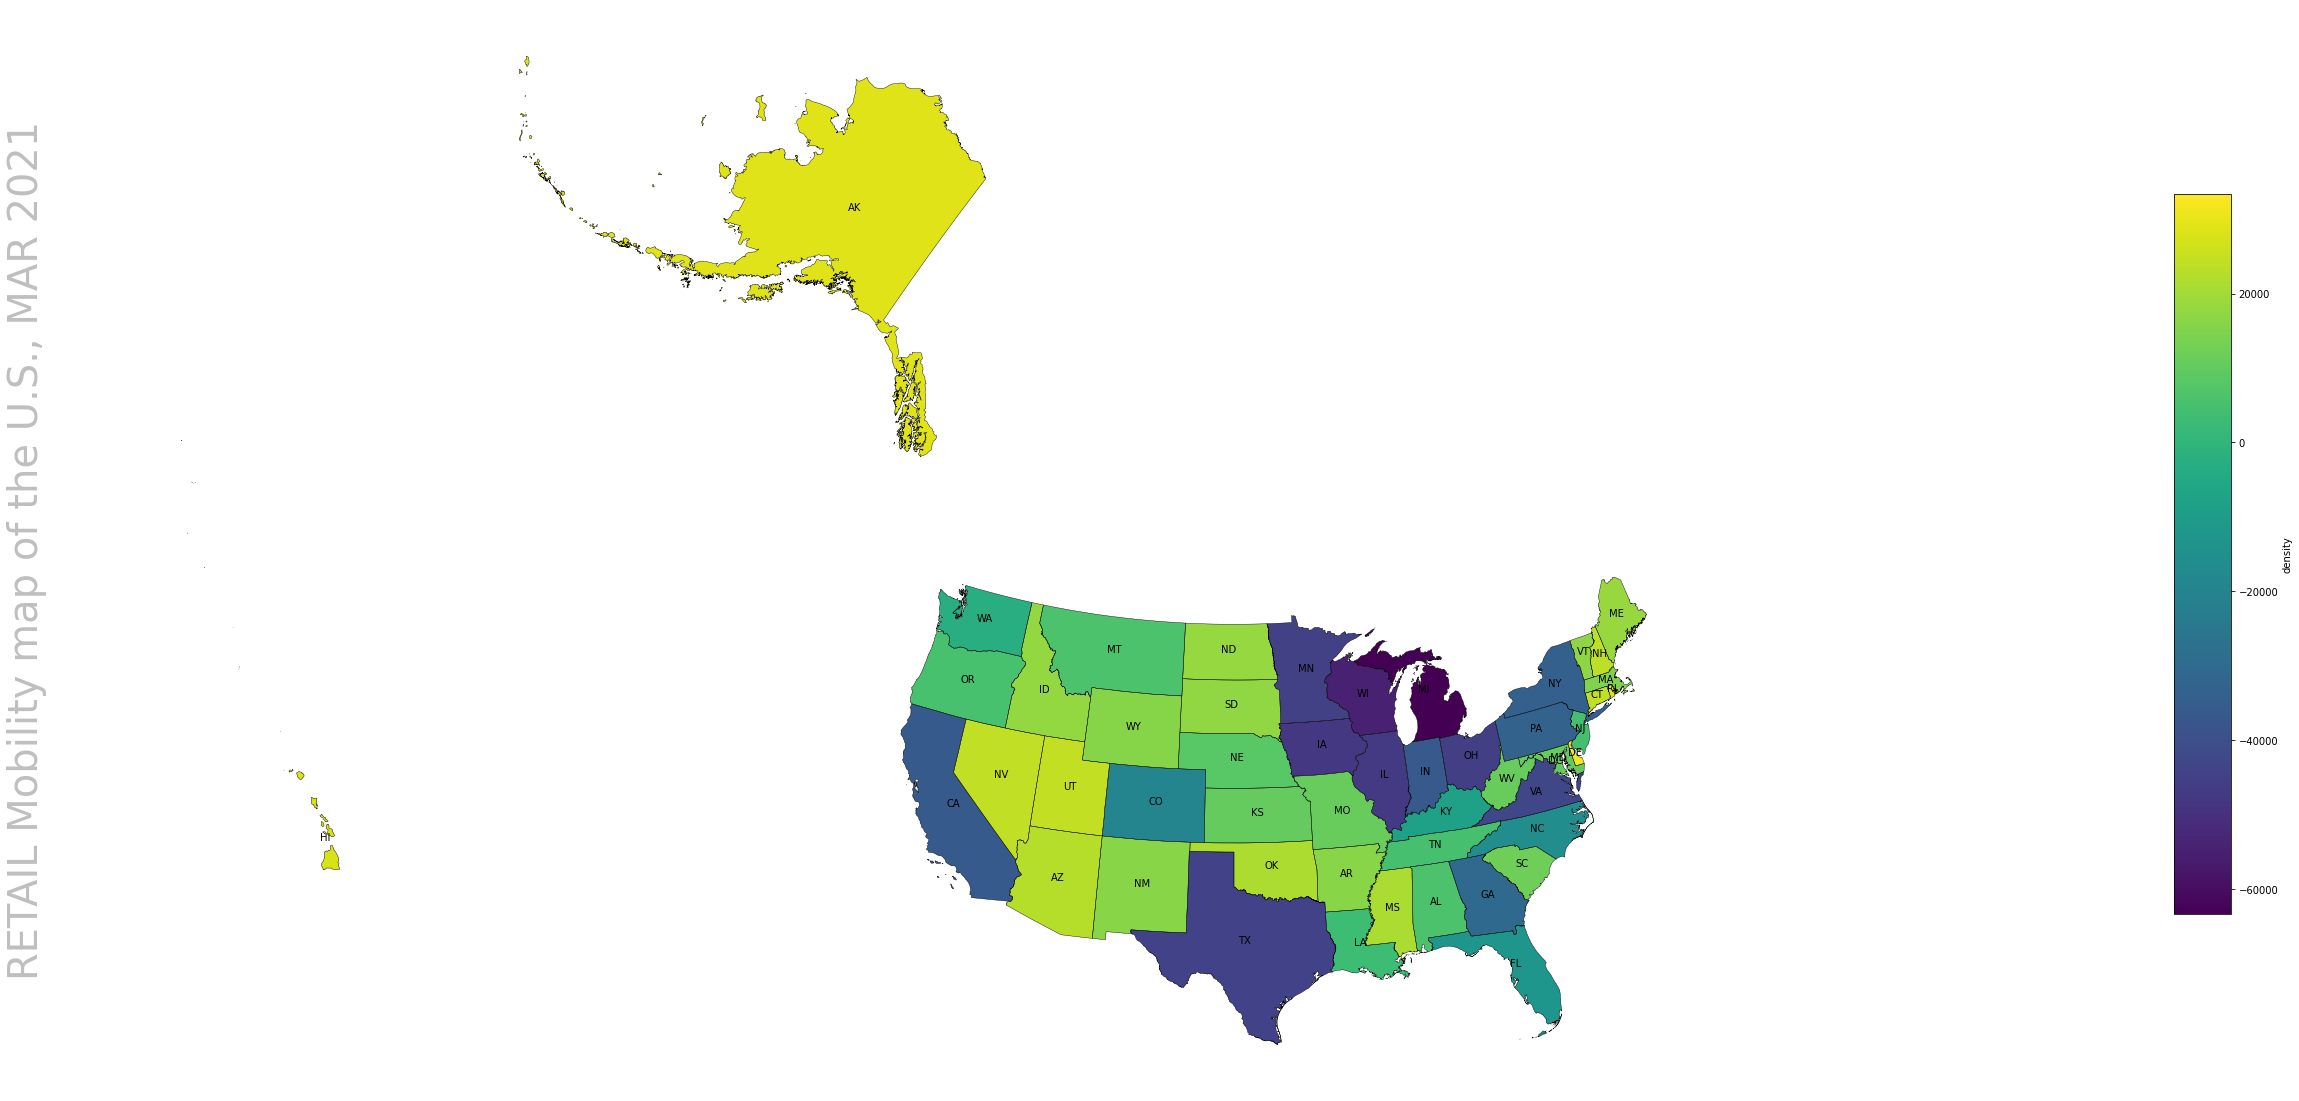

In [ ]:
fig = plt.figure(1, figsize=(40,20))
ax = fig.add_subplot()
##manipulate colorbar/legend (empty one)
# use this simple colormap
my_colormap = plt.cm.viridis #Reds # Pastel2 #works

fig = ax.get_figure()
cax = fig.add_axes([0.95, .25, 0.02, 0.5]) #[left,bottom,width,height][0.9, .25, 0.02, 0.5])
sm = plt.cm.ScalarMappable(
    cmap=my_colormap,
    norm=plt.Normalize(vmin=min_retail21,vmax=max_retail21)
    )

##clear the array of the scalar mappable
sm._A = []
cb = fig.colorbar(sm, cax=cax)
cb.set_label('density')
# manipulate the axis setttings
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

retail_3_21.apply(lambda x: ax.annotate(s=x.State_abr,# + "\n" + str(math.floor(x.ALAND / 2589988.1103)) + " sq mi",
                                      xy=x.geometry.centroid.coords[0],
                                      ha='center',
                                      fontsize=10),
                axis=1);

retail_3_21.boundary.plot(ax=ax, color='Black', linewidth=.4)
retail_3_21.plot(ax=ax, column='retail_and_recreation_percent_change_from_baseline', cmap='viridis', figsize=(12, 12));
ax.text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., MAR 2021', transform=ax.transAxes,
        fontsize=40, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

Text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., APR 2021')

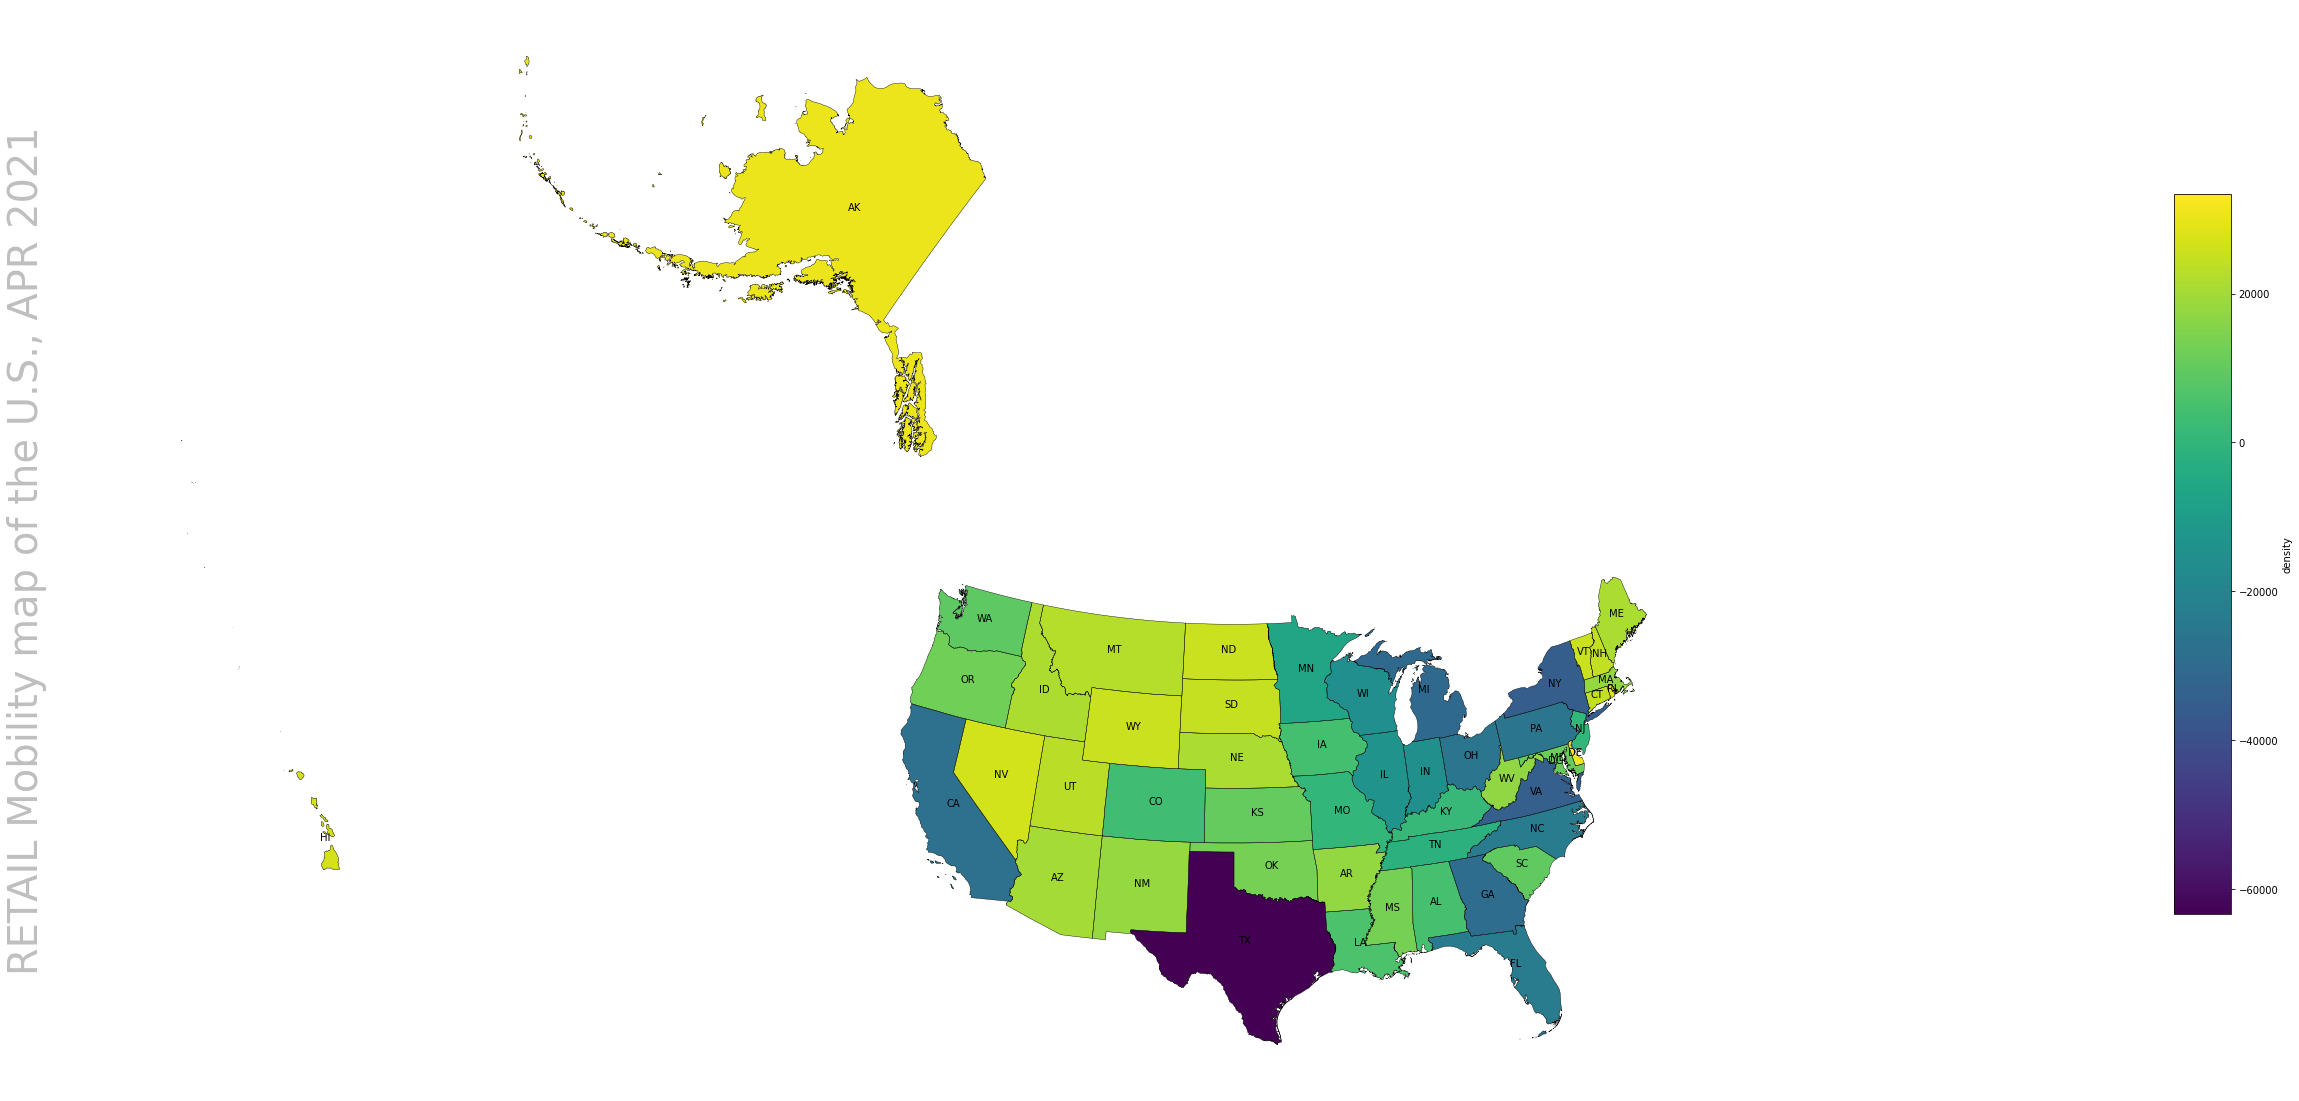

In [ ]:
fig = plt.figure(1, figsize=(40,20))
ax = fig.add_subplot()
##manipulate colorbar/legend (empty one)
# use this simple colormap
my_colormap = plt.cm.viridis #Reds # Pastel2 #works

fig = ax.get_figure()
cax = fig.add_axes([0.95, .25, 0.02, 0.5]) #[left,bottom,width,height][0.9, .25, 0.02, 0.5])
sm = plt.cm.ScalarMappable(
    cmap=my_colormap,
    norm=plt.Normalize(vmin=min_retail21,vmax=max_retail21)
    )

##clear the array of the scalar mappable
sm._A = []
cb = fig.colorbar(sm, cax=cax)
cb.set_label('density')
# manipulate the axis setttings
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

retail_4_21.apply(lambda x: ax.annotate(s=x.State_abr,# + "\n" + str(math.floor(x.ALAND / 2589988.1103)) + " sq mi",
                                      xy=x.geometry.centroid.coords[0],
                                      ha='center',
                                      fontsize=10),
                axis=1);

retail_4_21.boundary.plot(ax=ax, color='Black', linewidth=.4)
retail_4_21.plot(ax=ax, column='retail_and_recreation_percent_change_from_baseline', cmap='viridis', figsize=(12, 12));
ax.text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., APR 2021', transform=ax.transAxes,
        fontsize=40, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

Text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., MAY 2021')

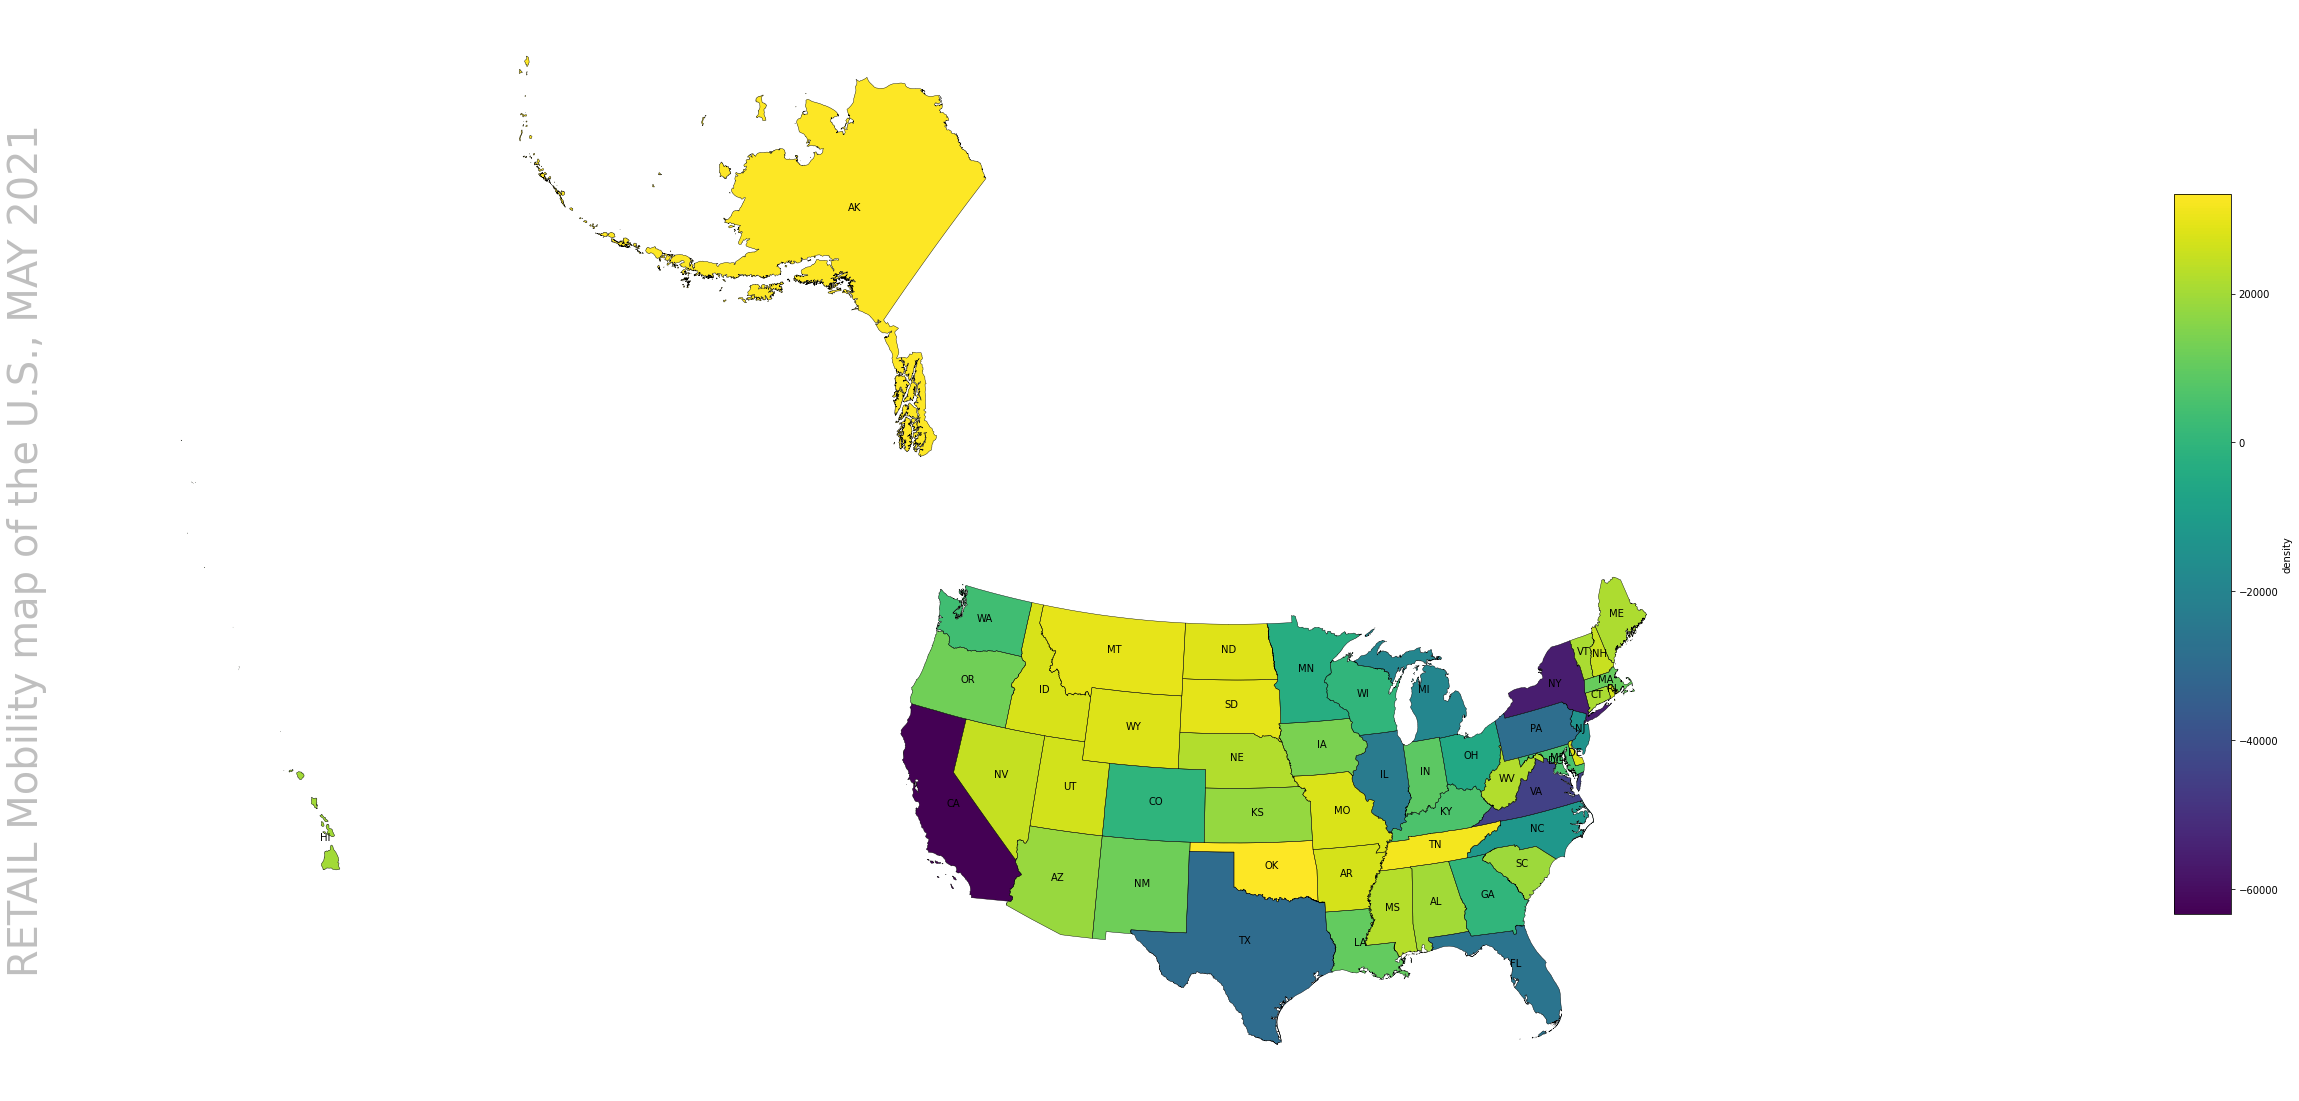

In [ ]:
fig = plt.figure(1, figsize=(40,20))
ax = fig.add_subplot()
##manipulate colorbar/legend (empty one)
# use this simple colormap
my_colormap = plt.cm.viridis #Reds # Pastel2 #works

fig = ax.get_figure()
cax = fig.add_axes([0.95, .25, 0.02, 0.5]) #[left,bottom,width,height][0.9, .25, 0.02, 0.5])
sm = plt.cm.ScalarMappable(
    cmap=my_colormap,
    norm=plt.Normalize(vmin=min_retail21,vmax=max_retail21)
    )

##clear the array of the scalar mappable
sm._A = []
cb = fig.colorbar(sm, cax=cax)
cb.set_label('density')
# manipulate the axis setttings
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

retail_5_21.apply(lambda x: ax.annotate(s=x.State_abr,# + "\n" + str(math.floor(x.ALAND / 2589988.1103)) + " sq mi",
                                      xy=x.geometry.centroid.coords[0],
                                      ha='center',
                                      fontsize=10),
                axis=1);

retail_5_21.boundary.plot(ax=ax, color='Black', linewidth=.4)
retail_5_21.plot(ax=ax, column='retail_and_recreation_percent_change_from_baseline', cmap='viridis', figsize=(12, 12));
ax.text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., MAY 2021', transform=ax.transAxes,
        fontsize=40, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

Text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., JUN 2021')

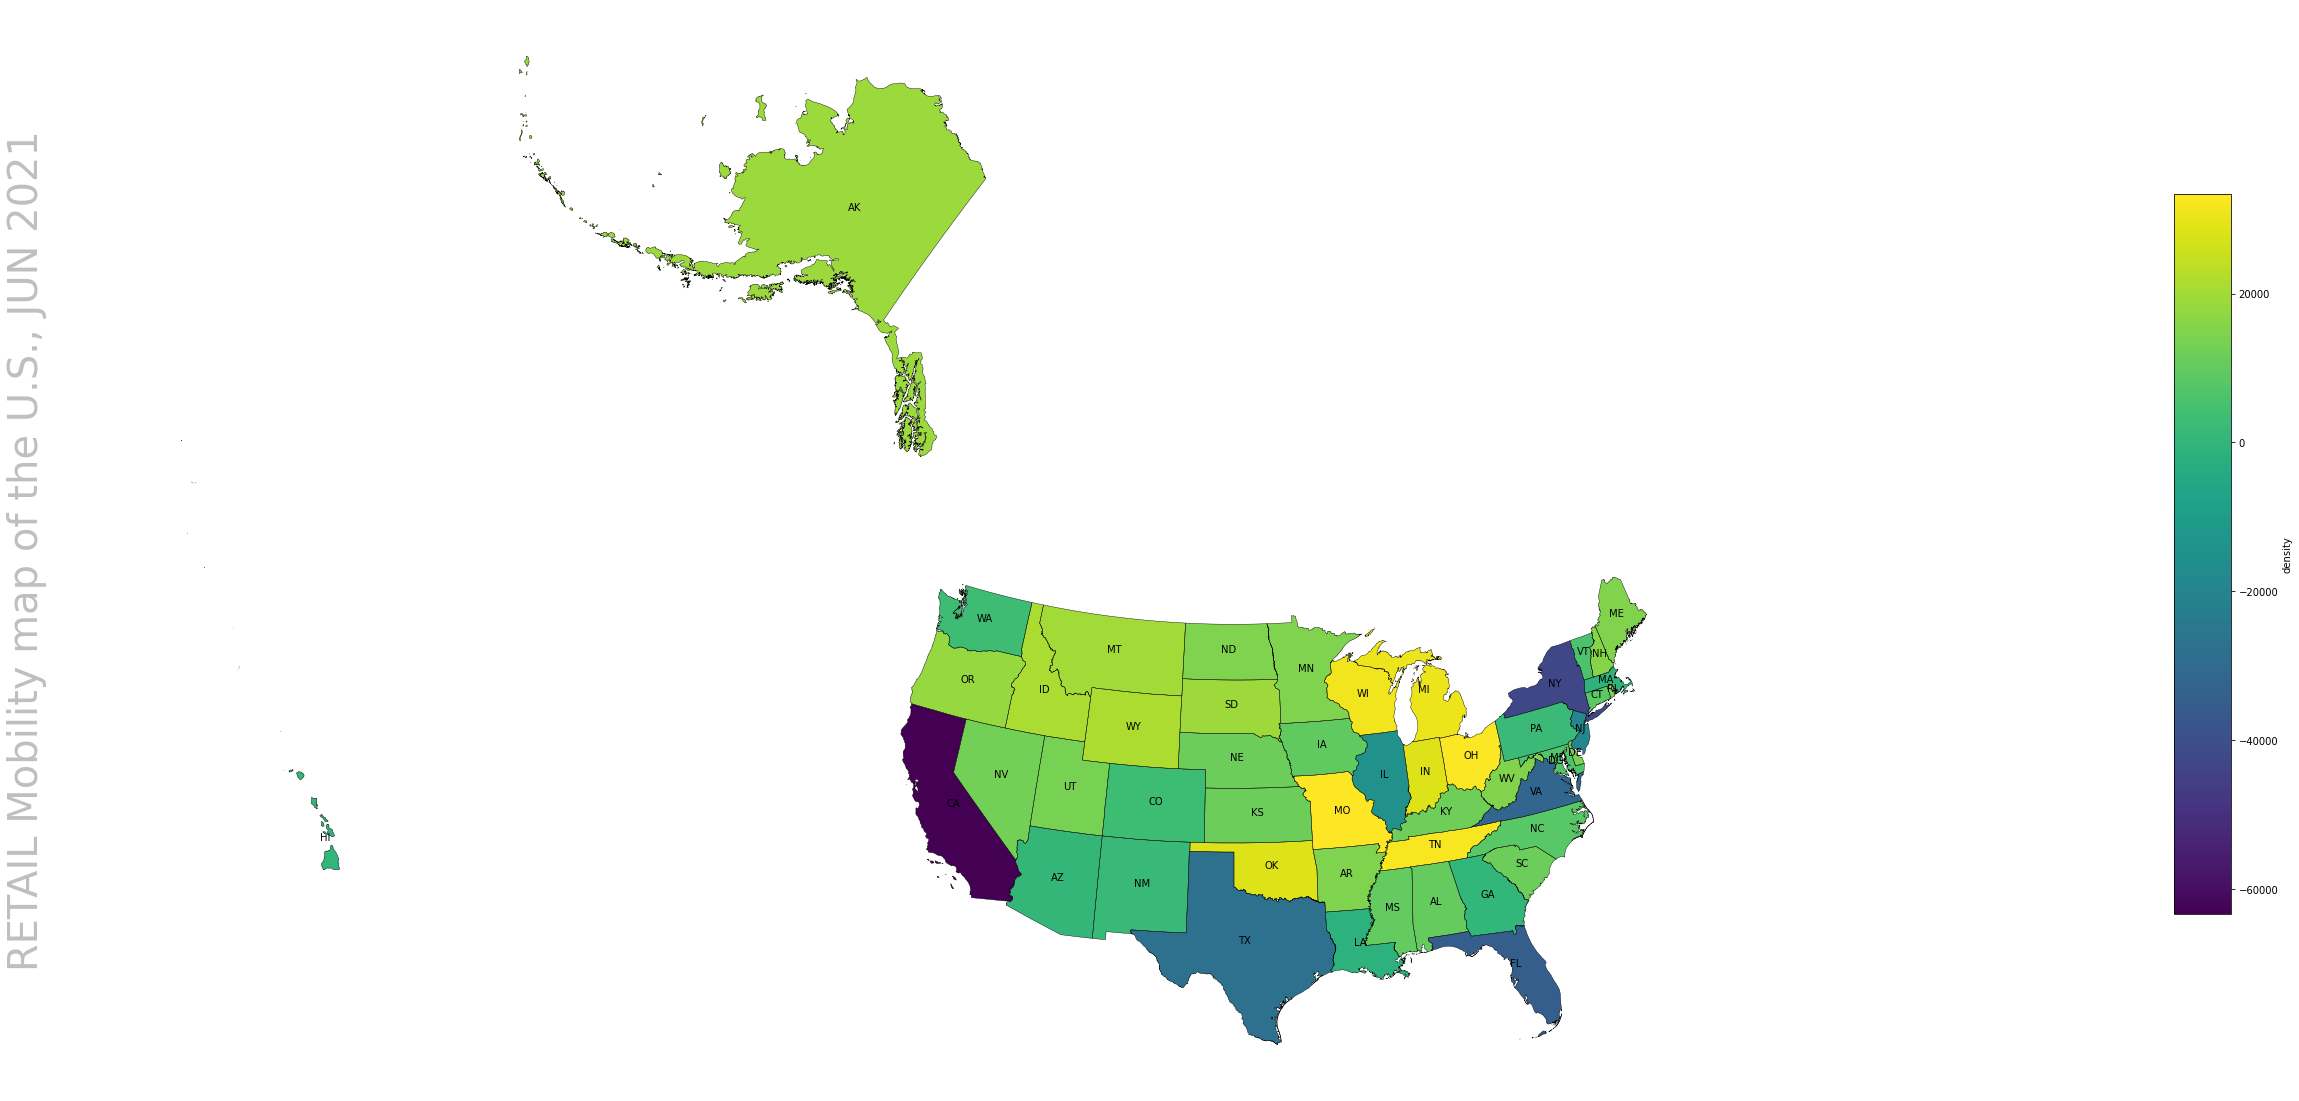

In [ ]:
fig = plt.figure(1, figsize=(40,20))
ax = fig.add_subplot()
##manipulate colorbar/legend (empty one)
# use this simple colormap
my_colormap = plt.cm.viridis #Reds # Pastel2 #works

fig = ax.get_figure()
cax = fig.add_axes([0.95, .25, 0.02, 0.5]) #[left,bottom,width,height][0.9, .25, 0.02, 0.5])
sm = plt.cm.ScalarMappable(
    cmap=my_colormap,
    norm=plt.Normalize(vmin=min_retail21,vmax=max_retail21)
    )

##clear the array of the scalar mappable
sm._A = []
cb = fig.colorbar(sm, cax=cax)
cb.set_label('density')
# manipulate the axis setttings
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

retail_6_21.apply(lambda x: ax.annotate(s=x.State_abr,# + "\n" + str(math.floor(x.ALAND / 2589988.1103)) + " sq mi",
                                      xy=x.geometry.centroid.coords[0],
                                      ha='center',
                                      fontsize=10),
                axis=1);

retail_6_21.boundary.plot(ax=ax, color='Black', linewidth=.4)
retail_6_21.plot(ax=ax, column='retail_and_recreation_percent_change_from_baseline', cmap='viridis', figsize=(12, 12));
ax.text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., JUN 2021', transform=ax.transAxes,
        fontsize=40, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

Text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., JUL 2021')

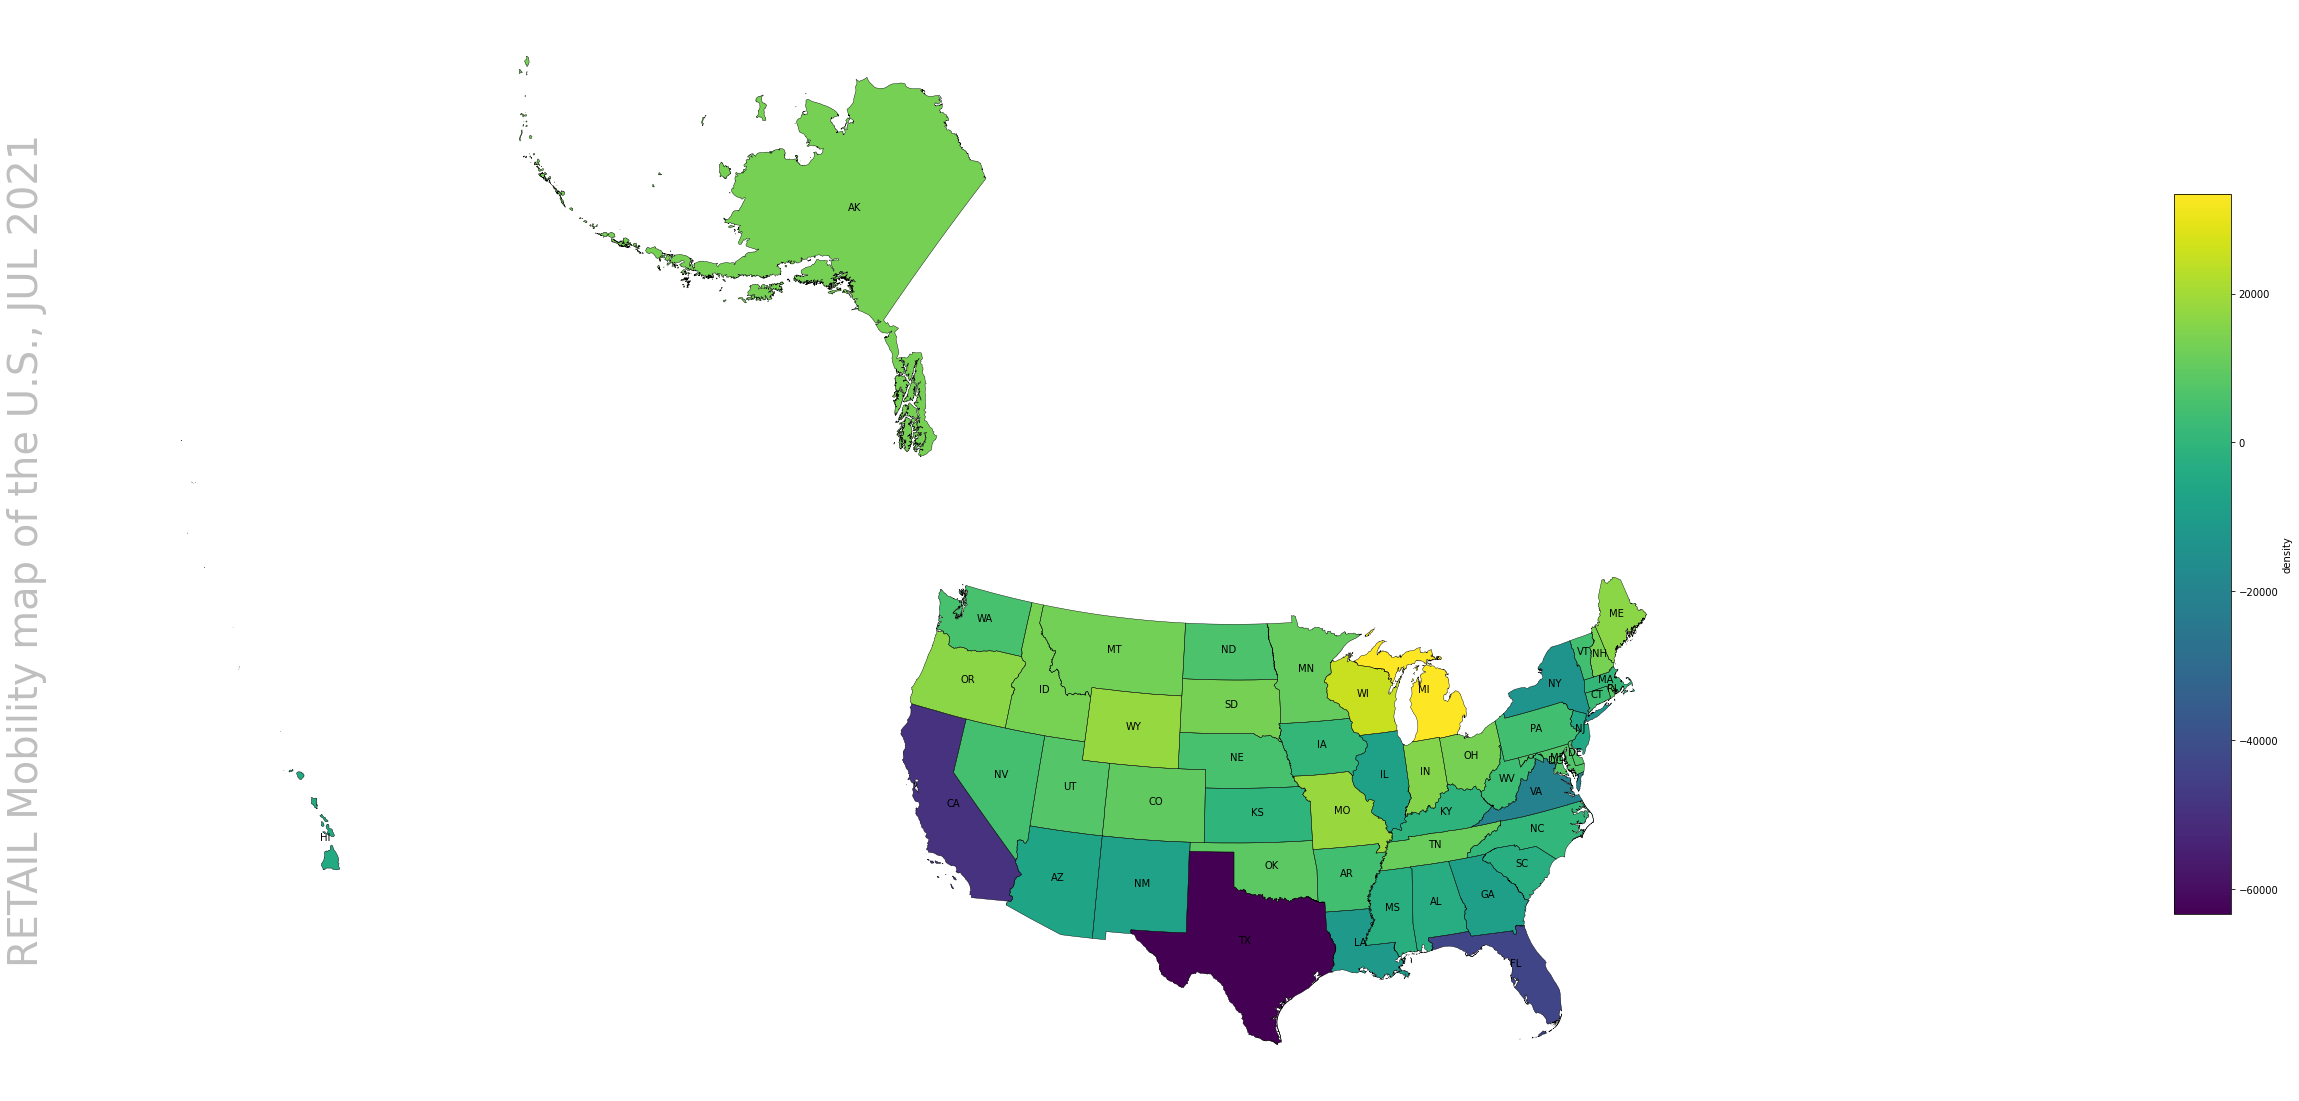

In [ ]:
fig = plt.figure(1, figsize=(40,20))
ax = fig.add_subplot()
##manipulate colorbar/legend (empty one)
# use this simple colormap
my_colormap = plt.cm.viridis #Reds # Pastel2 #works

fig = ax.get_figure()
cax = fig.add_axes([0.95, .25, 0.02, 0.5]) #[left,bottom,width,height][0.9, .25, 0.02, 0.5])
sm = plt.cm.ScalarMappable(
    cmap=my_colormap,
    norm=plt.Normalize(vmin=min_retail21,vmax=max_retail21)
    )

##clear the array of the scalar mappable
sm._A = []
cb = fig.colorbar(sm, cax=cax)
cb.set_label('density')
# manipulate the axis setttings
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

retail_7_21.apply(lambda x: ax.annotate(s=x.State_abr,# + "\n" + str(math.floor(x.ALAND / 2589988.1103)) + " sq mi",
                                      xy=x.geometry.centroid.coords[0],
                                      ha='center',
                                      fontsize=10),
                axis=1);

retail_7_21.boundary.plot(ax=ax, color='Black', linewidth=.4)
retail_7_21.plot(ax=ax, column='retail_and_recreation_percent_change_from_baseline', cmap='viridis', figsize=(12, 12));
ax.text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., JUL 2021', transform=ax.transAxes,
        fontsize=40, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

Text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., AUG 2021')

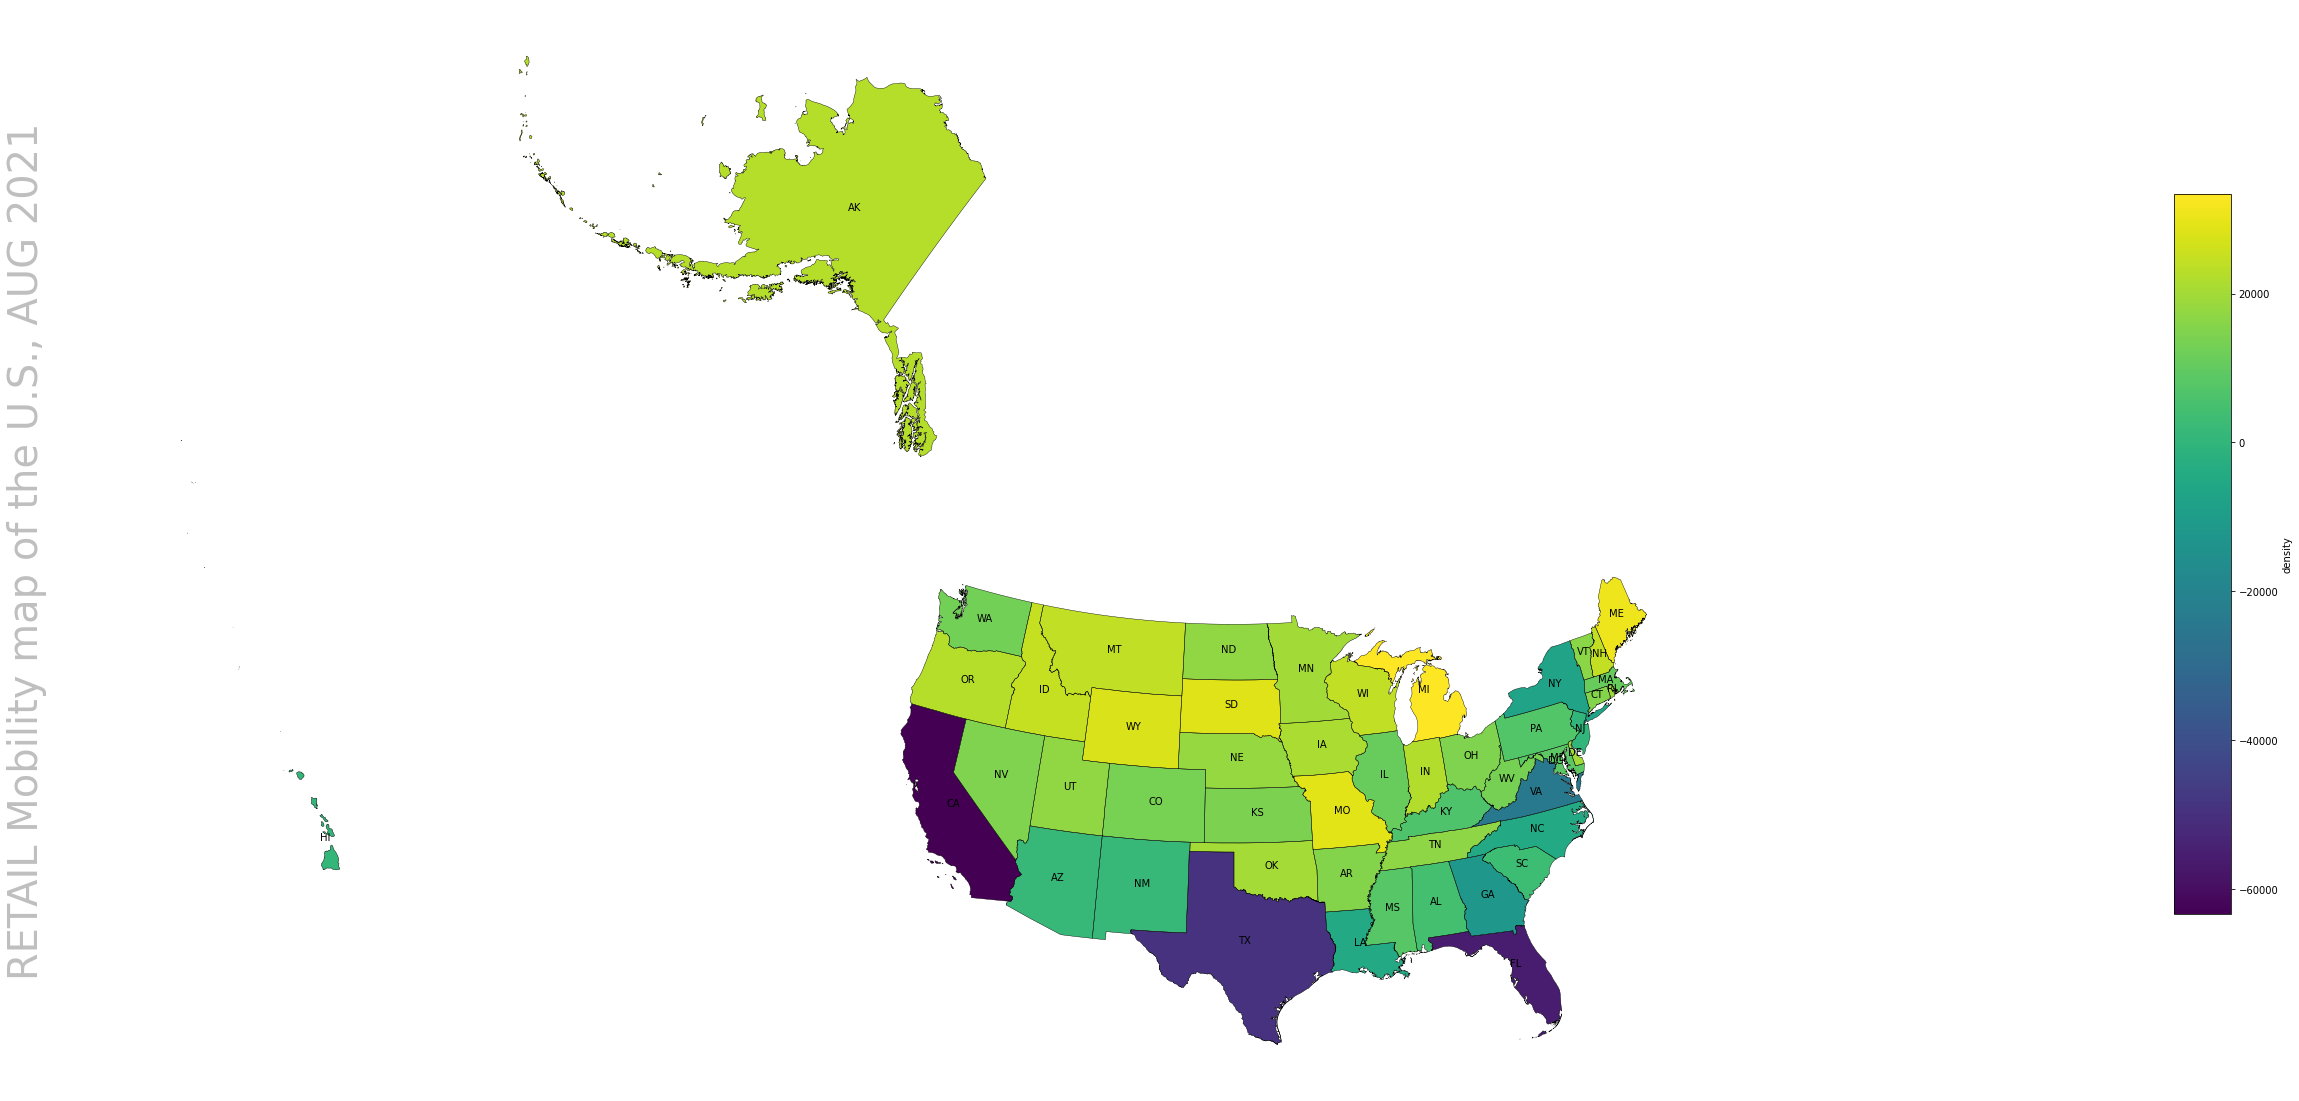

In [ ]:
fig = plt.figure(1, figsize=(40,20))
ax = fig.add_subplot()
##manipulate colorbar/legend (empty one)
# use this simple colormap
my_colormap = plt.cm.viridis #Reds # Pastel2 #works

fig = ax.get_figure()
cax = fig.add_axes([0.95, .25, 0.02, 0.5]) #[left,bottom,width,height][0.9, .25, 0.02, 0.5])
sm = plt.cm.ScalarMappable(
    cmap=my_colormap,
    norm=plt.Normalize(vmin=min_retail21,vmax=max_retail21)
    )

##clear the array of the scalar mappable
sm._A = []
cb = fig.colorbar(sm, cax=cax)
cb.set_label('density')
# manipulate the axis setttings
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

retail_8_21.apply(lambda x: ax.annotate(s=x.State_abr,# + "\n" + str(math.floor(x.ALAND / 2589988.1103)) + " sq mi",
                                      xy=x.geometry.centroid.coords[0],
                                      ha='center',
                                      fontsize=10),
                axis=1);

retail_8_21.boundary.plot(ax=ax, color='Black', linewidth=.4)
retail_8_21.plot(ax=ax, column='retail_and_recreation_percent_change_from_baseline', cmap='viridis', figsize=(12, 12));
ax.text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., AUG 2021', transform=ax.transAxes,
        fontsize=40, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

Text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., SEP 2021')

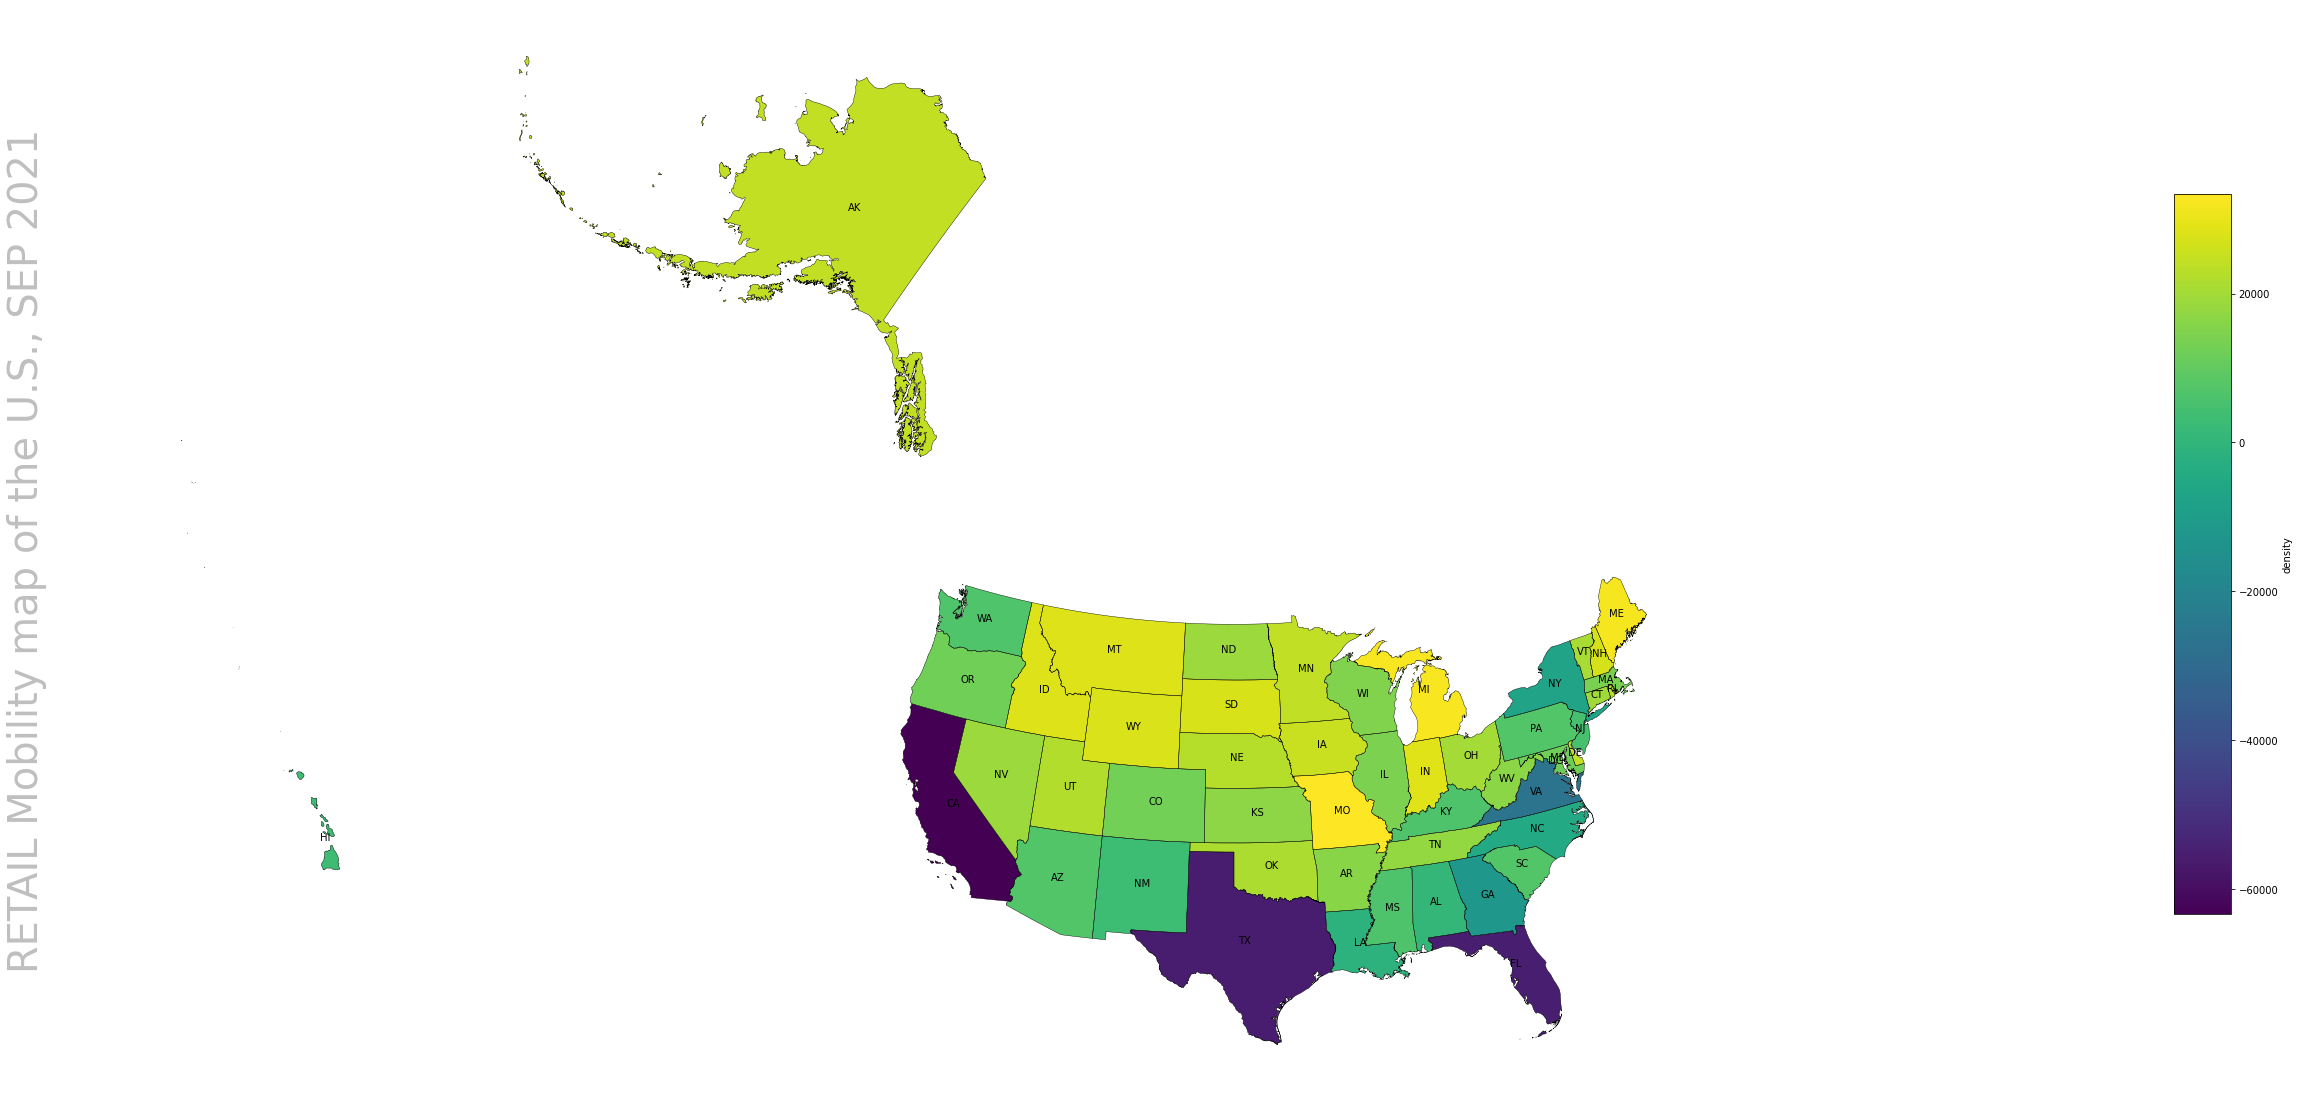

In [ ]:
fig = plt.figure(1, figsize=(40,20))
ax = fig.add_subplot()
##manipulate colorbar/legend (empty one)
# use this simple colormap
my_colormap = plt.cm.viridis #Reds # Pastel2 #works

fig = ax.get_figure()
cax = fig.add_axes([0.95, .25, 0.02, 0.5]) #[left,bottom,width,height][0.9, .25, 0.02, 0.5])
sm = plt.cm.ScalarMappable(
    cmap=my_colormap,
    norm=plt.Normalize(vmin=min_retail21,vmax=max_retail21)
    )

##clear the array of the scalar mappable
sm._A = []
cb = fig.colorbar(sm, cax=cax)
cb.set_label('density')
# manipulate the axis setttings
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

retail_9_21.apply(lambda x: ax.annotate(s=x.State_abr,# + "\n" + str(math.floor(x.ALAND / 2589988.1103)) + " sq mi",
                                      xy=x.geometry.centroid.coords[0],
                                      ha='center',
                                      fontsize=10),
                axis=1);

retail_9_21.boundary.plot(ax=ax, color='Black', linewidth=.4)
retail_9_21.plot(ax=ax, column='retail_and_recreation_percent_change_from_baseline', cmap='viridis', figsize=(12, 12));
ax.text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., SEP 2021', transform=ax.transAxes,
        fontsize=40, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

Text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., OCT 2021')

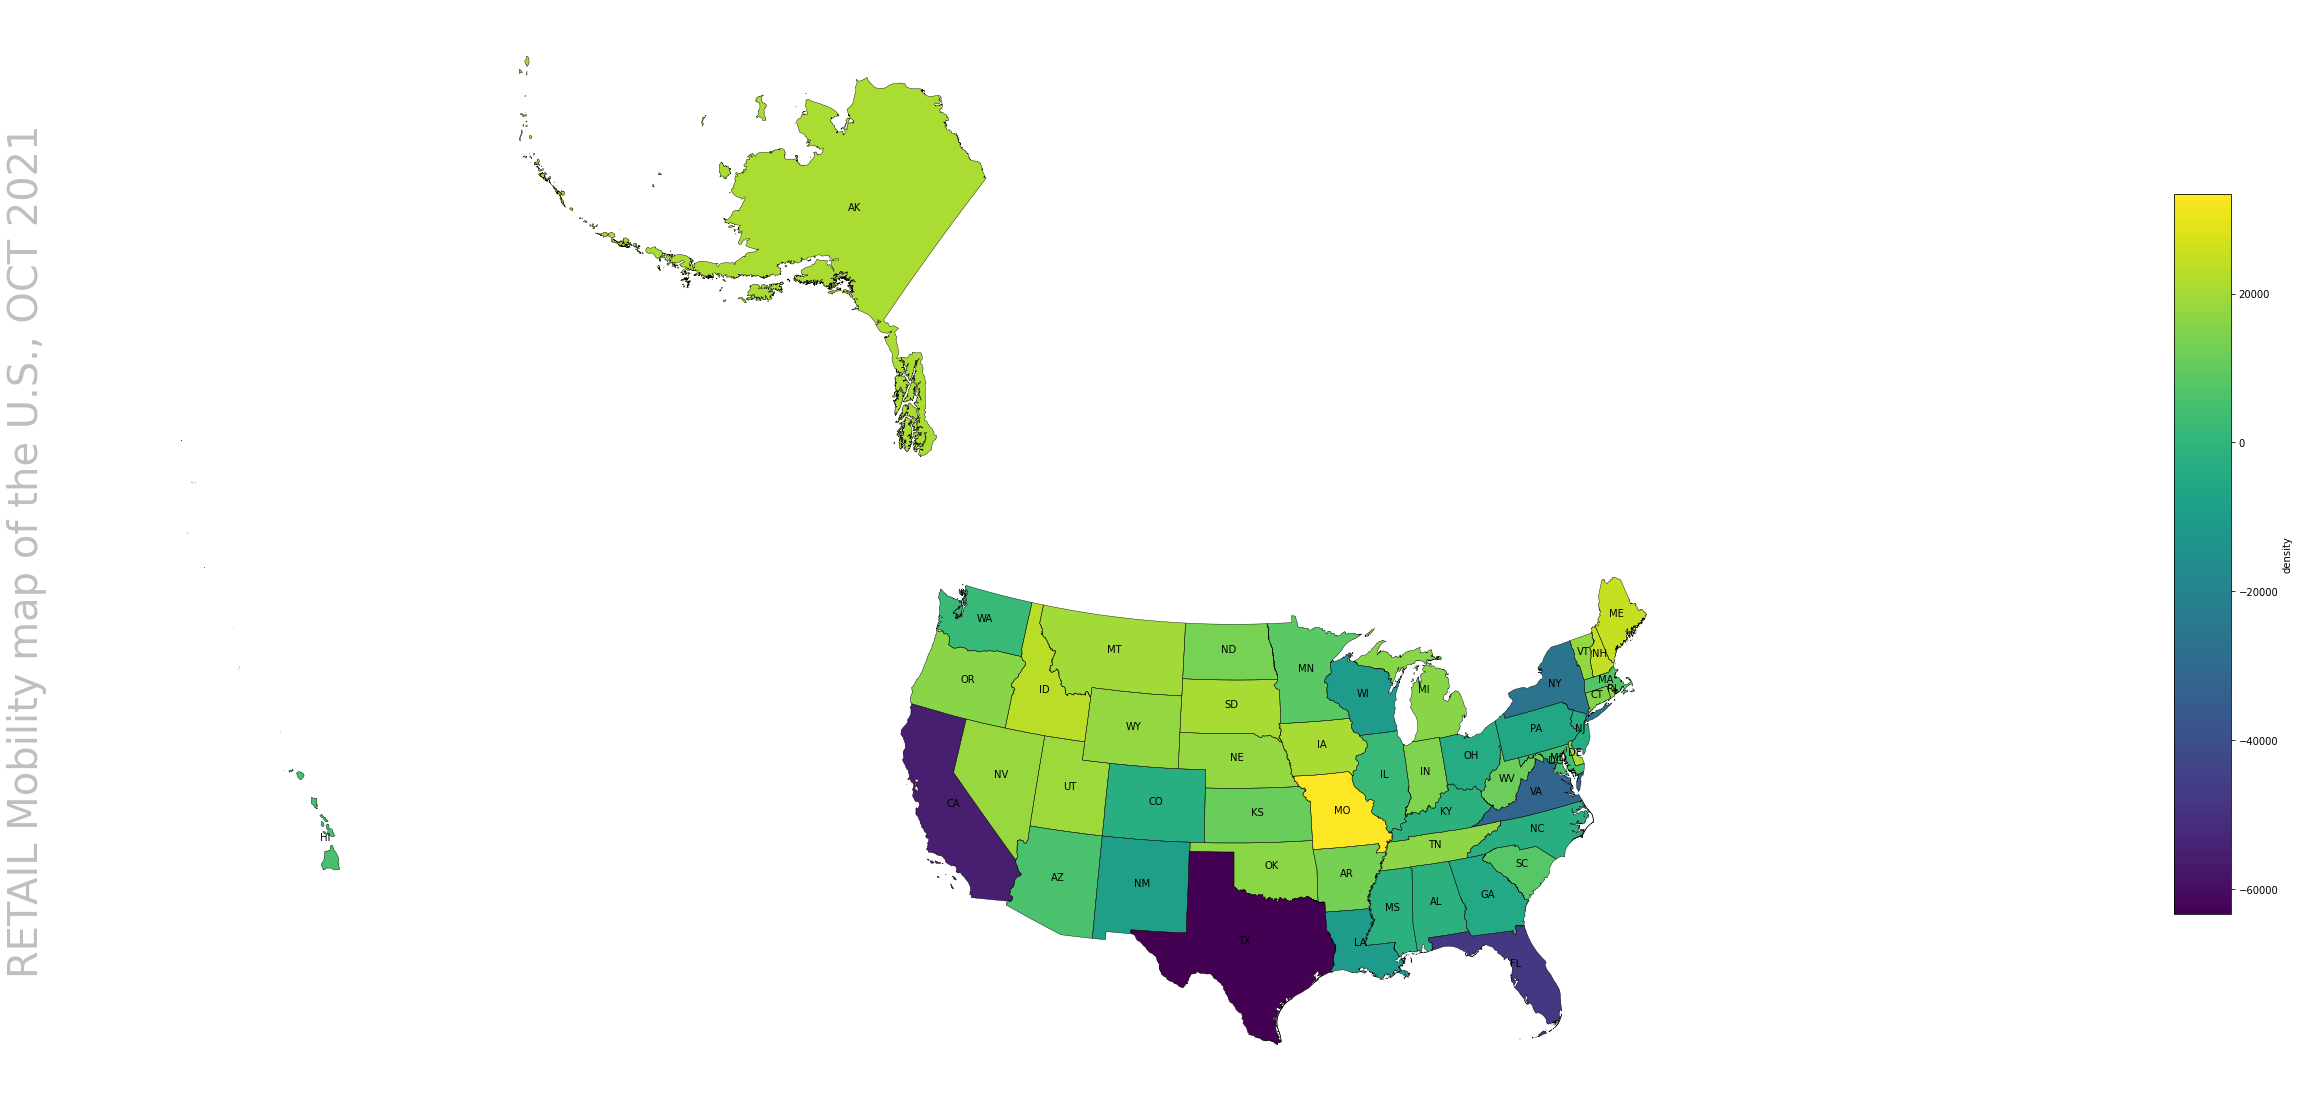

In [ ]:
fig = plt.figure(1, figsize=(40,20))
ax = fig.add_subplot()
##manipulate colorbar/legend (empty one)
# use this simple colormap
my_colormap = plt.cm.viridis #Reds # Pastel2 #works

fig = ax.get_figure()
cax = fig.add_axes([0.95, .25, 0.02, 0.5]) #[left,bottom,width,height][0.9, .25, 0.02, 0.5])
sm = plt.cm.ScalarMappable(
    cmap=my_colormap,
    norm=plt.Normalize(vmin=min_retail21,vmax=max_retail21)
    )

##clear the array of the scalar mappable
sm._A = []
cb = fig.colorbar(sm, cax=cax)
cb.set_label('density')
# manipulate the axis setttings
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

retail_10_21.apply(lambda x: ax.annotate(s=x.State_abr,# + "\n" + str(math.floor(x.ALAND / 2589988.1103)) + " sq mi",
                                      xy=x.geometry.centroid.coords[0],
                                      ha='center',
                                      fontsize=10),
                axis=1);

retail_10_21.boundary.plot(ax=ax, color='Black', linewidth=.4)
retail_10_21.plot(ax=ax, column='retail_and_recreation_percent_change_from_baseline', cmap='viridis', figsize=(12, 12));
ax.text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., OCT 2021', transform=ax.transAxes,
        fontsize=40, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

Text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., NOV 2021')

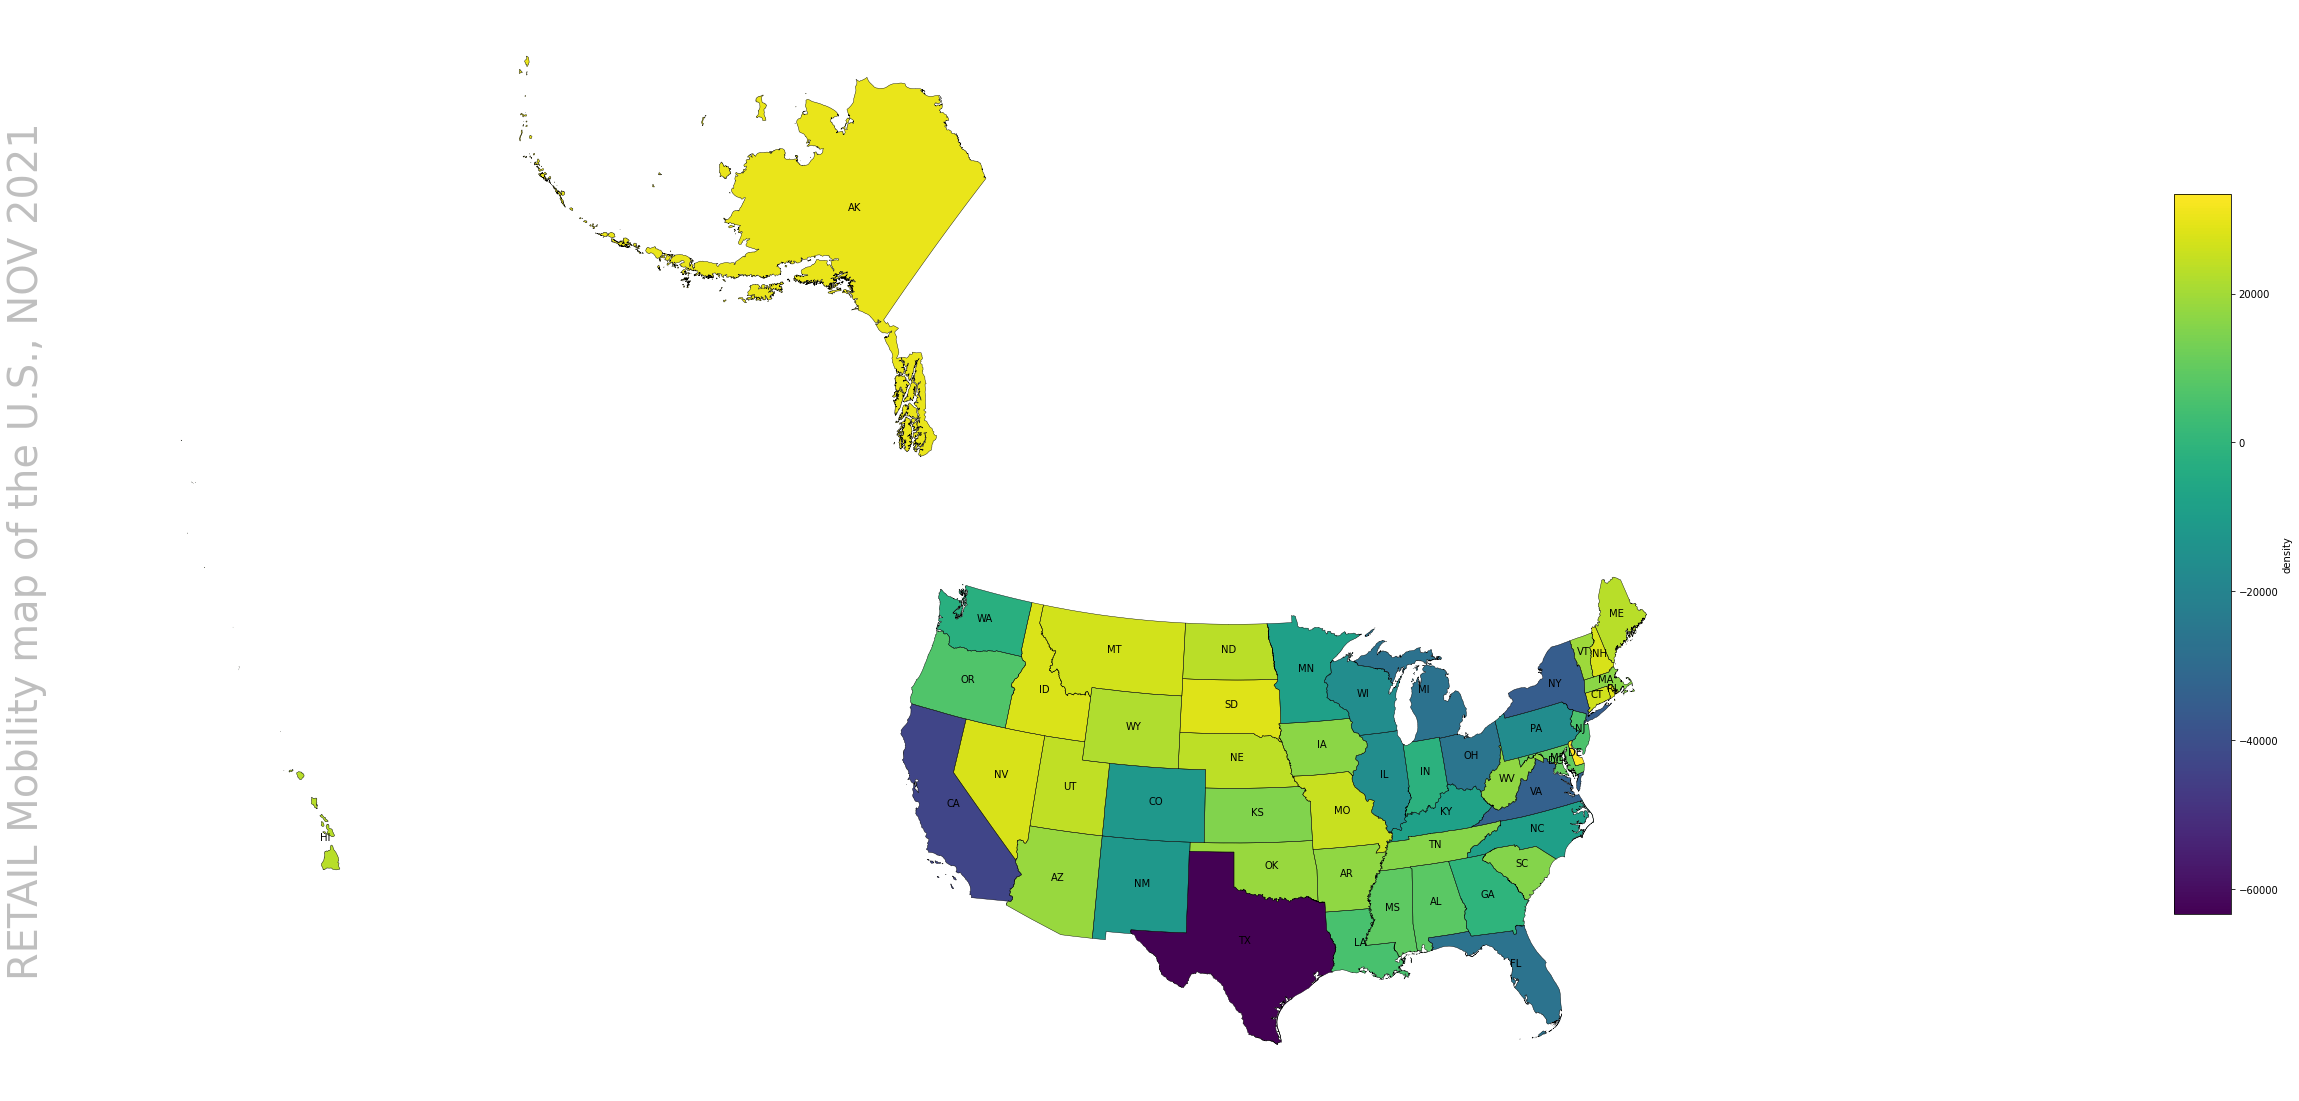

In [ ]:
fig = plt.figure(1, figsize=(40,20))
ax = fig.add_subplot()
##manipulate colorbar/legend (empty one)
# use this simple colormap
my_colormap = plt.cm.viridis #Reds # Pastel2 #works

fig = ax.get_figure()
cax = fig.add_axes([0.95, .25, 0.02, 0.5]) #[left,bottom,width,height][0.9, .25, 0.02, 0.5])
sm = plt.cm.ScalarMappable(
    cmap=my_colormap,
    norm=plt.Normalize(vmin=min_retail21,vmax=max_retail21)
    )

##clear the array of the scalar mappable
sm._A = []
cb = fig.colorbar(sm, cax=cax)
cb.set_label('density')
# manipulate the axis setttings
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

retail_11_21.apply(lambda x: ax.annotate(s=x.State_abr,# + "\n" + str(math.floor(x.ALAND / 2589988.1103)) + " sq mi",
                                      xy=x.geometry.centroid.coords[0],
                                      ha='center',
                                      fontsize=10),
                axis=1);

retail_11_21.boundary.plot(ax=ax, color='Black', linewidth=.4)
retail_11_21.plot(ax=ax, column='retail_and_recreation_percent_change_from_baseline', cmap='viridis', figsize=(12, 12));
ax.text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., NOV 2021', transform=ax.transAxes,
        fontsize=40, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

Text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., DEC 2021')

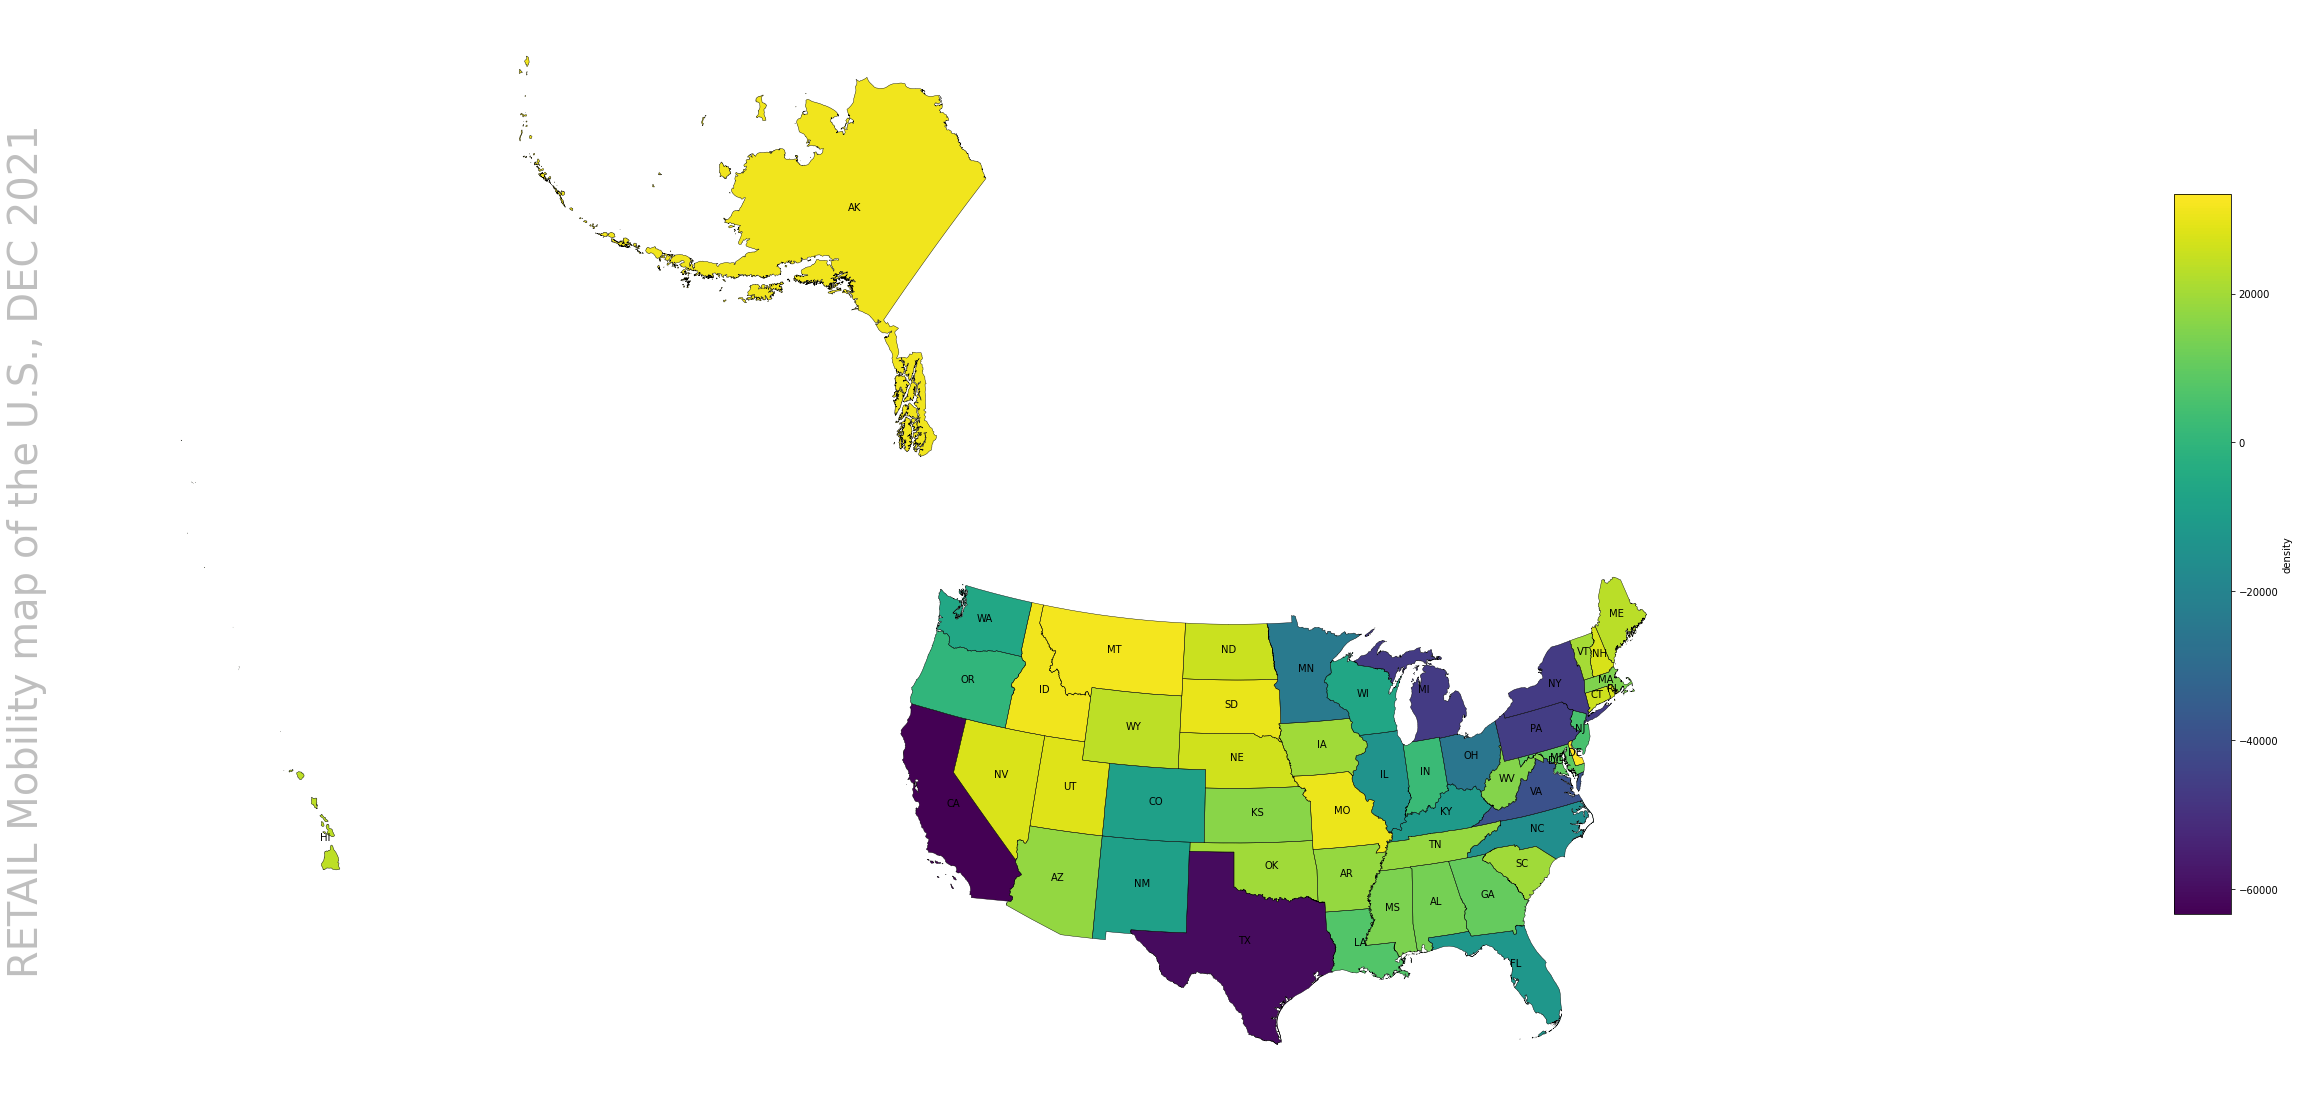

In [ ]:
fig = plt.figure(1, figsize=(40,20))
ax = fig.add_subplot()
##manipulate colorbar/legend (empty one)
# use this simple colormap
my_colormap = plt.cm.viridis #Reds # Pastel2 #works

fig = ax.get_figure()
cax = fig.add_axes([0.95, .25, 0.02, 0.5]) #[left,bottom,width,height][0.9, .25, 0.02, 0.5])
sm = plt.cm.ScalarMappable(
    cmap=my_colormap,
    norm=plt.Normalize(vmin=min_retail21,vmax=max_retail21)
    )

##clear the array of the scalar mappable
sm._A = []
cb = fig.colorbar(sm, cax=cax)
cb.set_label('density')
# manipulate the axis setttings
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

retail_12_21.apply(lambda x: ax.annotate(s=x.State_abr,# + "\n" + str(math.floor(x.ALAND / 2589988.1103)) + " sq mi",
                                      xy=x.geometry.centroid.coords[0],
                                      ha='center',
                                      fontsize=10),
                axis=1);

retail_12_21.boundary.plot(ax=ax, color='Black', linewidth=.4)
retail_12_21.plot(ax=ax, column='retail_and_recreation_percent_change_from_baseline', cmap='viridis', figsize=(12, 12));
ax.text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., DEC 2021', transform=ax.transAxes,
        fontsize=40, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

Text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., JAN 2022')

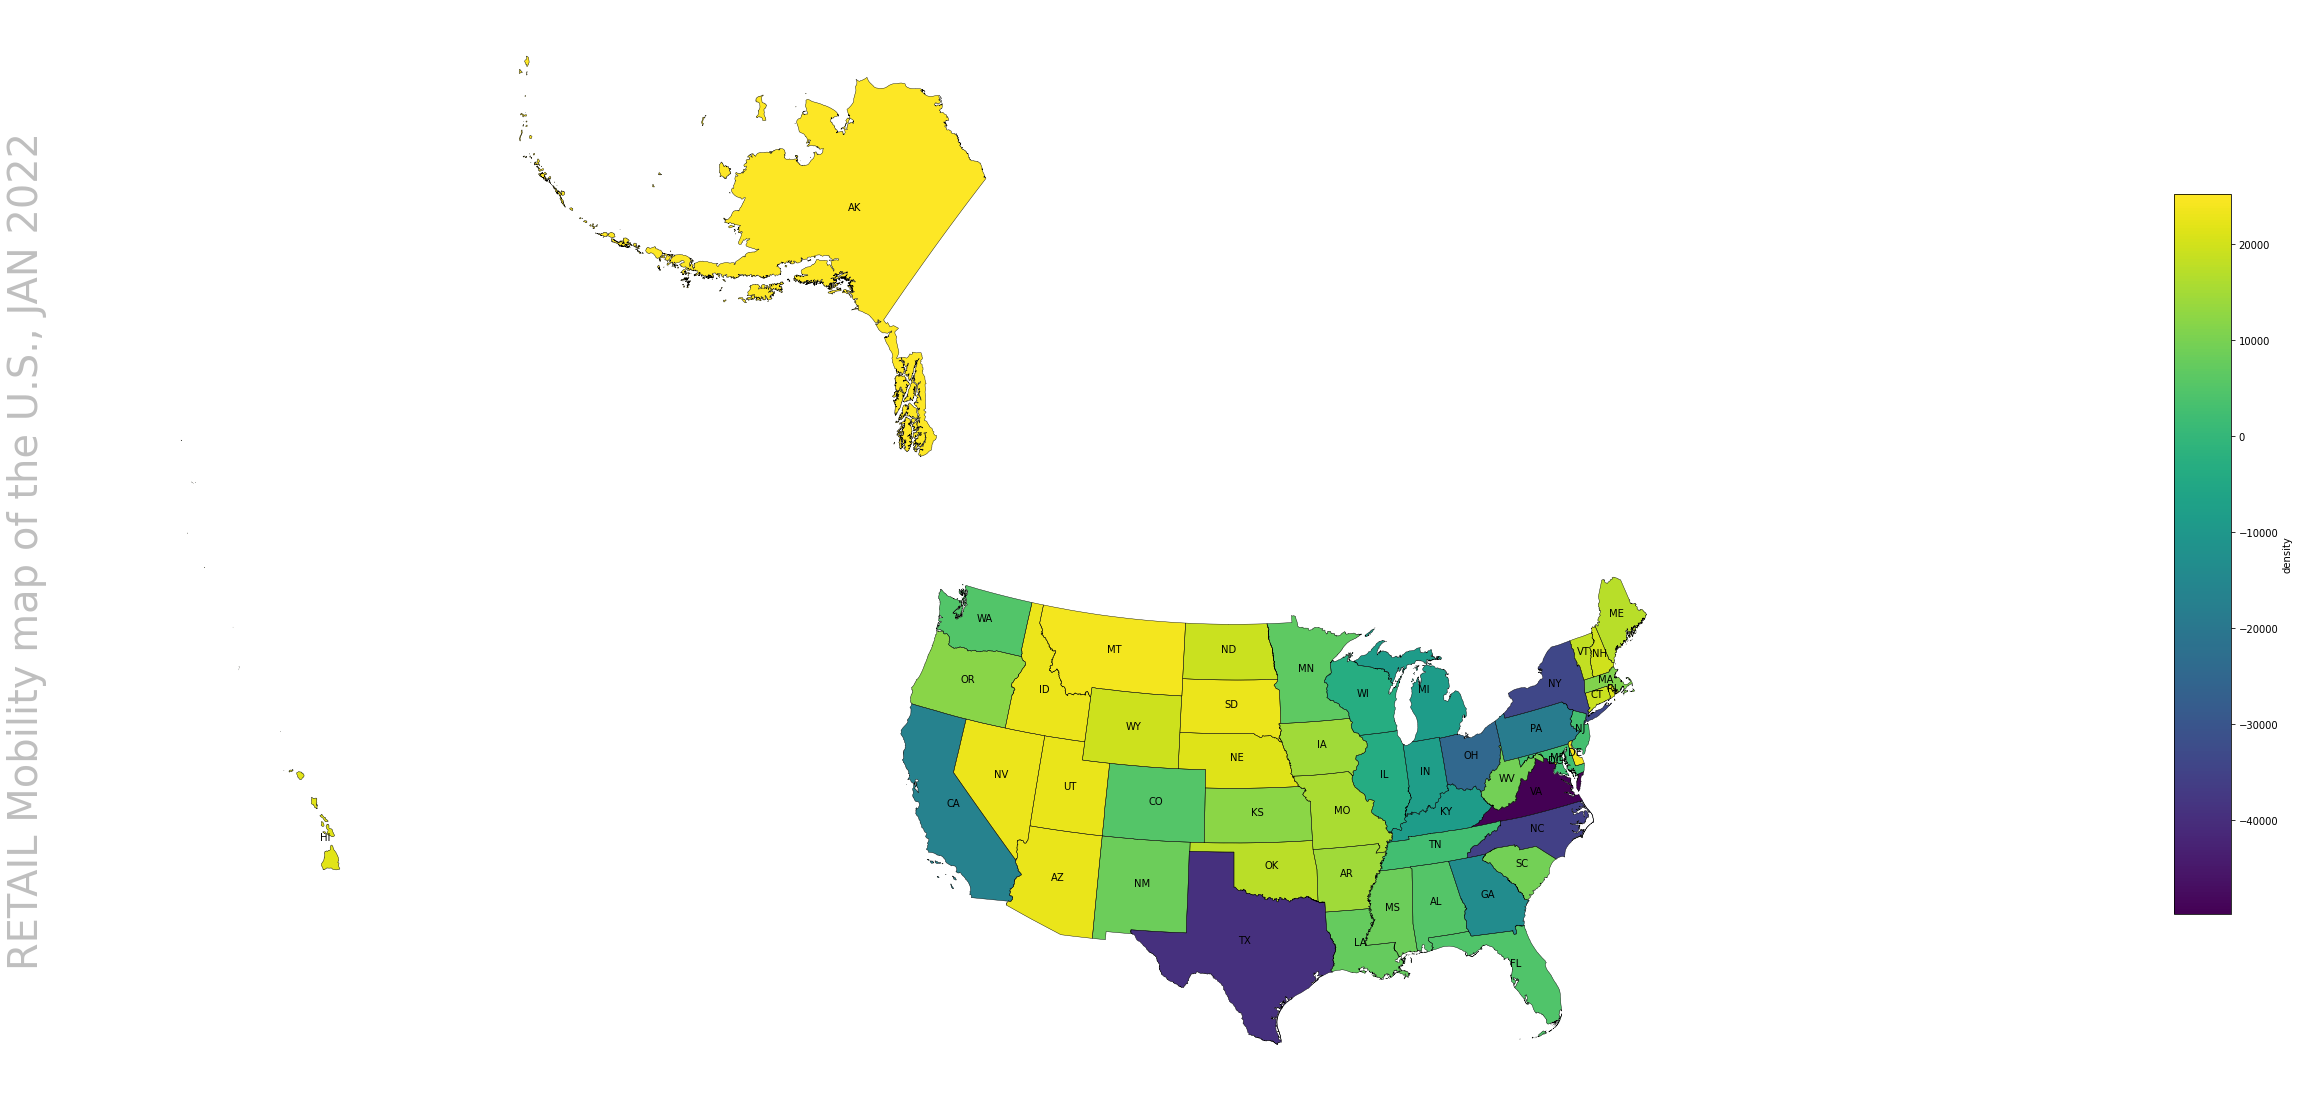

In [ ]:
fig = plt.figure(1, figsize=(40,20))
ax = fig.add_subplot()
##manipulate colorbar/legend (empty one)
# use this simple colormap
my_colormap = plt.cm.viridis #Reds # Pastel2 #works

fig = ax.get_figure()
cax = fig.add_axes([0.95, .25, 0.02, 0.5]) #[left,bottom,width,height][0.9, .25, 0.02, 0.5])
sm = plt.cm.ScalarMappable(
    cmap=my_colormap,
    norm=plt.Normalize(vmin=min_retail22,vmax=max_retail22)
    )

##clear the array of the scalar mappable
sm._A = []
cb = fig.colorbar(sm, cax=cax)
cb.set_label('density')
# manipulate the axis setttings
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

retail_1_22.apply(lambda x: ax.annotate(s=x.State_abr,# + "\n" + str(math.floor(x.ALAND / 2589988.1103)) + " sq mi",
                                      xy=x.geometry.centroid.coords[0],
                                      ha='center',
                                      fontsize=10),
                axis=1);

retail_1_22.boundary.plot(ax=ax, color='Black', linewidth=.4)
retail_1_22.plot(ax=ax, column='retail_and_recreation_percent_change_from_baseline', cmap='viridis', figsize=(12, 12));
ax.text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., JAN 2022', transform=ax.transAxes,
        fontsize=40, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

Text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., FEB 2022')

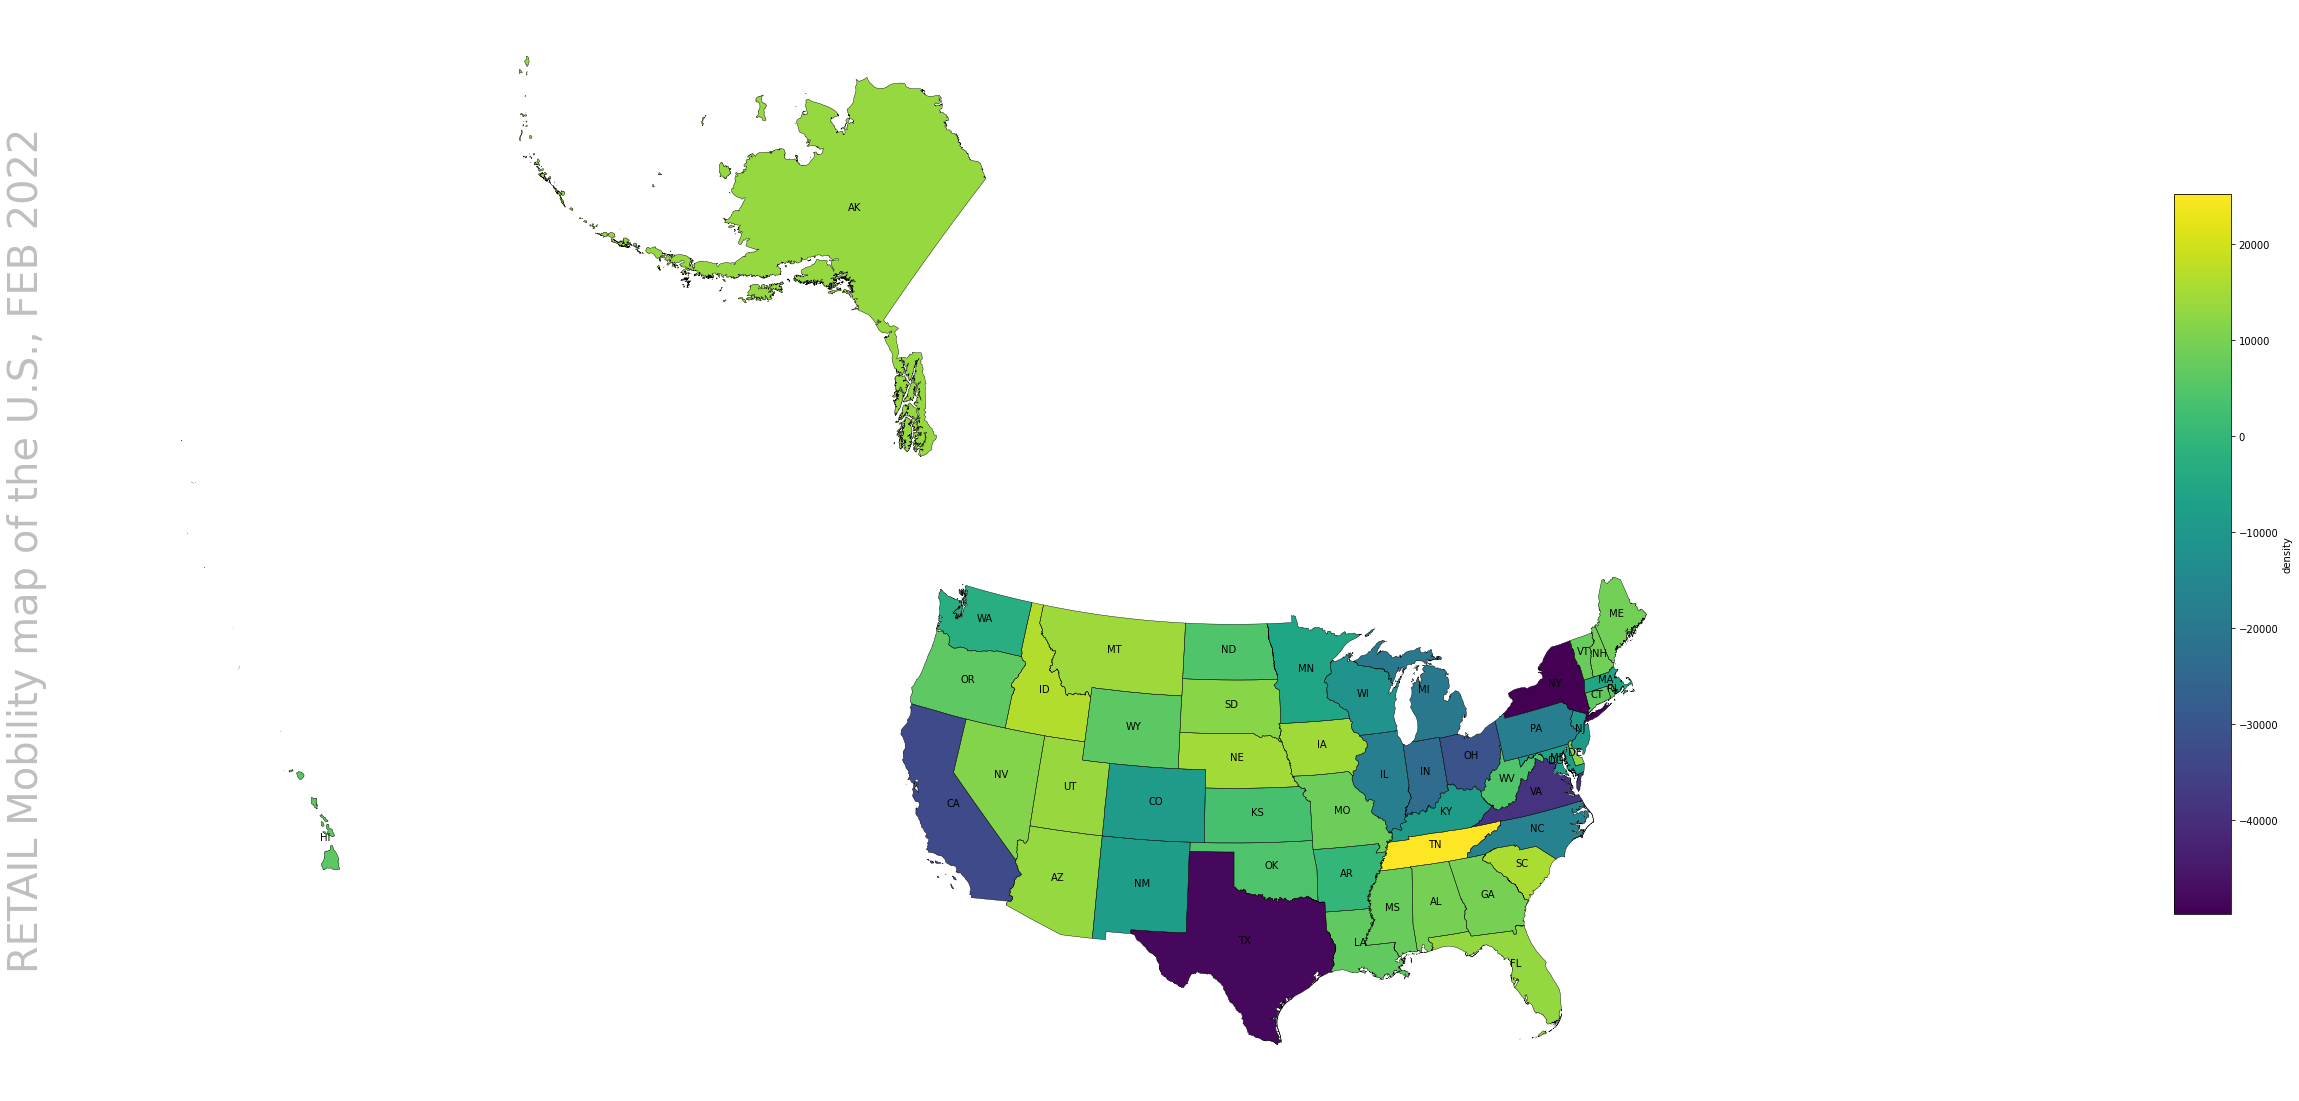

In [ ]:
fig = plt.figure(1, figsize=(40,20))
ax = fig.add_subplot()
##manipulate colorbar/legend (empty one)
# use this simple colormap
my_colormap = plt.cm.viridis #Reds # Pastel2 #works
# df = retail_2.copy()
# min_retail = min(df["retail_and_recreation_percent_change_from_baseline"])
# max_retail = max(df["retail_and_recreation_percent_change_from_baseline"])

fig = ax.get_figure()
cax = fig.add_axes([0.95, .25, 0.02, 0.5]) #[left,bottom,width,height][0.9, .25, 0.02, 0.5])
sm = plt.cm.ScalarMappable(
    cmap=my_colormap,
    norm=plt.Normalize(vmin=min_retail22,vmax=max_retail22)
    )

##clear the array of the scalar mappable
sm._A = []
cb = fig.colorbar(sm, cax=cax)
cb.set_label('density')
# manipulate the axis setttings
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

retail_2_22.apply(lambda x: ax.annotate(s=x.State_abr,# + "\n" + str(math.floor(x.ALAND / 2589988.1103)) + " sq mi",
                                      xy=x.geometry.centroid.coords[0],
                                      ha='center',
                                      fontsize=10),
                axis=1);

retail_2_22.boundary.plot(ax=ax, color='Black', linewidth=.4)
retail_2_22.plot(ax=ax, column='retail_and_recreation_percent_change_from_baseline', cmap='viridis', figsize=(12, 12));
ax.text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., FEB 2022', transform=ax.transAxes,
        fontsize=40, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

Text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., MAR 2022')

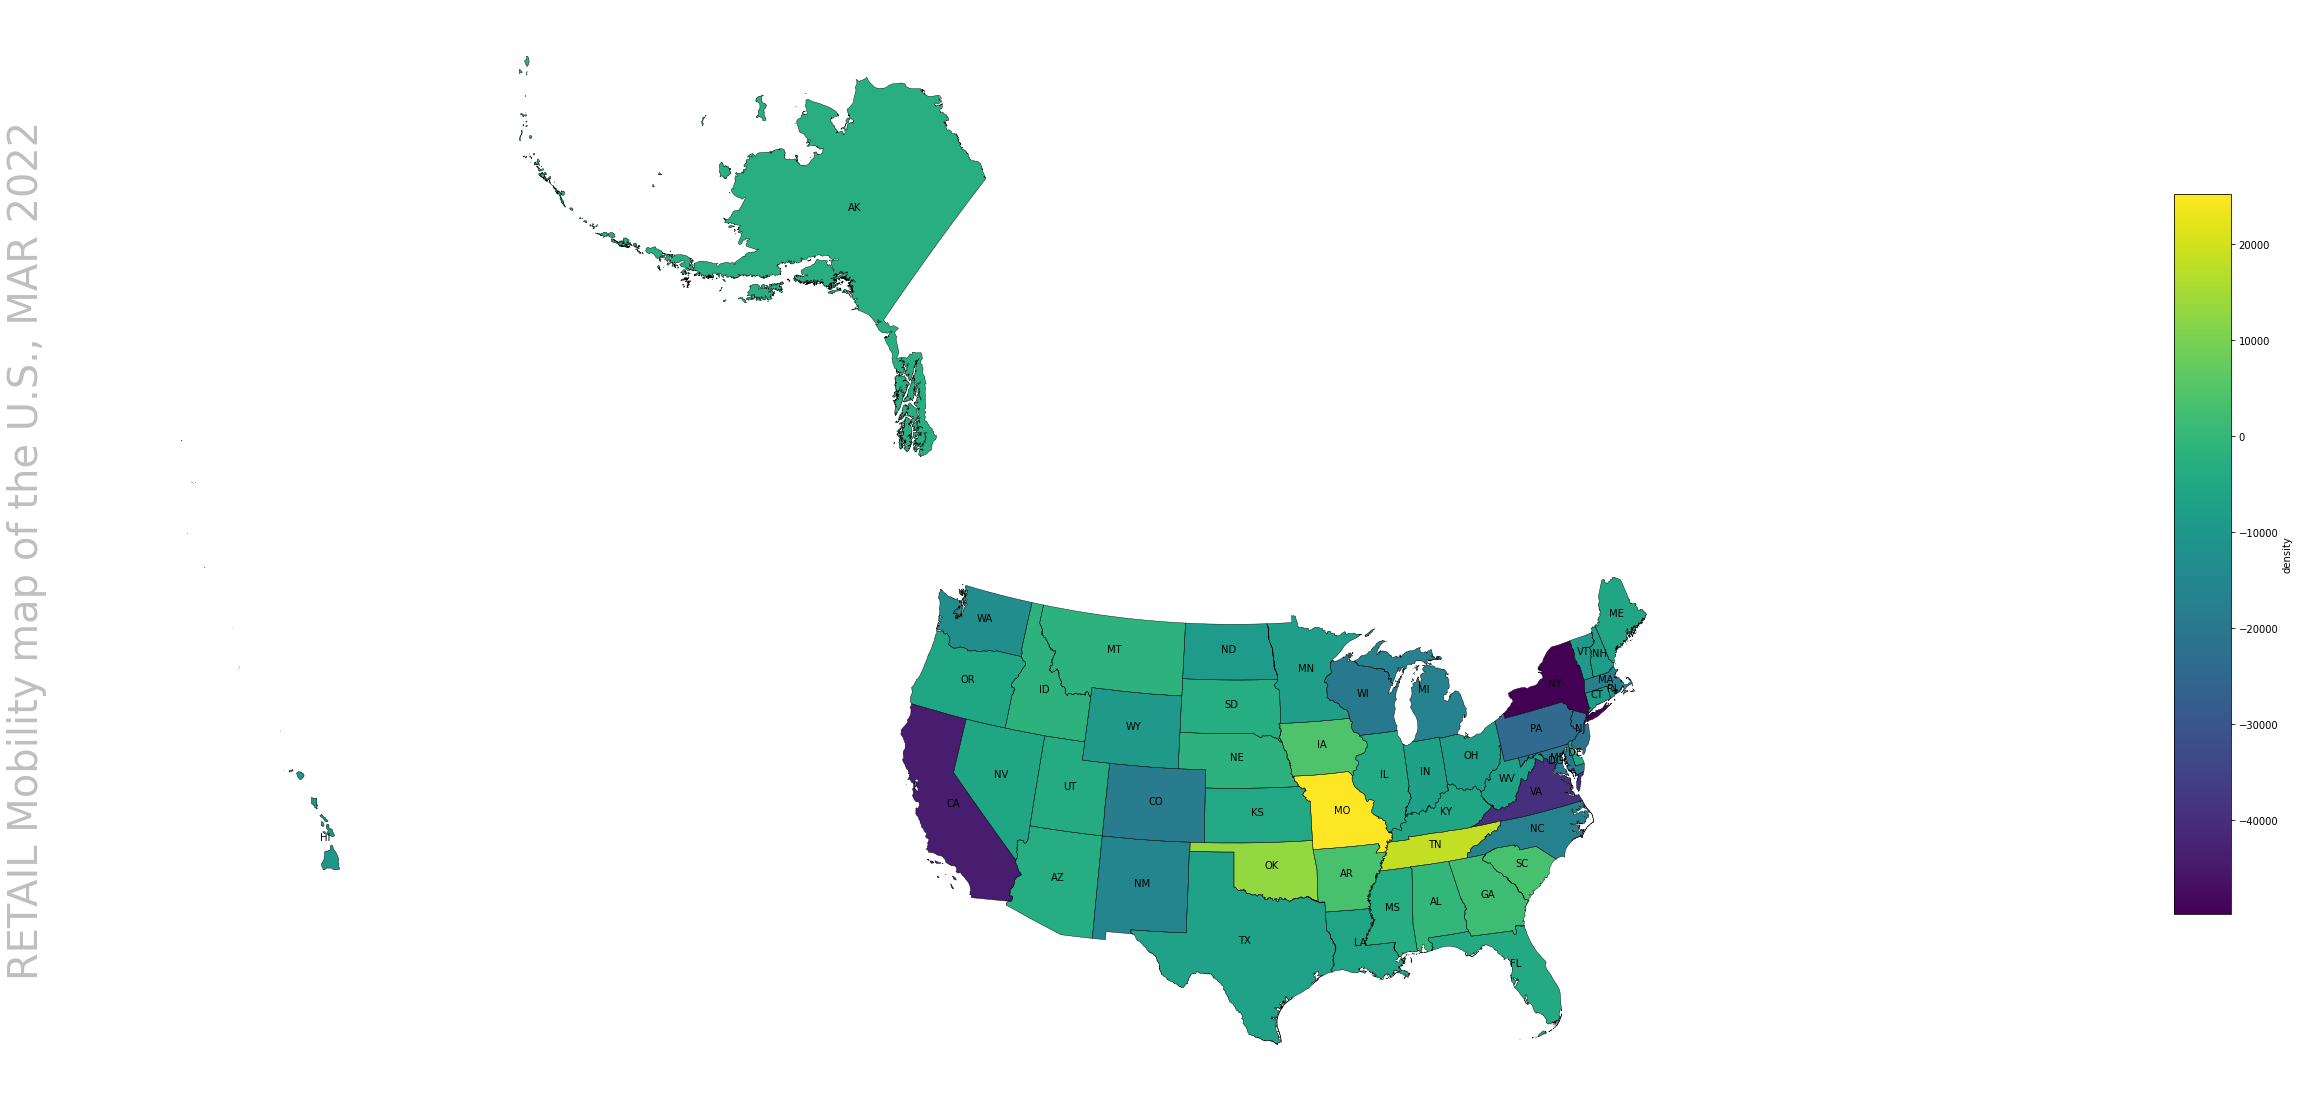

In [ ]:
fig = plt.figure(1, figsize=(40,20))
ax = fig.add_subplot()
##manipulate colorbar/legend (empty one)
# use this simple colormap
my_colormap = plt.cm.viridis #Reds # Pastel2 #works

fig = ax.get_figure()
cax = fig.add_axes([0.95, .25, 0.02, 0.5]) #[left,bottom,width,height][0.9, .25, 0.02, 0.5])
sm = plt.cm.ScalarMappable(
    cmap=my_colormap,
    norm=plt.Normalize(vmin=min_retail22,vmax=max_retail22)
    )

##clear the array of the scalar mappable
sm._A = []
cb = fig.colorbar(sm, cax=cax)
cb.set_label('density')
# manipulate the axis setttings
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

retail_3_22.apply(lambda x: ax.annotate(s=x.State_abr,# + "\n" + str(math.floor(x.ALAND / 2589988.1103)) + " sq mi",
                                      xy=x.geometry.centroid.coords[0],
                                      ha='center',
                                      fontsize=10),
                axis=1);

retail_3_22.boundary.plot(ax=ax, color='Black', linewidth=.4)
retail_3_22.plot(ax=ax, column='retail_and_recreation_percent_change_from_baseline', cmap='viridis', figsize=(12, 12));
ax.text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., MAR 2022', transform=ax.transAxes,
        fontsize=40, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

Text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., APR 2022')

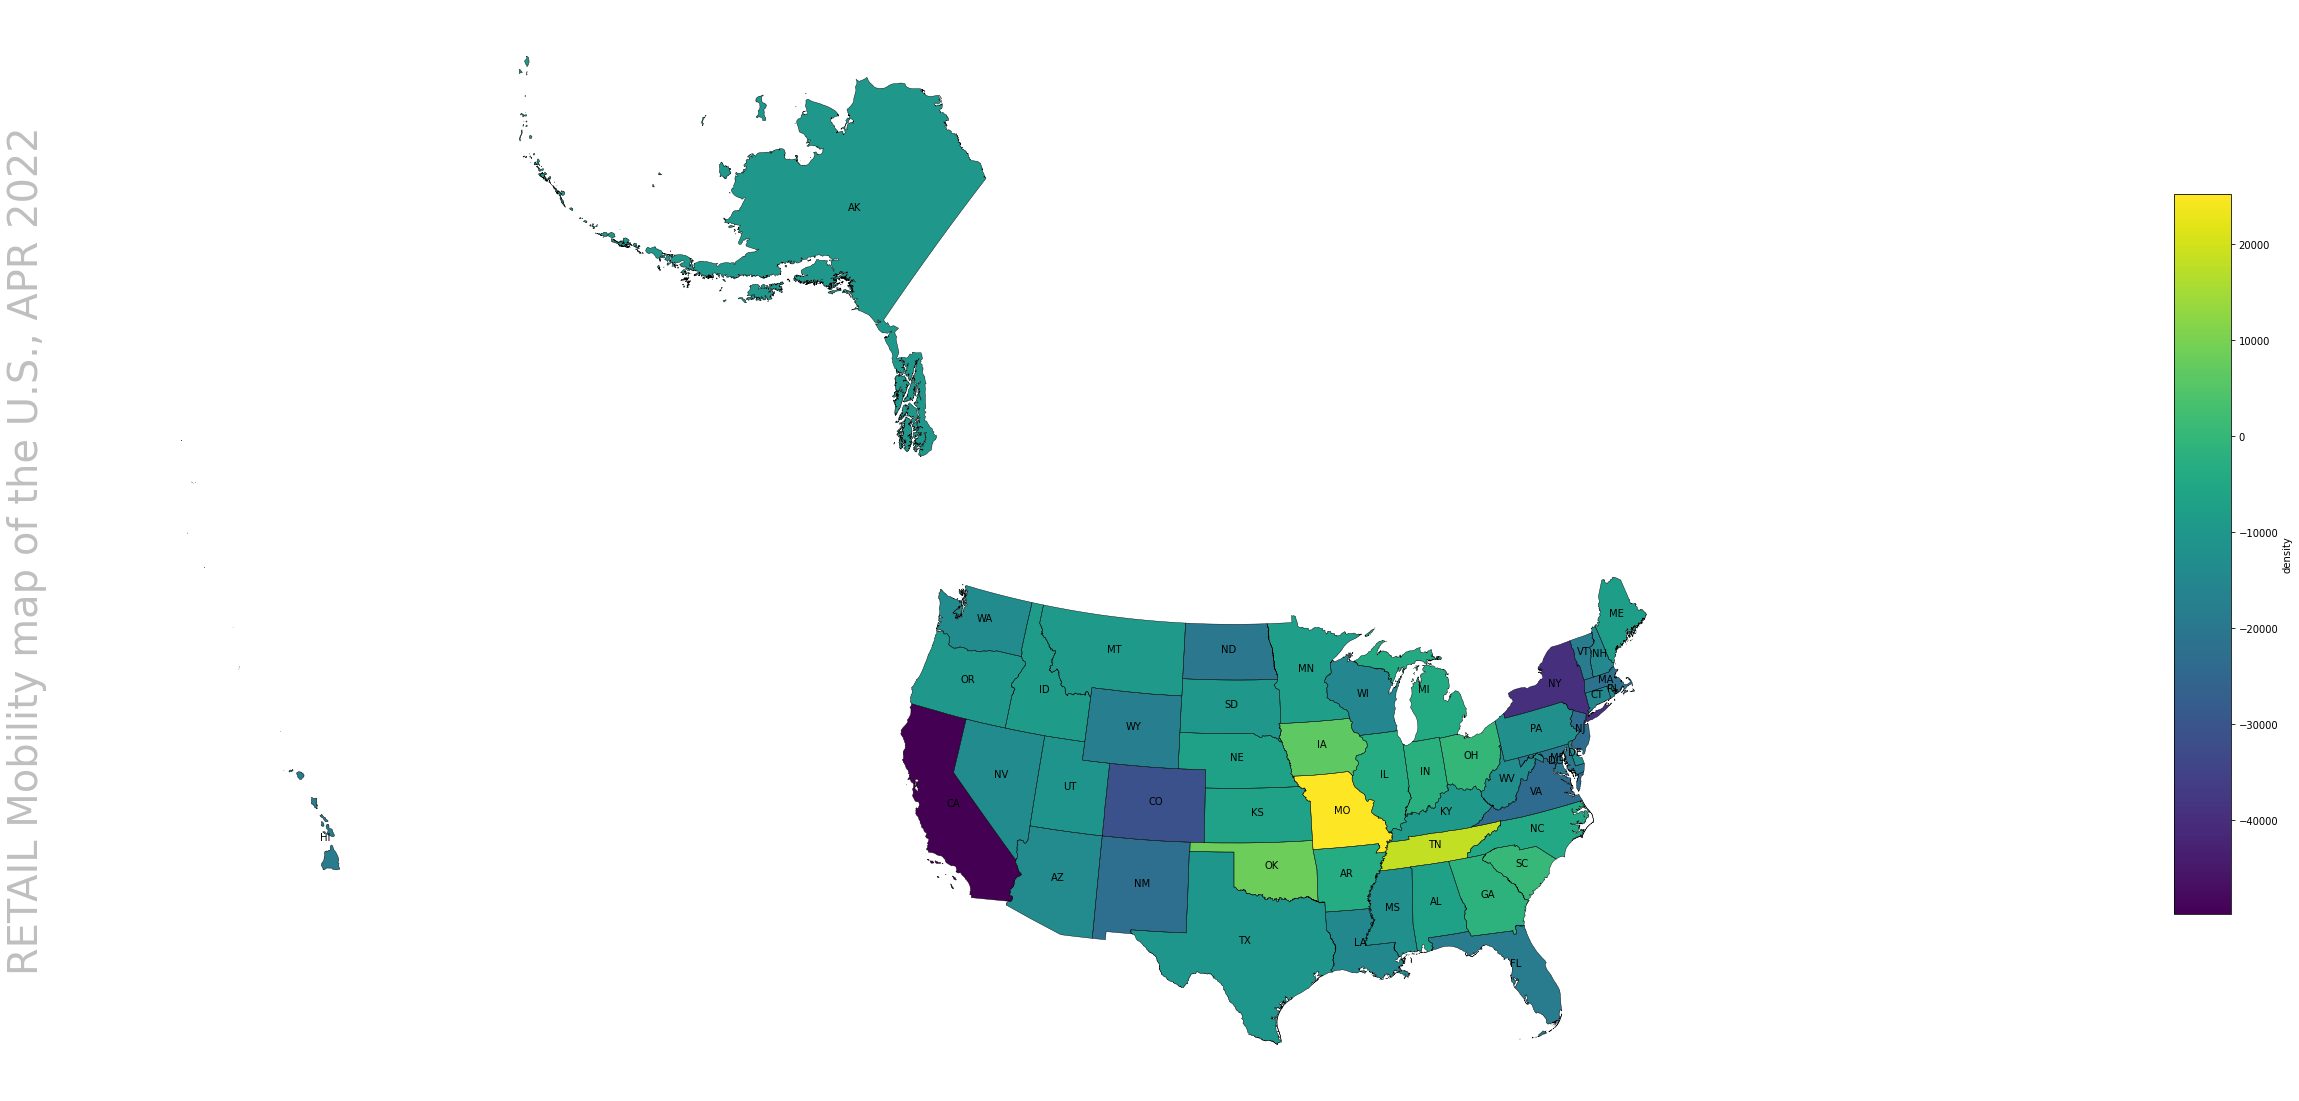

In [ ]:
fig = plt.figure(1, figsize=(40,20))
ax = fig.add_subplot()
##manipulate colorbar/legend (empty one)
# use this simple colormap
my_colormap = plt.cm.viridis #Reds # Pastel2 #works

fig = ax.get_figure()
cax = fig.add_axes([0.95, .25, 0.02, 0.5]) #[left,bottom,width,height][0.9, .25, 0.02, 0.5])
sm = plt.cm.ScalarMappable(
    cmap=my_colormap,
    norm=plt.Normalize(vmin=min_retail22,vmax=max_retail22)
    )

##clear the array of the scalar mappable
sm._A = []
cb = fig.colorbar(sm, cax=cax)
cb.set_label('density')
# manipulate the axis setttings
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

retail_4_22.apply(lambda x: ax.annotate(s=x.State_abr,# + "\n" + str(math.floor(x.ALAND / 2589988.1103)) + " sq mi",
                                      xy=x.geometry.centroid.coords[0],
                                      ha='center',
                                      fontsize=10),
                axis=1);

retail_4_22.boundary.plot(ax=ax, color='Black', linewidth=.4)
retail_4_22.plot(ax=ax, column='retail_and_recreation_percent_change_from_baseline', cmap='viridis', figsize=(12, 12));
ax.text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., APR 2022', transform=ax.transAxes,
        fontsize=40, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

Text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., MAY 2022')

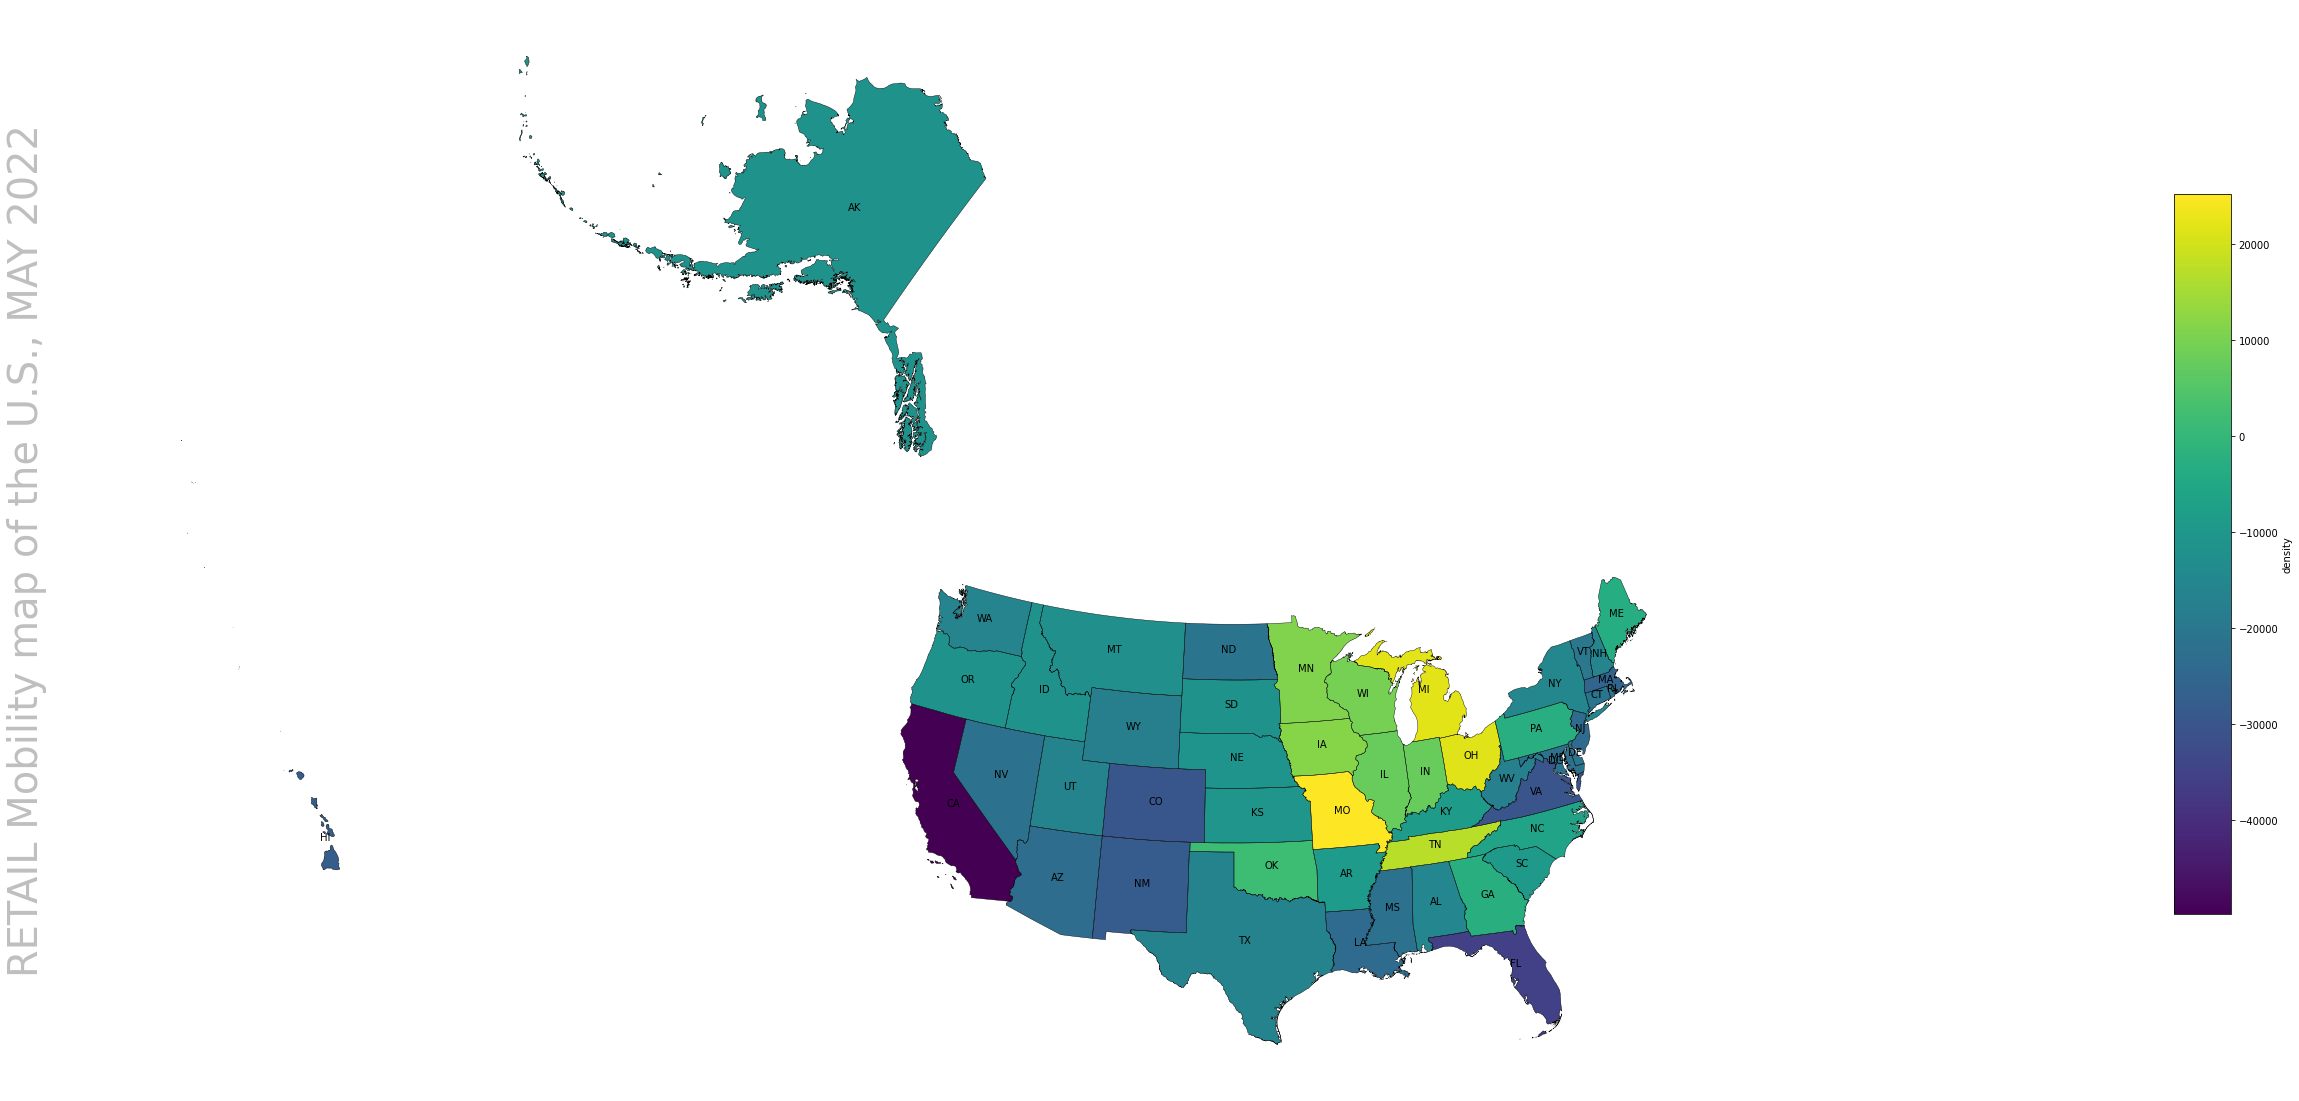

In [ ]:
fig = plt.figure(1, figsize=(40,20))
ax = fig.add_subplot()
##manipulate colorbar/legend (empty one)
# use this simple colormap
my_colormap = plt.cm.viridis #Reds # Pastel2 #works

fig = ax.get_figure()
cax = fig.add_axes([0.95, .25, 0.02, 0.5]) #[left,bottom,width,height][0.9, .25, 0.02, 0.5])
sm = plt.cm.ScalarMappable(
    cmap=my_colormap,
    norm=plt.Normalize(vmin=min_retail22,vmax=max_retail22)
    )

##clear the array of the scalar mappable
sm._A = []
cb = fig.colorbar(sm, cax=cax)
cb.set_label('density')
# manipulate the axis setttings
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

retail_5_22.apply(lambda x: ax.annotate(s=x.State_abr,# + "\n" + str(math.floor(x.ALAND / 2589988.1103)) + " sq mi",
                                      xy=x.geometry.centroid.coords[0],
                                      ha='center',
                                      fontsize=10),
                axis=1);

retail_5_22.boundary.plot(ax=ax, color='Black', linewidth=.4)
retail_5_22.plot(ax=ax, column='retail_and_recreation_percent_change_from_baseline', cmap='viridis', figsize=(12, 12));
ax.text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., MAY 2022', transform=ax.transAxes,
        fontsize=40, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

Text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., JUN 2022')

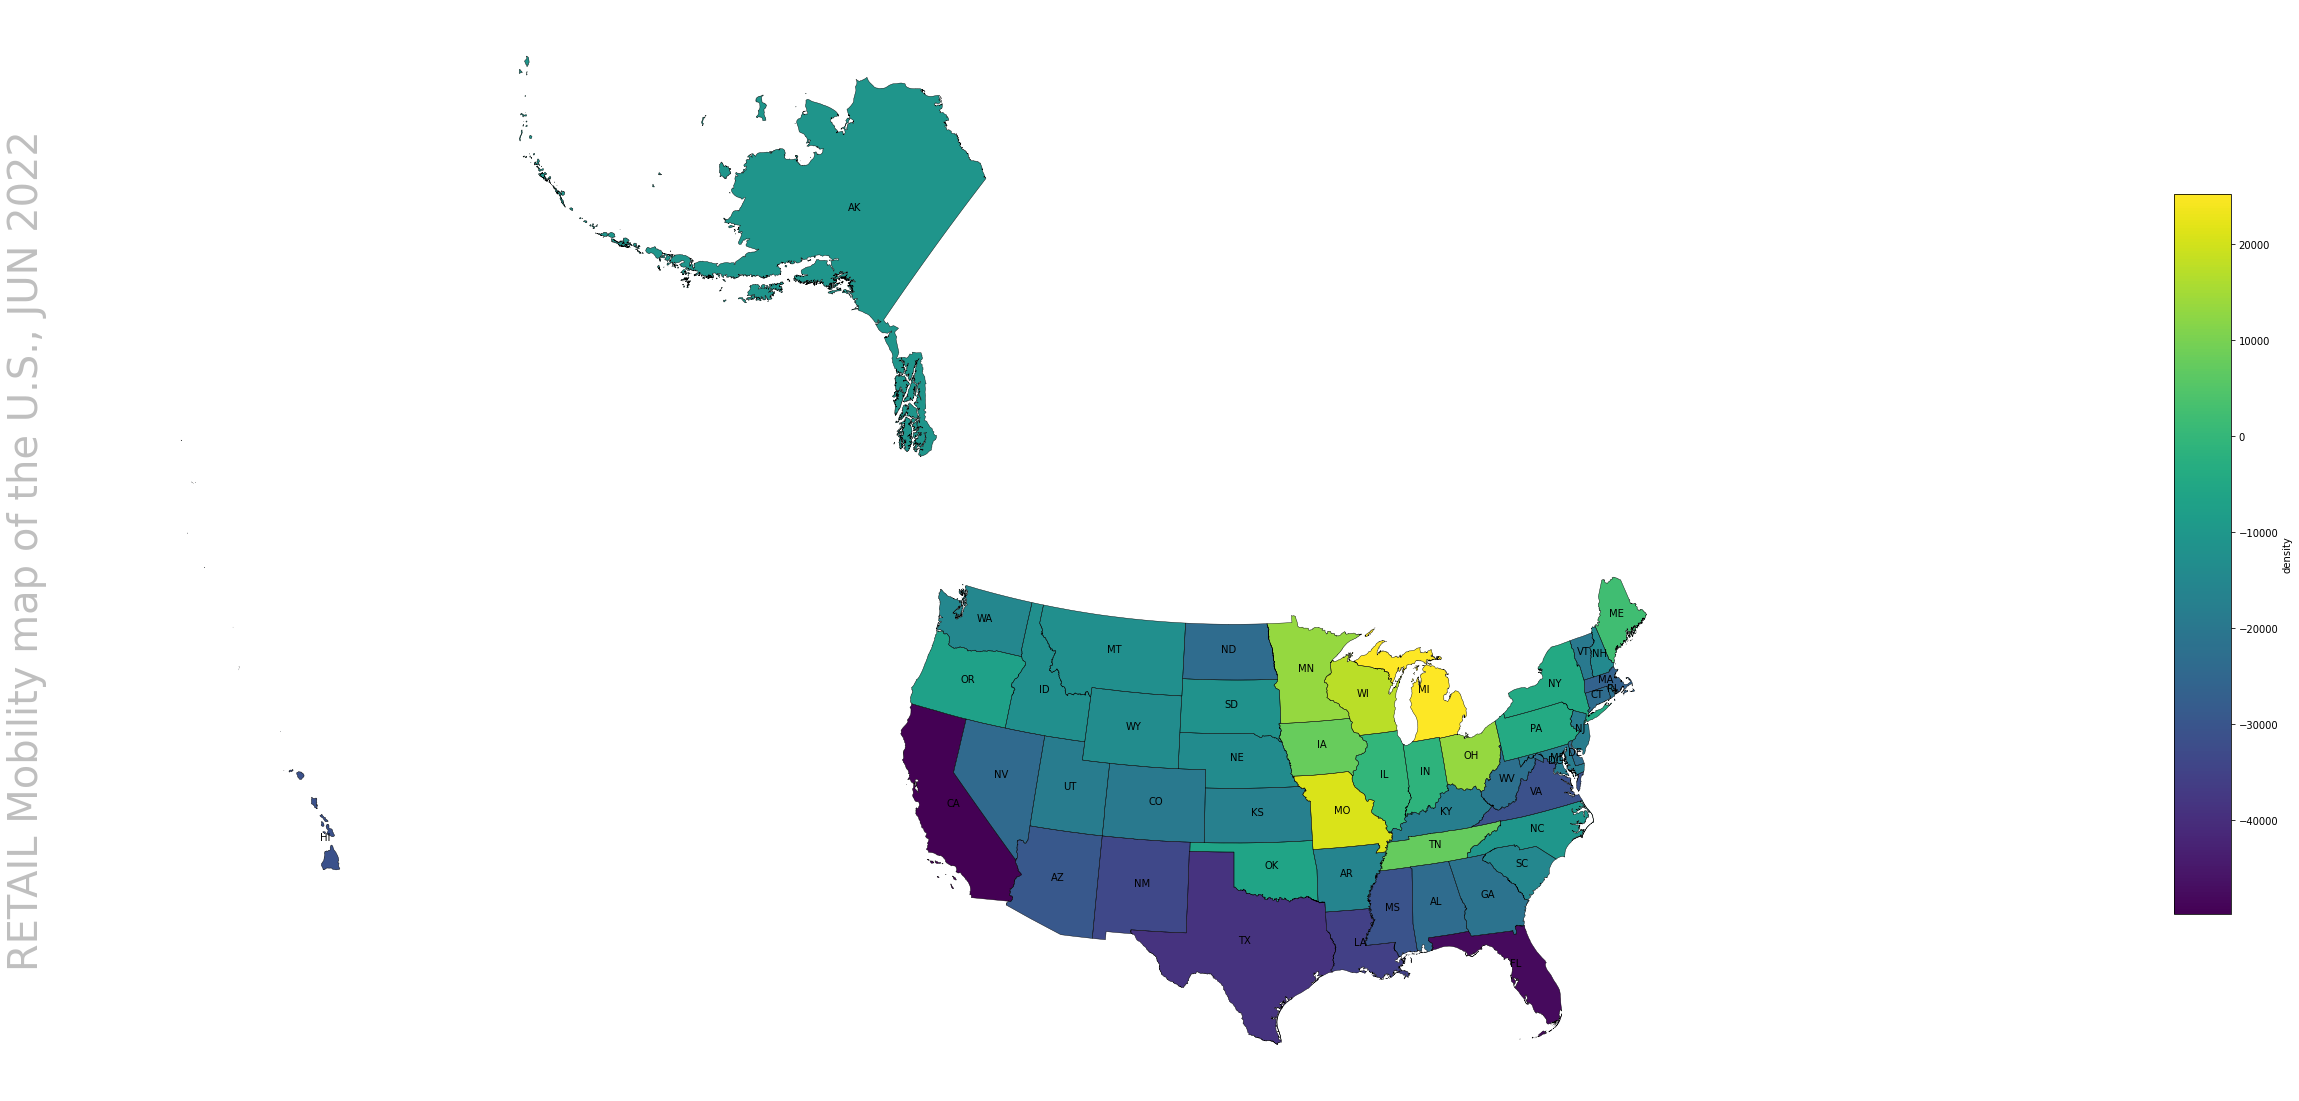

In [ ]:
fig = plt.figure(1, figsize=(40,20))
ax = fig.add_subplot()
##manipulate colorbar/legend (empty one)
# use this simple colormap
my_colormap = plt.cm.viridis #Reds # Pastel2 #works

fig = ax.get_figure()
cax = fig.add_axes([0.95, .25, 0.02, 0.5]) #[left,bottom,width,height][0.9, .25, 0.02, 0.5])
sm = plt.cm.ScalarMappable(
    cmap=my_colormap,
    norm=plt.Normalize(vmin=min_retail22,vmax=max_retail22)
    )

##clear the array of the scalar mappable
sm._A = []
cb = fig.colorbar(sm, cax=cax)
cb.set_label('density')
# manipulate the axis setttings
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

retail_6_22.apply(lambda x: ax.annotate(s=x.State_abr,# + "\n" + str(math.floor(x.ALAND / 2589988.1103)) + " sq mi",
                                      xy=x.geometry.centroid.coords[0],
                                      ha='center',
                                      fontsize=10),
                axis=1);

retail_6_22.boundary.plot(ax=ax, color='Black', linewidth=.4)
retail_6_22.plot(ax=ax, column='retail_and_recreation_percent_change_from_baseline', cmap='viridis', figsize=(12, 12));
ax.text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., JUN 2022', transform=ax.transAxes,
        fontsize=40, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

Text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., JUL 2022')

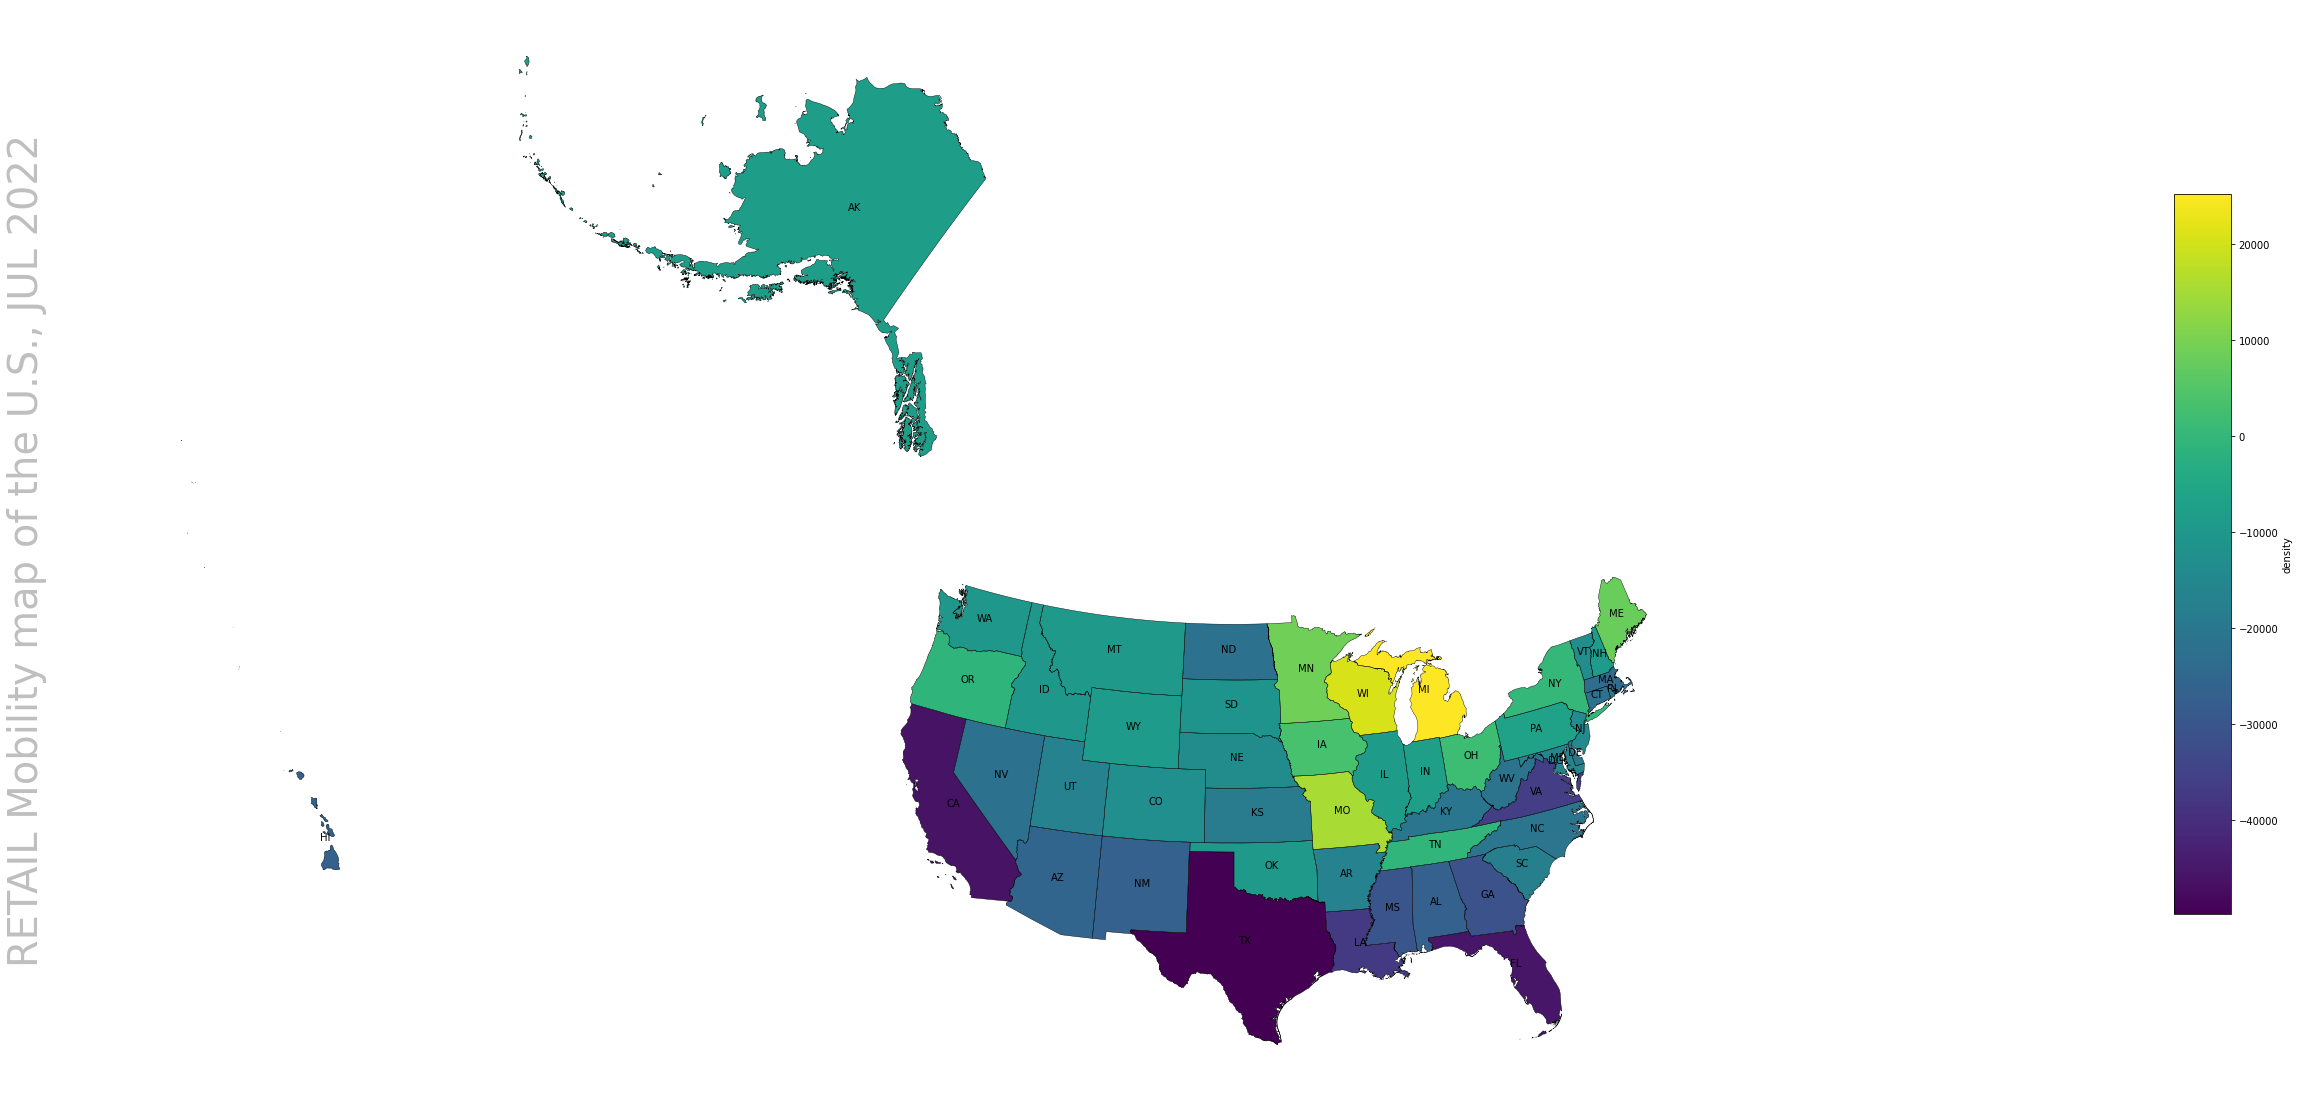

In [ ]:
fig = plt.figure(1, figsize=(40,20))
ax = fig.add_subplot()
##manipulate colorbar/legend (empty one)
# use this simple colormap
my_colormap = plt.cm.viridis #Reds # Pastel2 #works

fig = ax.get_figure()
cax = fig.add_axes([0.95, .25, 0.02, 0.5]) #[left,bottom,width,height][0.9, .25, 0.02, 0.5])
sm = plt.cm.ScalarMappable(
    cmap=my_colormap,
    norm=plt.Normalize(vmin=min_retail22,vmax=max_retail22)
    )

##clear the array of the scalar mappable
sm._A = []
cb = fig.colorbar(sm, cax=cax)
cb.set_label('density')
# manipulate the axis setttings
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

retail_7_22.apply(lambda x: ax.annotate(s=x.State_abr,# + "\n" + str(math.floor(x.ALAND / 2589988.1103)) + " sq mi",
                                      xy=x.geometry.centroid.coords[0],
                                      ha='center',
                                      fontsize=10),
                axis=1);

retail_7_22.boundary.plot(ax=ax, color='Black', linewidth=.4)
retail_7_22.plot(ax=ax, column='retail_and_recreation_percent_change_from_baseline', cmap='viridis', figsize=(12, 12));
ax.text(-0.05, 0.5, 'RETAIL Mobility map of the U.S., JUL 2022', transform=ax.transAxes,
        fontsize=40, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

[ WHY THIS TIME? United States Fed Funds Rate](https://tradingeconomics.com/united-states/interest-rate#:~:text=Interest%20Rate%20in%20the%20United,percent%20in%20December%20of%202008.)

[DOW 5Y](https://finance.yahoo.com/chart/DOW#eyJpbnRlcnZhbCI6IndlZWsiLCJwZXJpb2RpY2l0eSI6MSwidGltZVVuaXQiOm51bGwsImNhbmRsZVdpZHRoIjo3Ljk0NDE2MjQzNjU0ODIyNCwiZmxpcHBlZCI6ZmFsc2UsInZvbHVtZVVuZGVybGF5Ijp0cnVlLCJhZGoiOnRydWUsImNyb3NzaGFpciI6dHJ1ZSwiY2hhcnRUeXBlIjoibGluZSIsImV4dGVuZGVkIjpmYWxzZSwibWFya2V0U2Vzc2lvbnMiOnt9LCJhZ2dyZWdhdGlvblR5cGUiOiJvaGxjIiwiY2hhcnRTY2FsZSI6ImxpbmVhciIsInN0dWRpZXMiOnsi4oCMdm9sIHVuZHLigIwiOnsidHlwZSI6InZvbCB1bmRyIiwiaW5wdXRzIjp7ImlkIjoi4oCMdm9sIHVuZHLigIwiLCJkaXNwbGF5Ijoi4oCMdm9sIHVuZHLigIwifSwib3V0cHV0cyI6eyJVcCBWb2x1bWUiOiIjMDBiMDYxIiwiRG93biBWb2x1bWUiOiIjZmYzMzNhIn0sInBhbmVsIjoiY2hhcnQiLCJwYXJhbWV0ZXJzIjp7IndpZHRoRmFjdG9yIjowLjQ1LCJjaGFydE5hbWUiOiJjaGFydCJ9fX0sInBhbmVscyI6eyJjaGFydCI6eyJwZXJjZW50IjoxLCJkaXNwbGF5IjoiRE9XIiwiY2hhcnROYW1lIjoiY2hhcnQiLCJpbmRleCI6MCwieUF4aXMiOnsibmFtZSI6ImNoYXJ0IiwicG9zaXRpb24iOm51bGx9LCJ5YXhpc0xIUyI6W10sInlheGlzUkhTIjpbImNoYXJ0Iiwi4oCMdm9sIHVuZHLigIwiXX19LCJzZXRTcGFuIjpudWxsLCJsaW5lV2lkdGgiOjIsInN0cmlwZWRCYWNrZ3JvdW5kIjp0cnVlLCJldmVudHMiOnRydWUsImNvbG9yIjoiIzAwODFmMiIsInN0cmlwZWRCYWNrZ3JvdWQiOnRydWUsImV2ZW50TWFwIjp7ImNvcnBvcmF0ZSI6eyJkaXZzIjp0cnVlLCJzcGxpdHMiOnRydWV9LCJzaWdEZXYiOnt9fSwiY3VzdG9tUmFuZ2UiOm51bGwsInJhbmdlIjpudWxsLCJzeW1ib2xzIjpbeyJzeW1ib2wiOiJET1ciLCJzeW1ib2xPYmplY3QiOnsic3ltYm9sIjoiRE9XIiwicXVvdGVUeXBlIjoiRVFVSVRZIiwiZXhjaGFuZ2VUaW1lWm9uZSI6IkFtZXJpY2EvTmV3X1lvcmsifSwicGVyaW9kaWNpdHkiOjEsImludGVydmFsIjoid2VlayIsInRpbWVVbml0IjpudWxsLCJzZXRTcGFuIjpudWxsfV19)

In [1]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

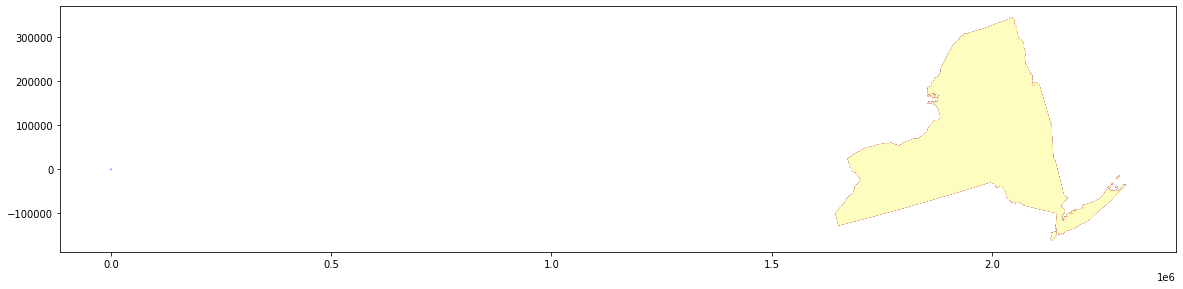

In [ ]:
# ny_geo = my_geoseries20.plot(color='gray', figsize=(20,10))
# ax = my_geoseries20.plot(ax=base20, column='retail_and_recreation_percent_change_from_baseline', marker='.', cmap='Blues') # works 'GnBu','GnBu'

ny_geo = my_geoseries20[my_geoseries20.State_abr == 'NY'] #full df +lat/lon
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ny = world[world.iso_a3 == 'USA'] # geo shape of tx (no Net Earn. there)


base = world[world.iso_a3 == 'USA'].plot(color='gray', alpha=0.2, edgecolor='blue', linewidth=.9, figsize=(20,20))
ny_geo.plot(ax=base, marker='.', cmap='magma', markersize=ny_geo['retail_and_recreation_percent_change_from_baseline'])

In [ ]:
#todo strimlit